In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/'
x1ds = np.hstack((glob.glob('{}check/*x1d.fits'.format(path)), glob.glob('{}check/*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28040_sx1.fits'],
      dtype='<U74')

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27010_x1d.fits
G140L
[85.24121]


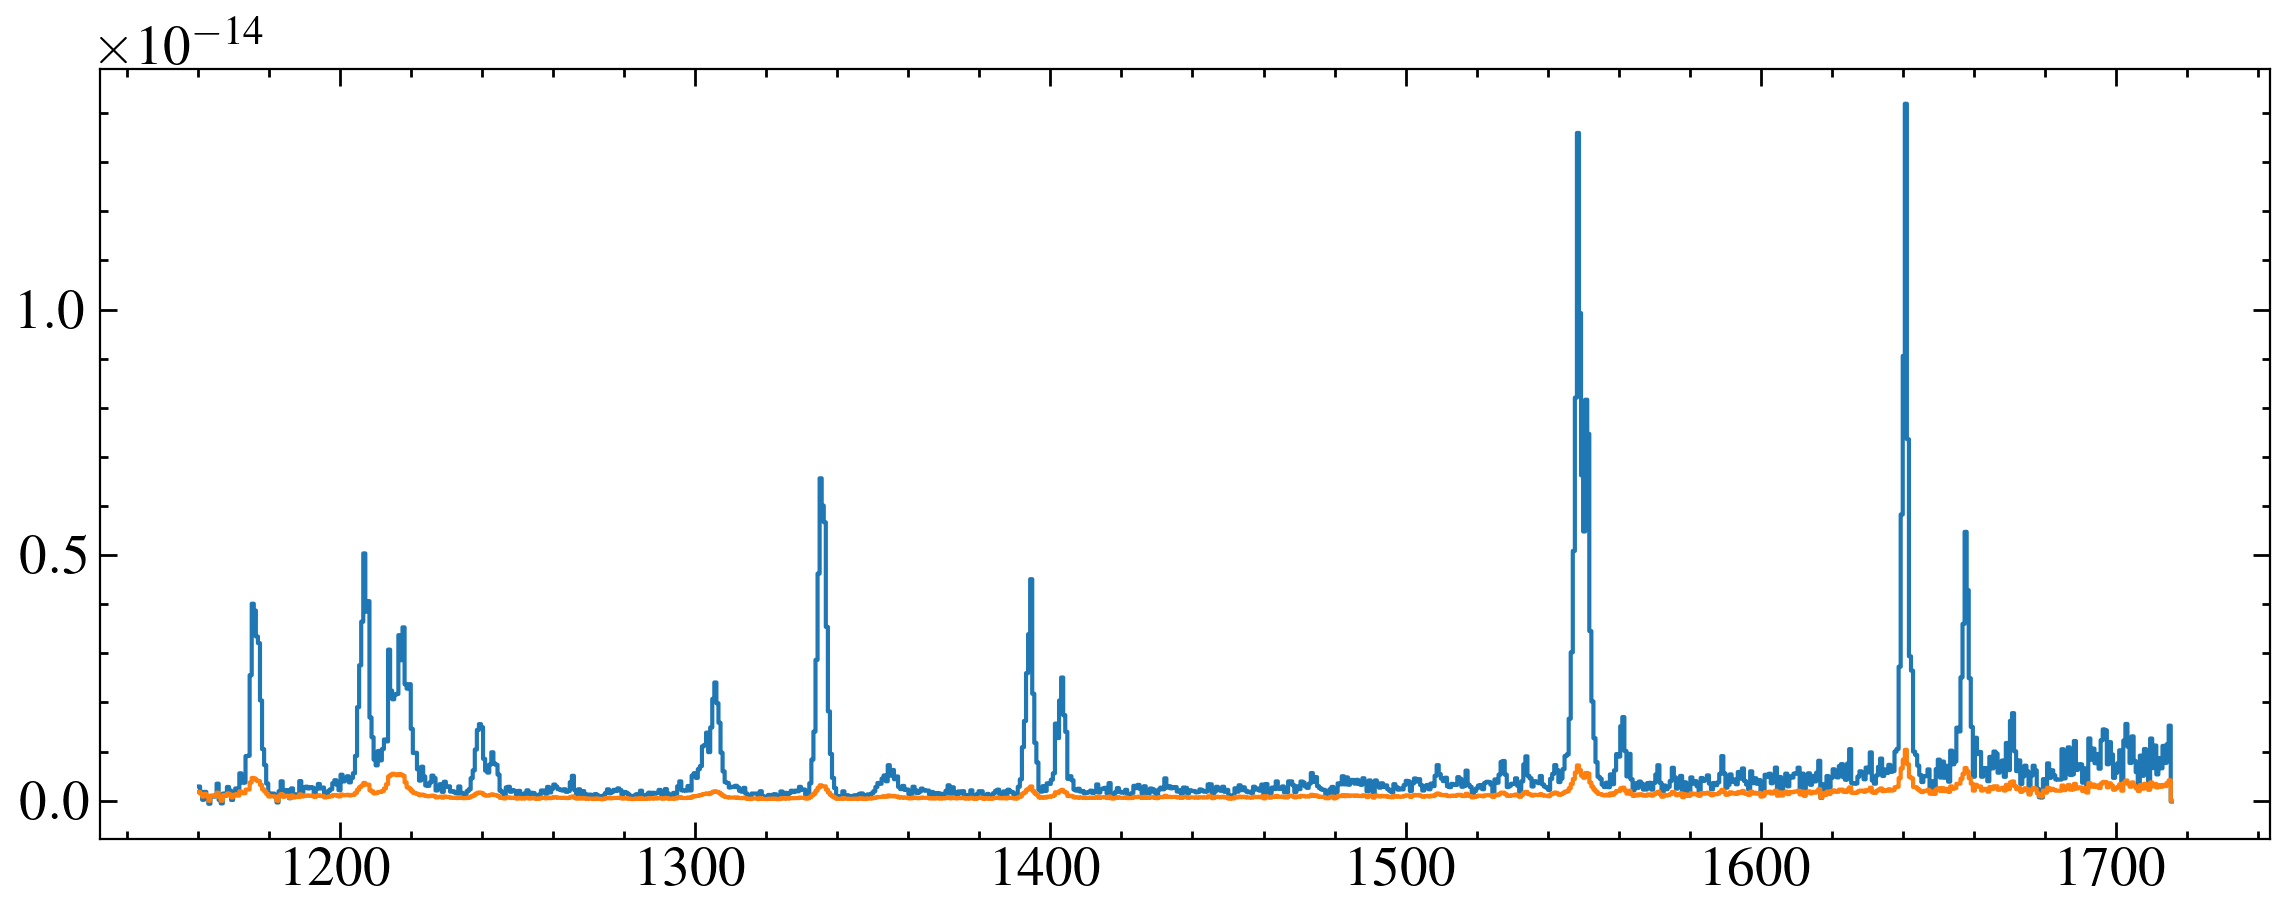

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27020_x1d.fits
G140L
[85.70035]


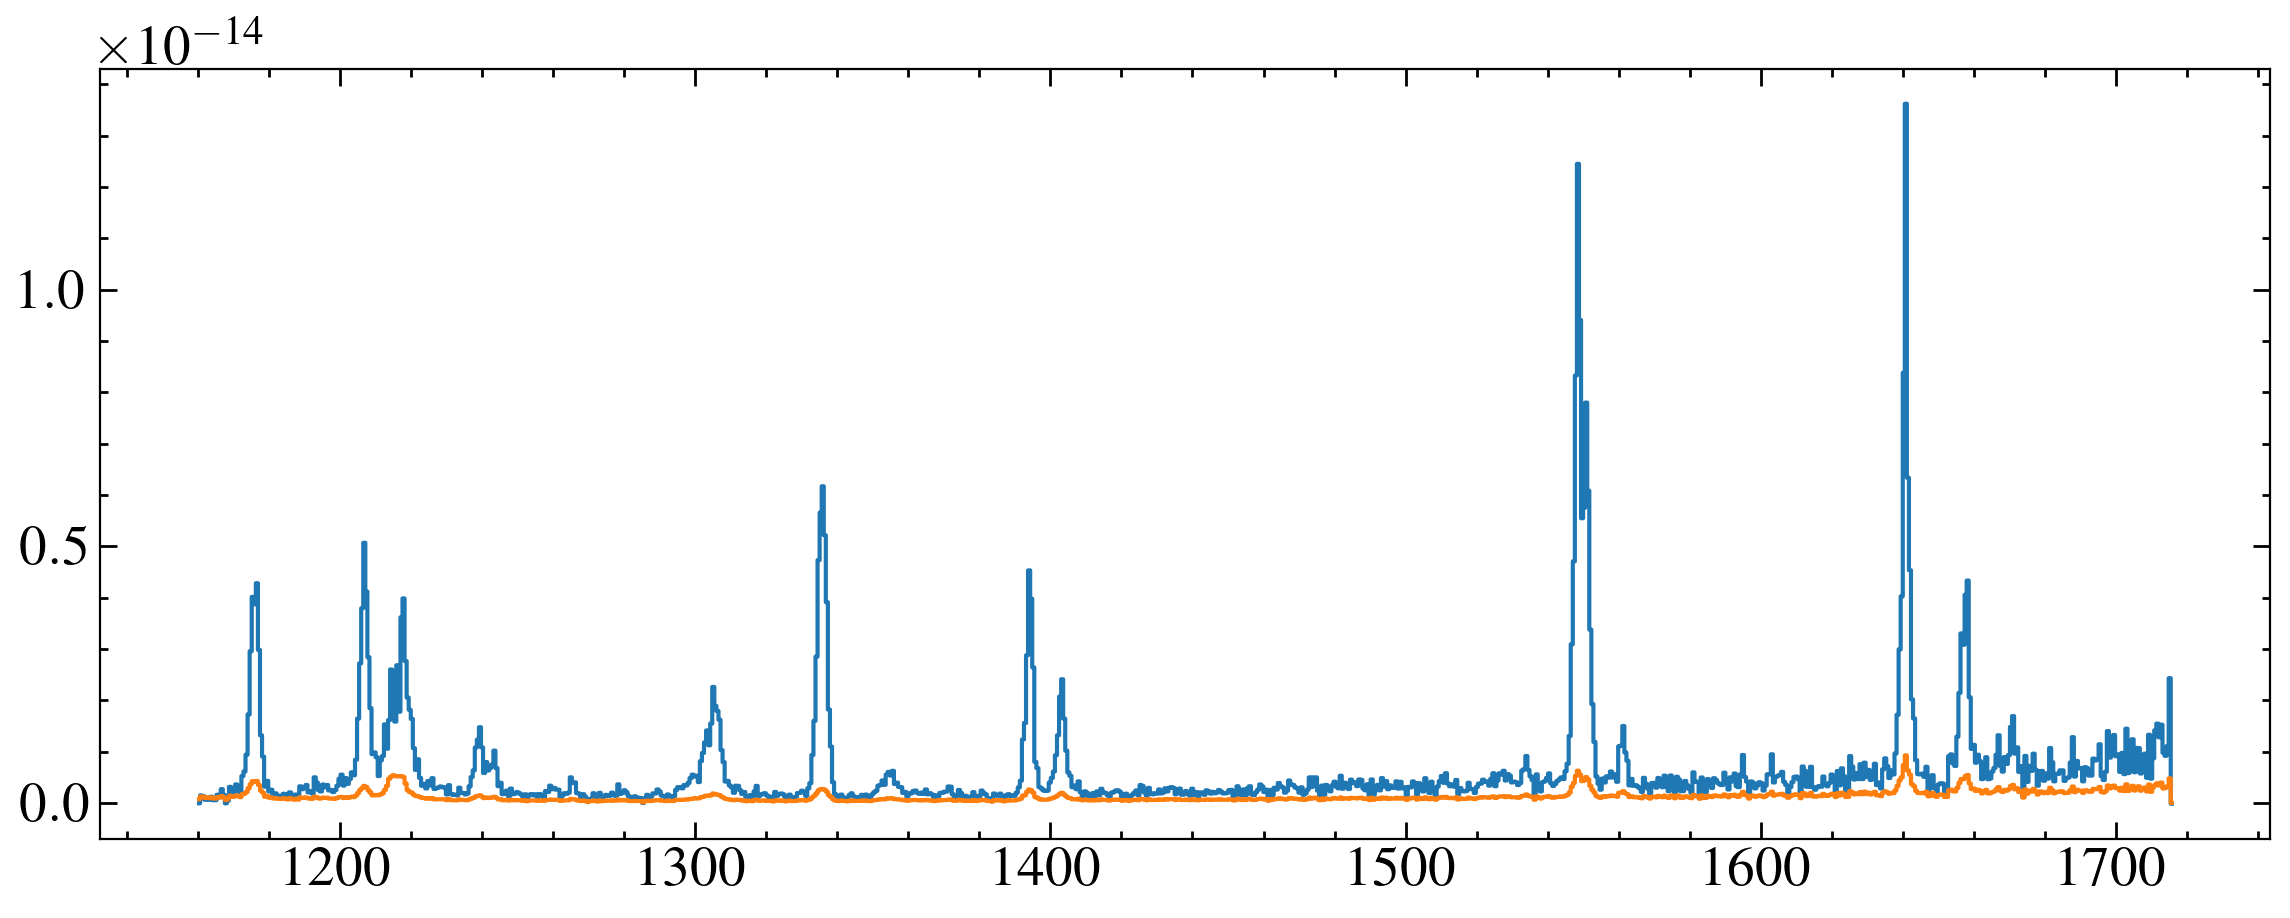

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27030_x1d.fits
G140L
[85.91894]


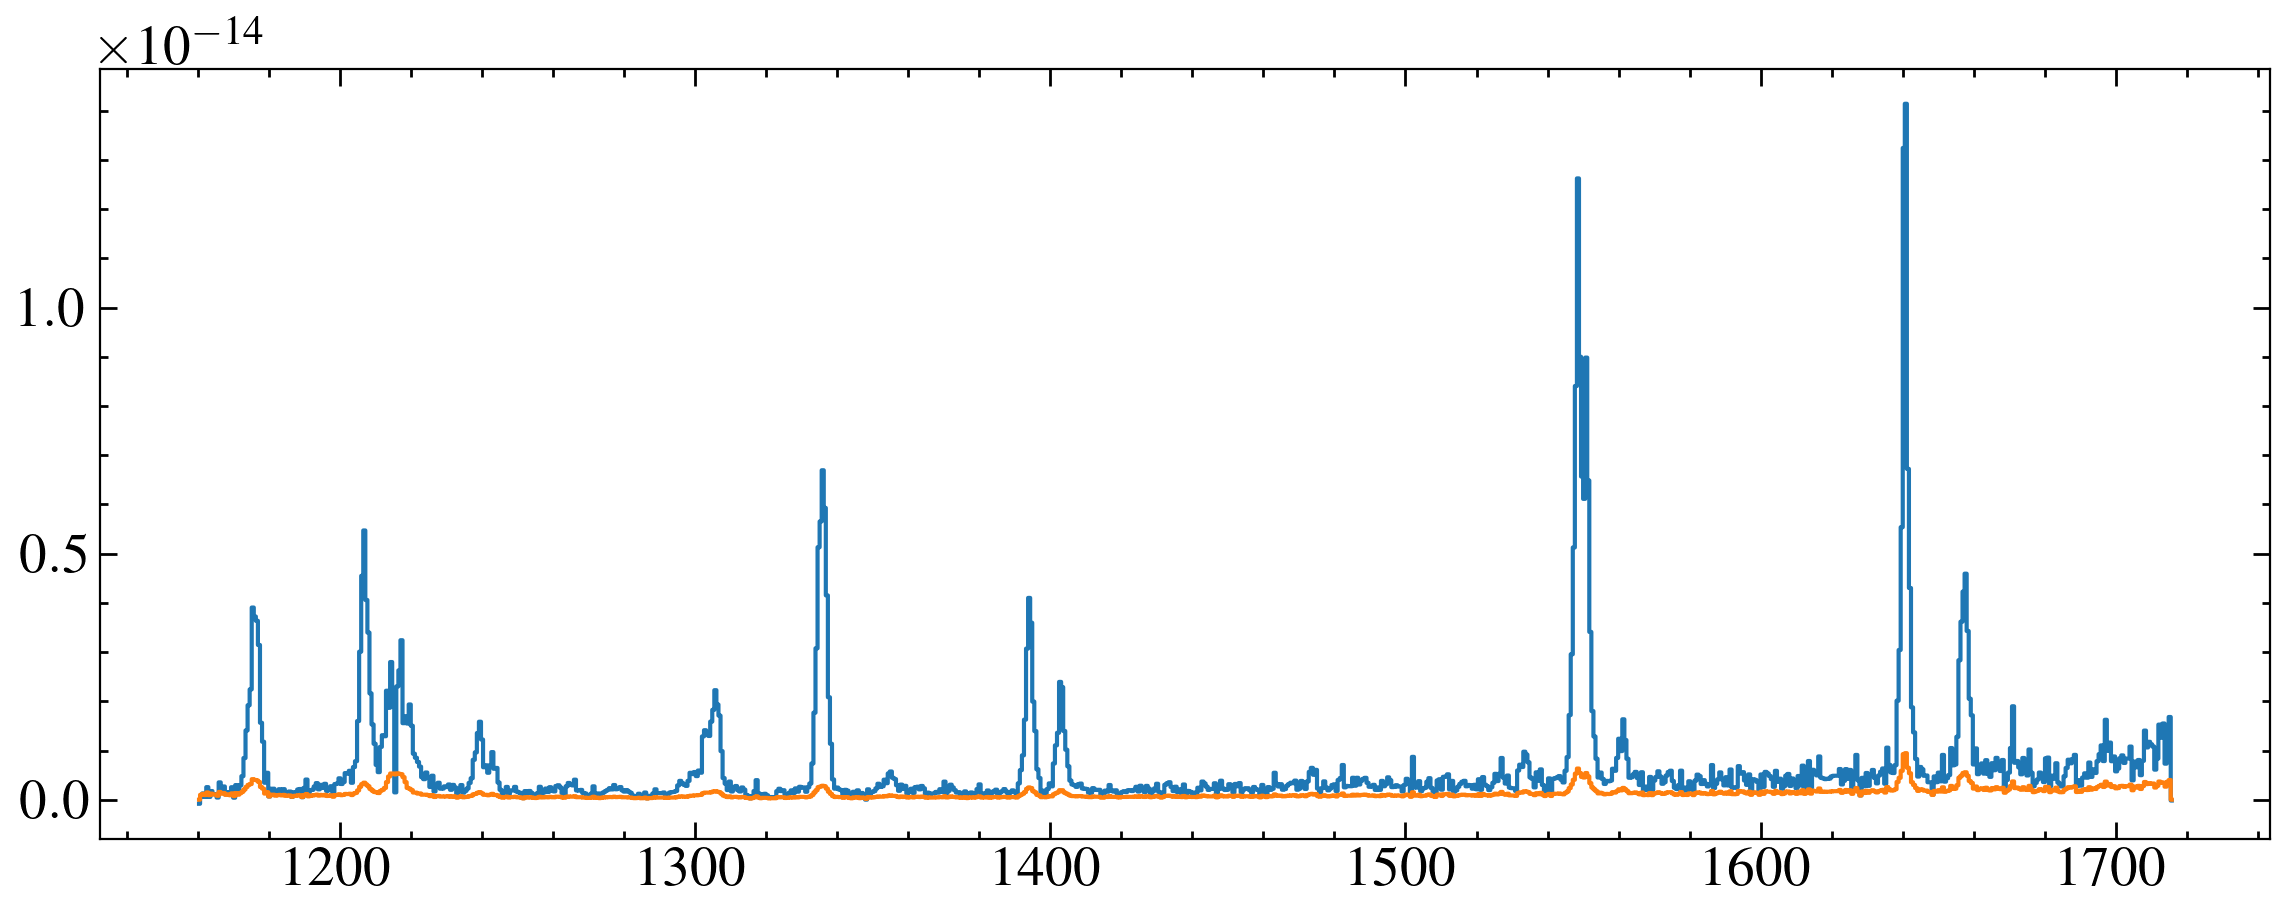

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27040_x1d.fits
G140L
[85.88886]


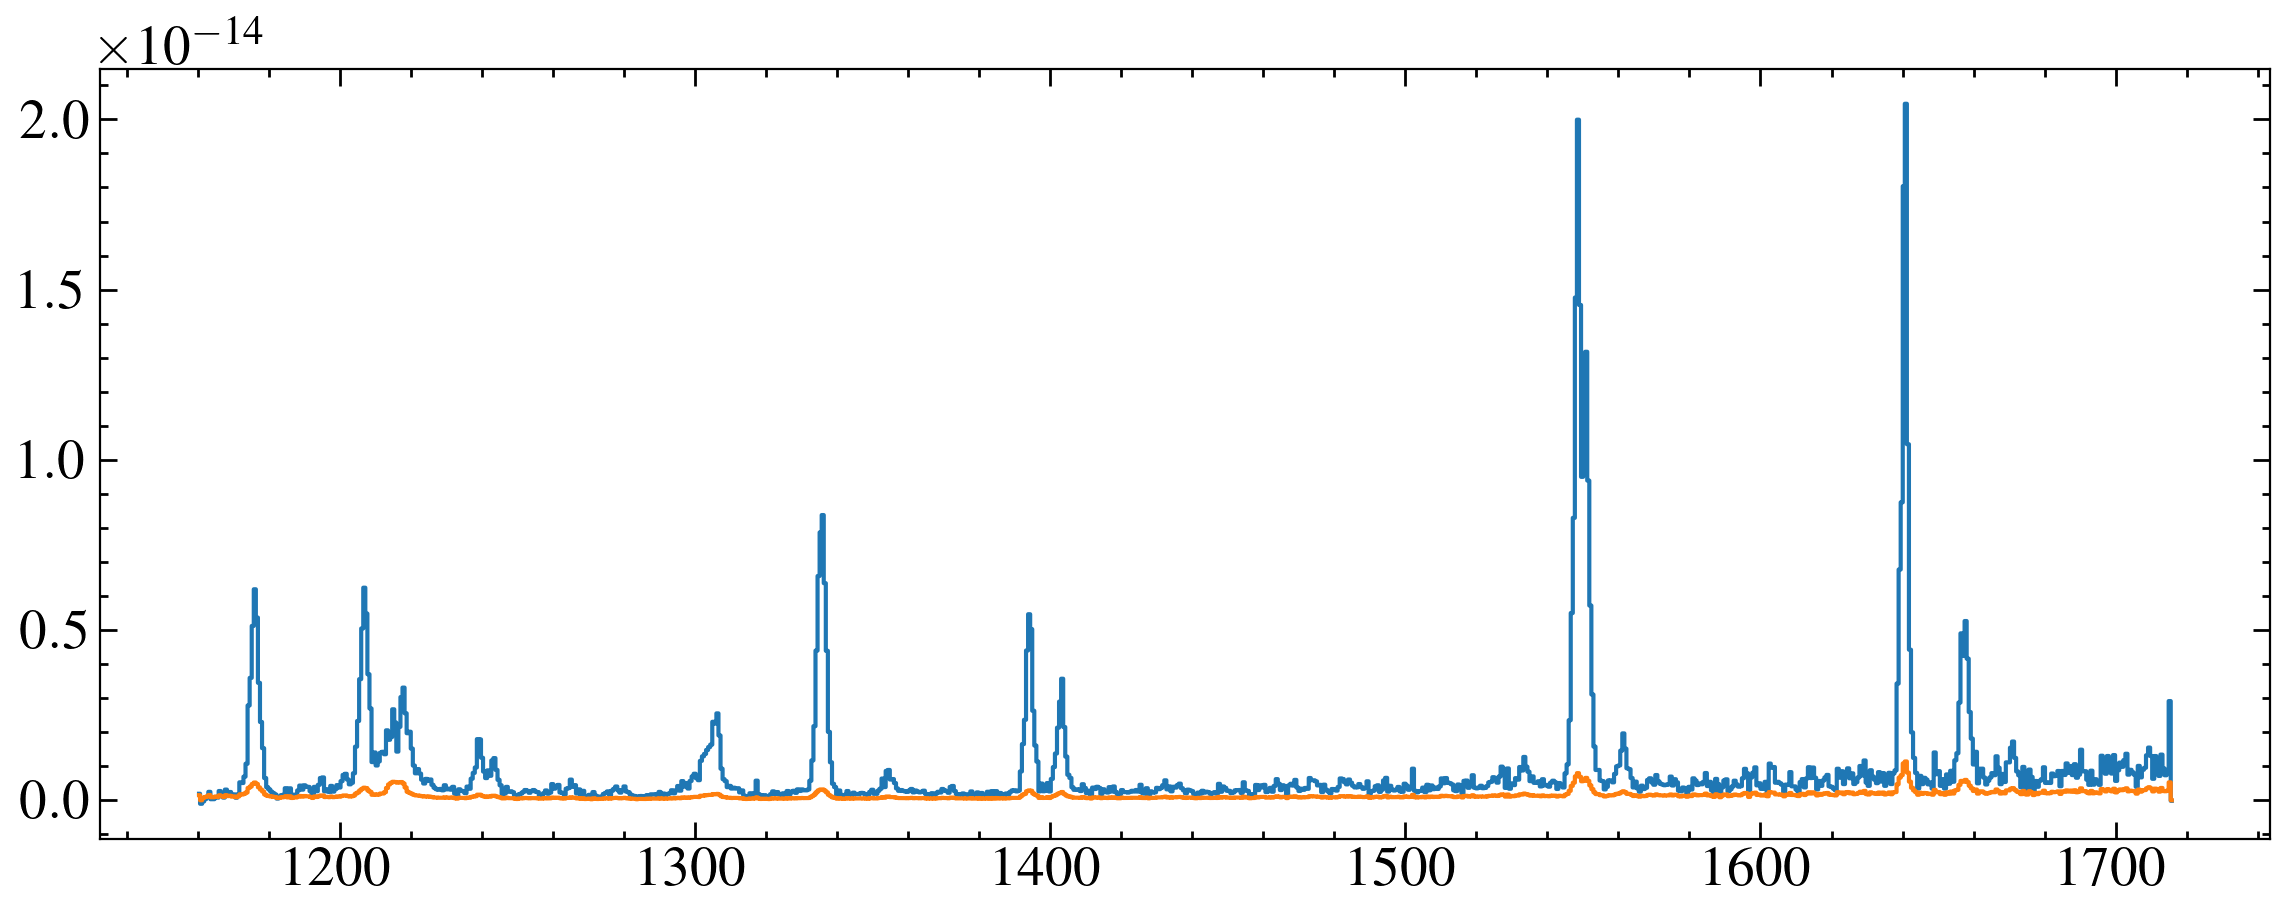

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28010_x1d.fits
G140L
[88.22849]


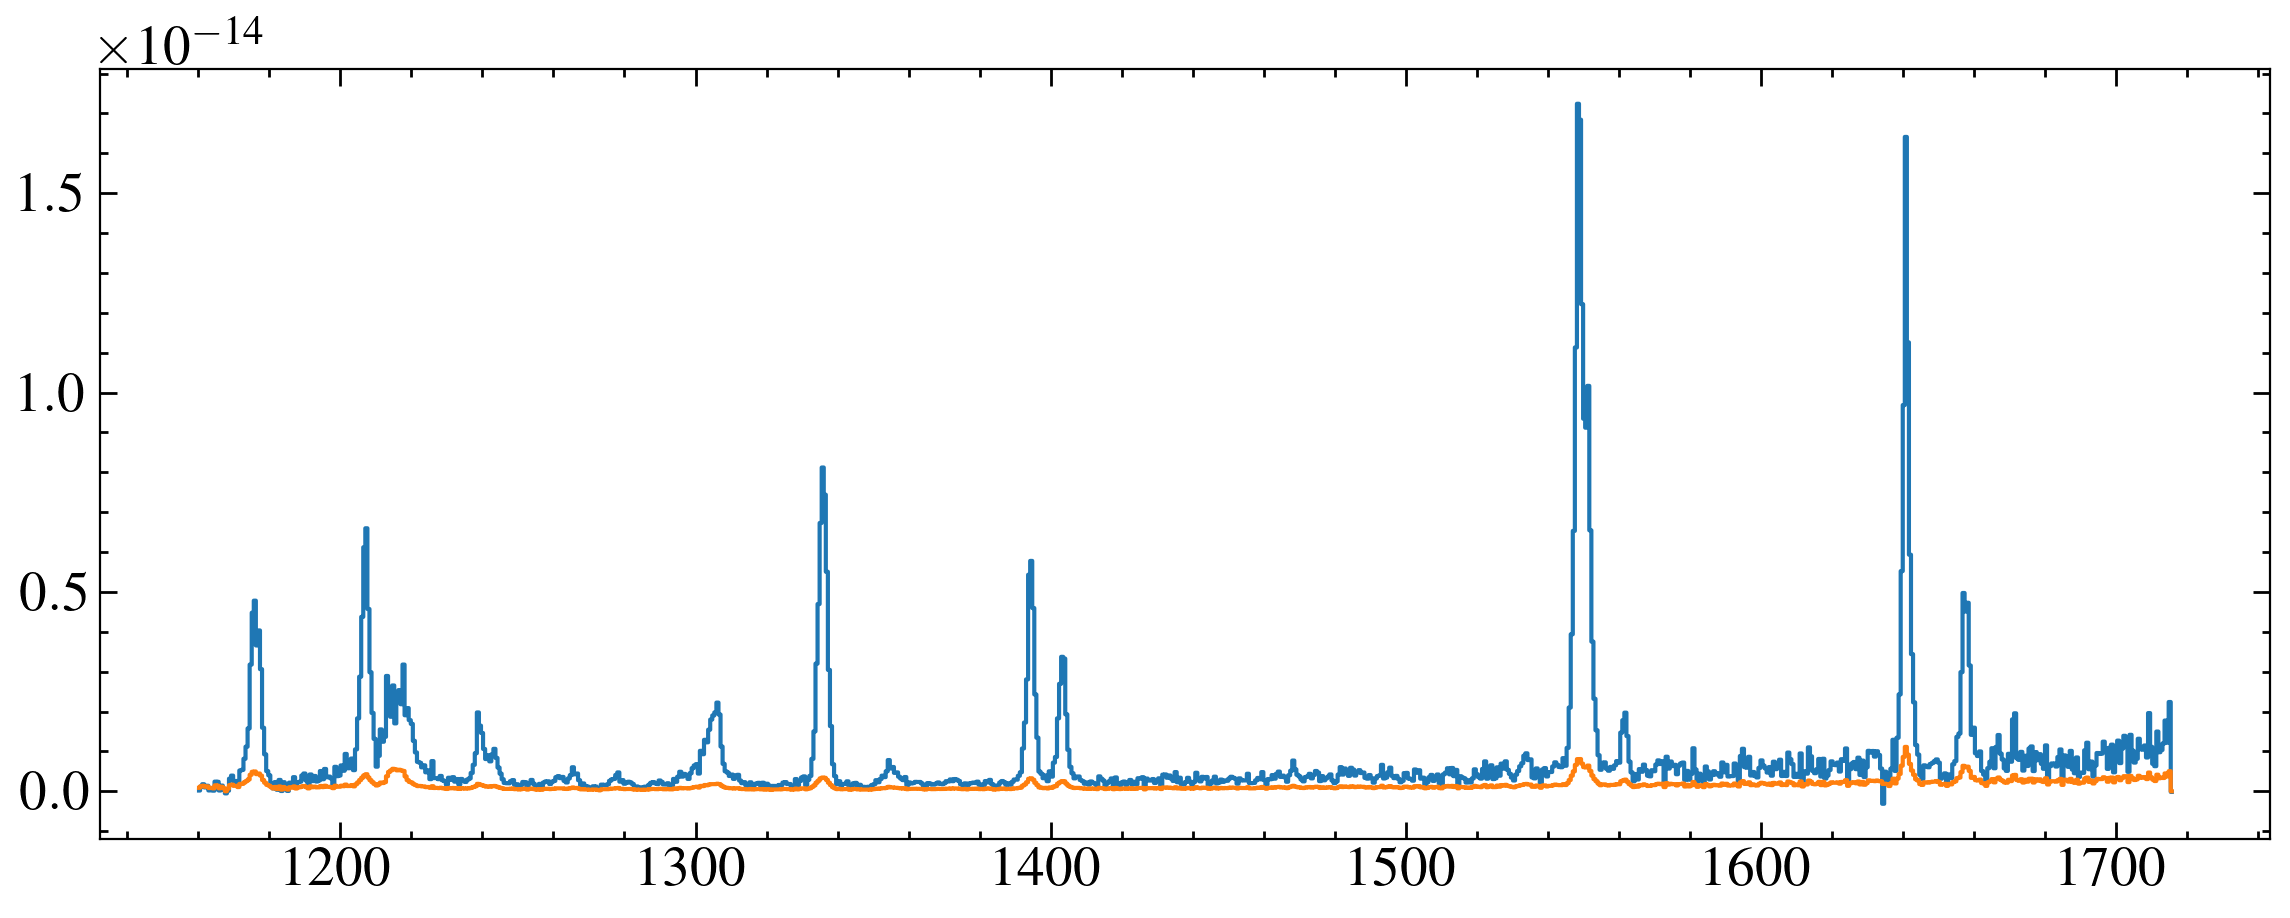

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits
G140L
[88.42286]


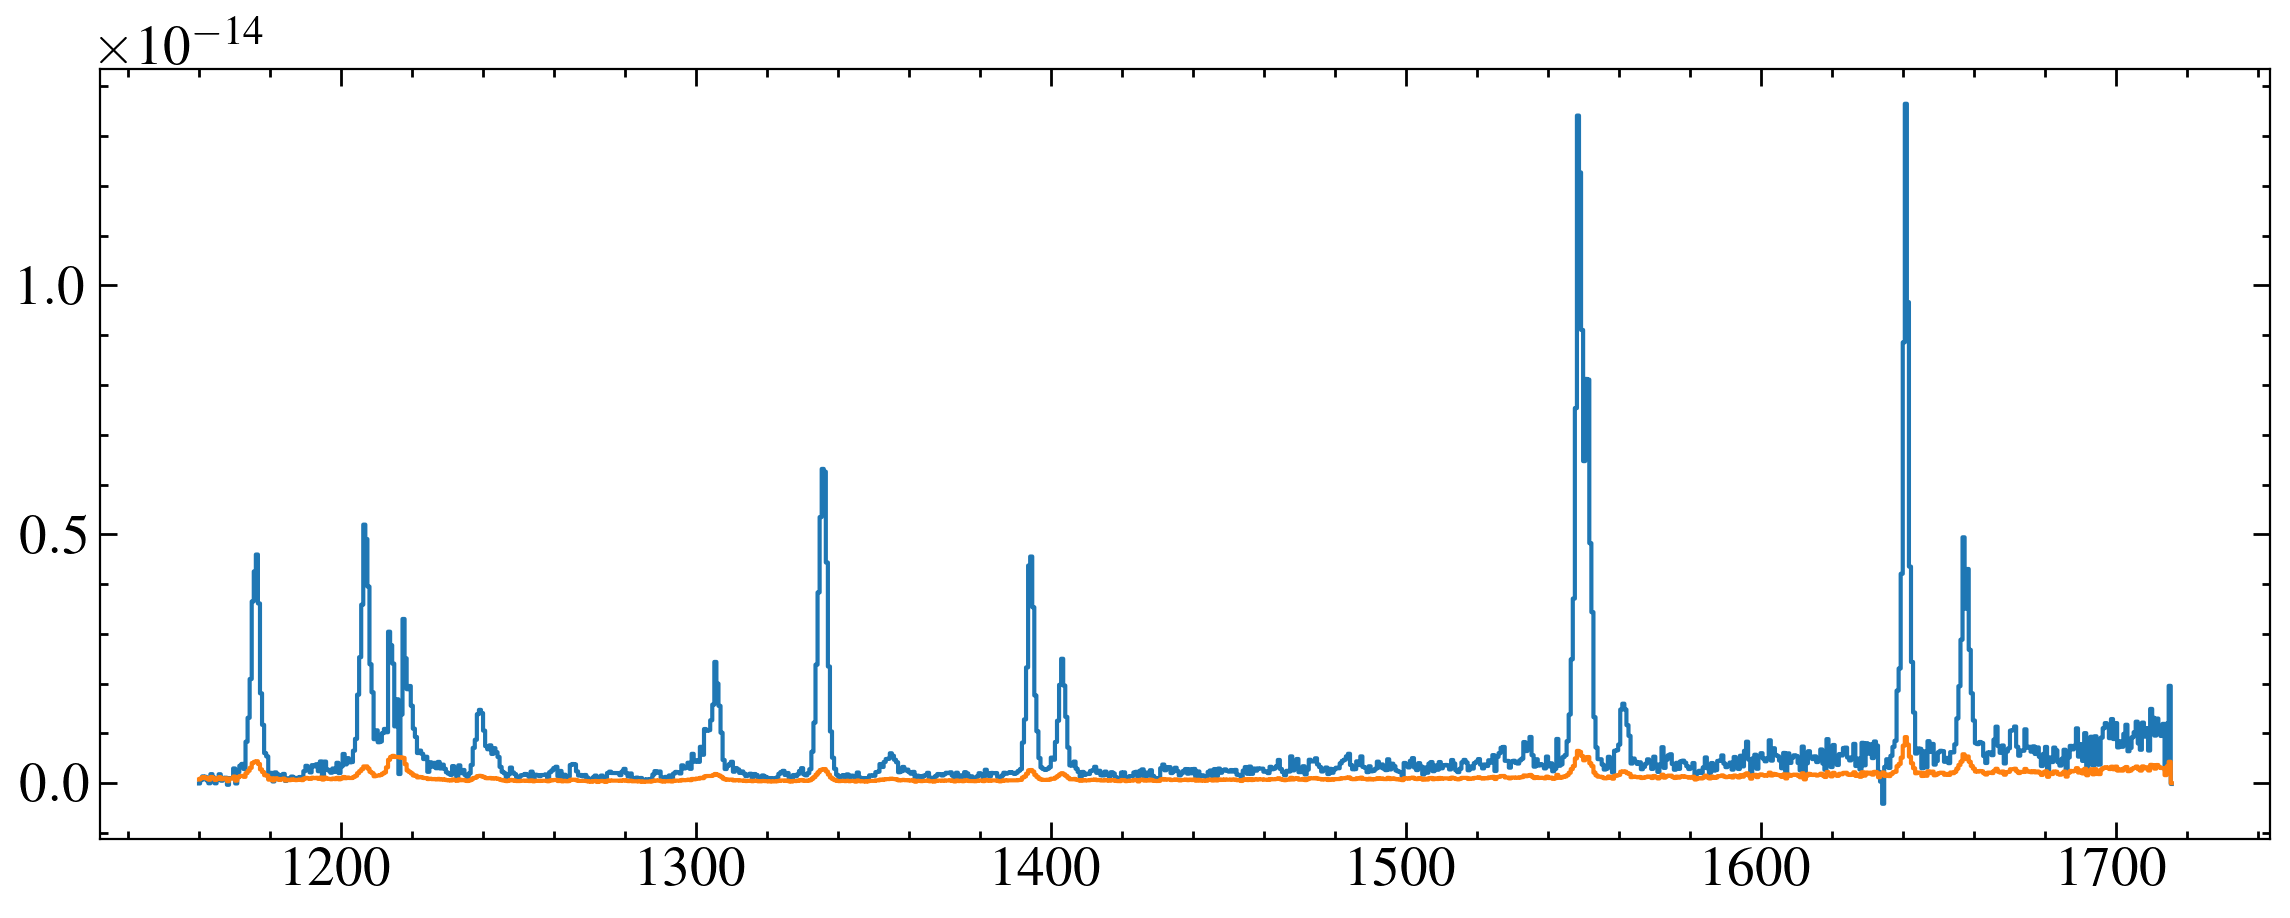

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28030_x1d.fits
G230L
[494.1262]


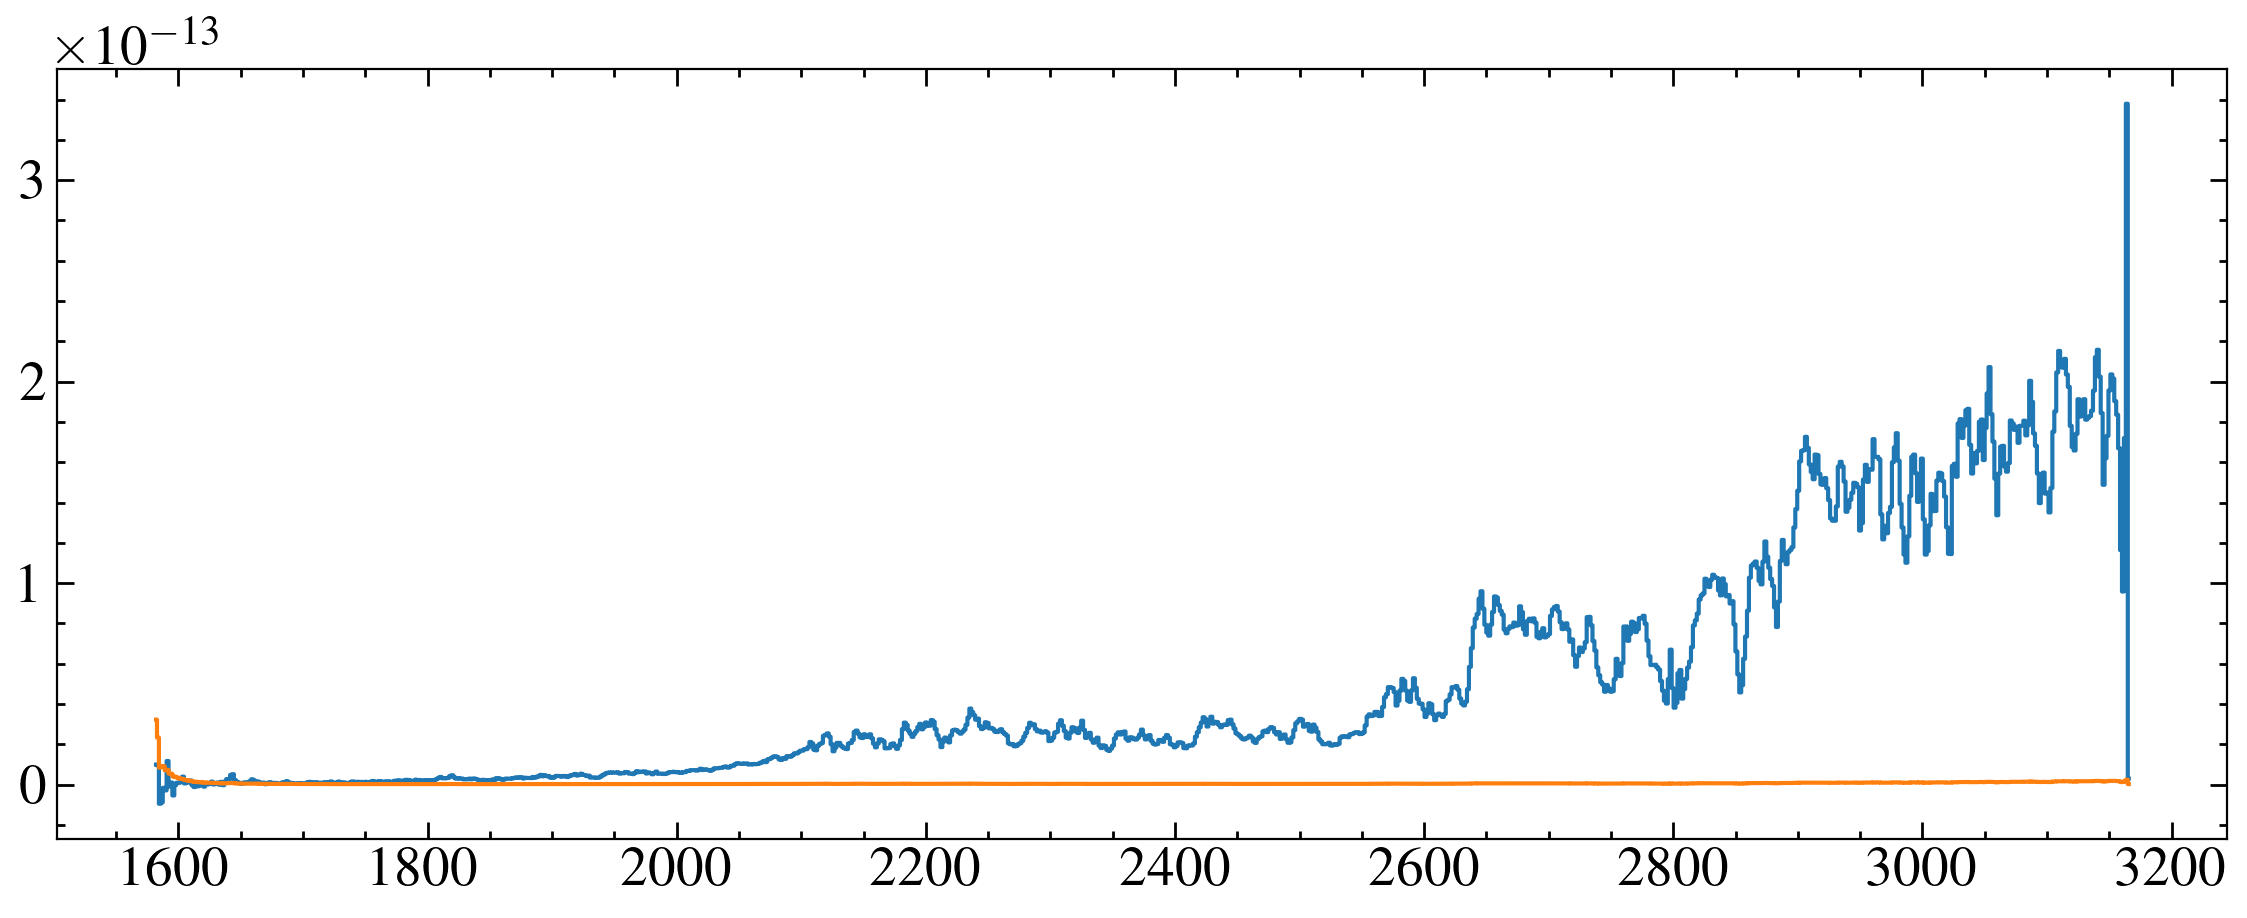

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28040_sx1.fits
G430L
[894.85254]


In [3]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()


Wow! Any evidence for flares in G140L?

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27010_x1d.fits
G140L
[85.24121]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27020_x1d.fits
G140L
[85.70035]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27030_x1d.fits
G140L
[85.91894]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27040_x1d.fits
G140L
[85.88886]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28010_x1d.fits
G140L
[88.22849]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits
G140L
[88.42286]


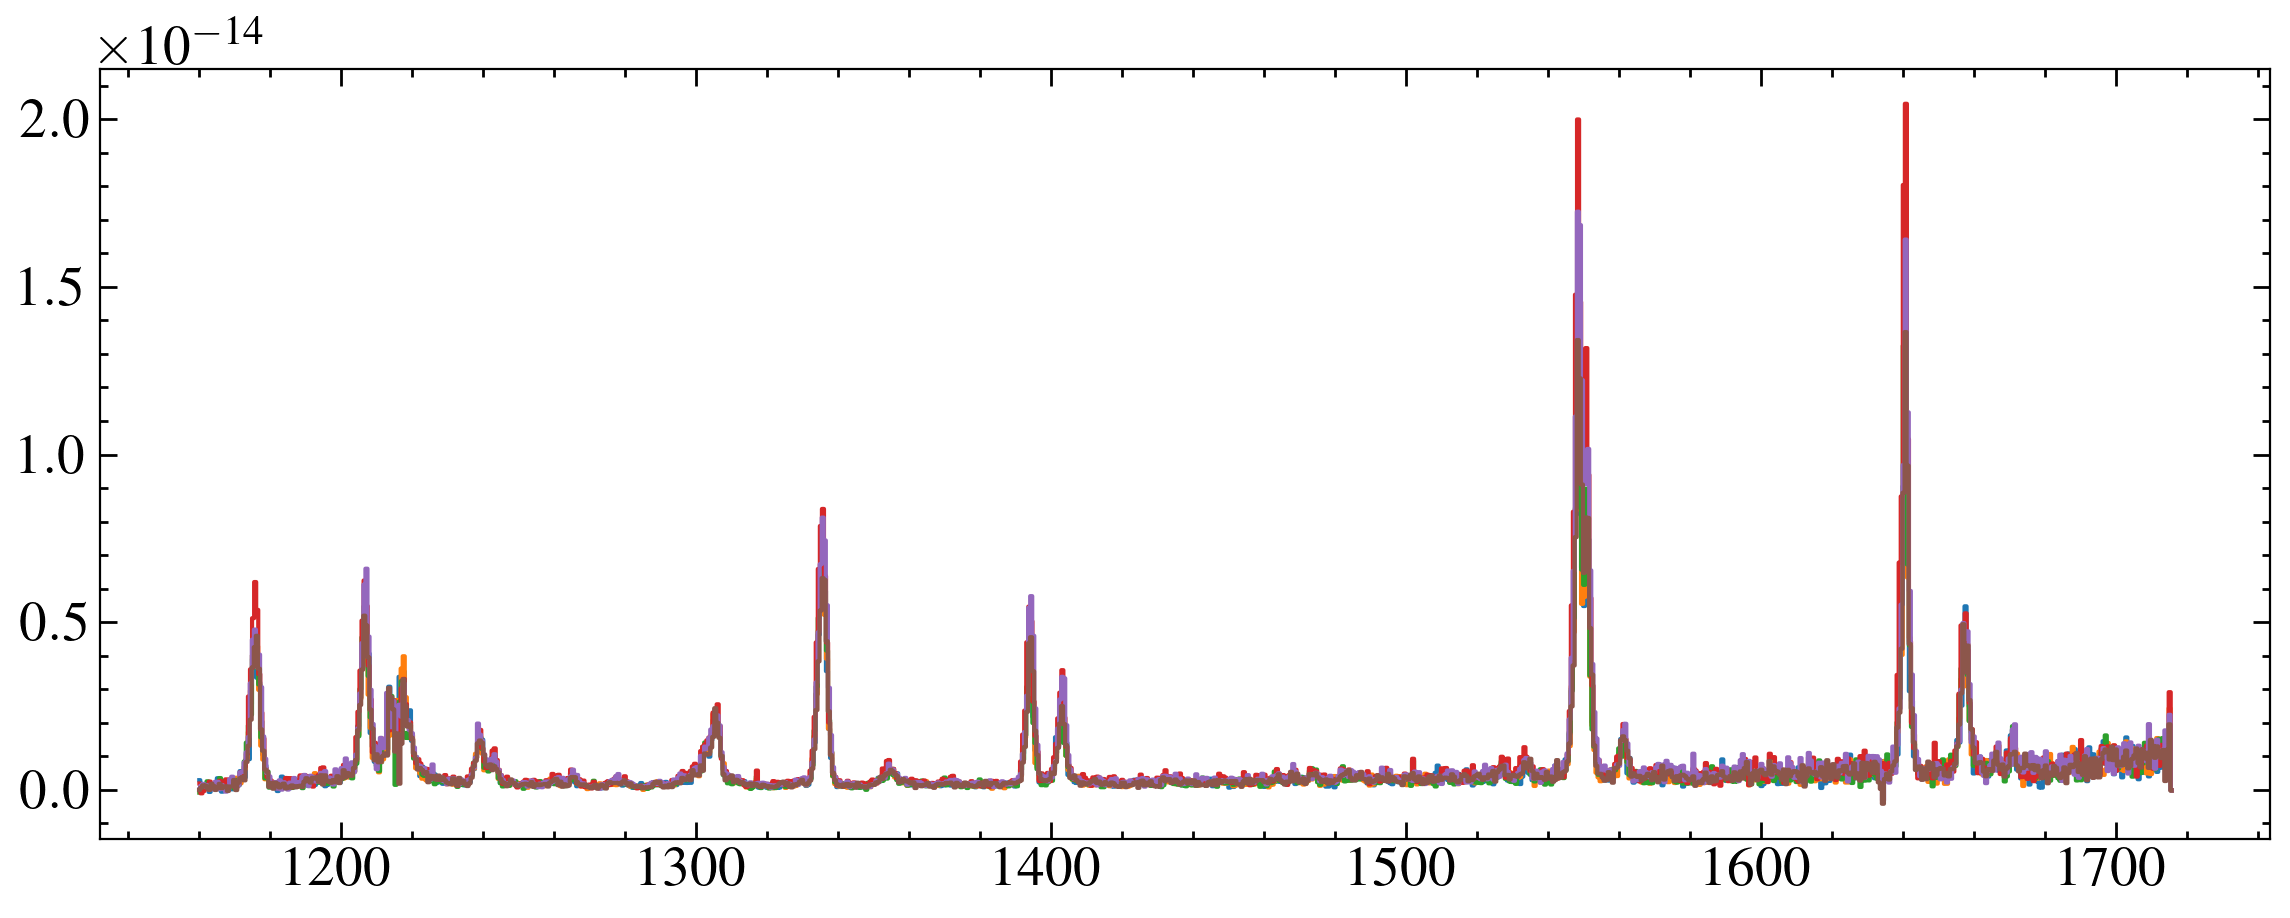

In [4]:
for x in x1ds[0:6]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid', c='C1')
    # plt.show()


No? Go back and have closer look in a bit

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27010_x1d.fits
G140L
[85.24121]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27020_x1d.fits
G140L
[85.70035]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27030_x1d.fits
G140L
[85.91894]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27040_x1d.fits
G140L
[85.88886]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28010_x1d.fits
G140L
[88.22849]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits
G140L
[88.42286]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28030_x1d.fits
G230L
[494.1262]
/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28040_sx1.fits
G430L
[894.85254]


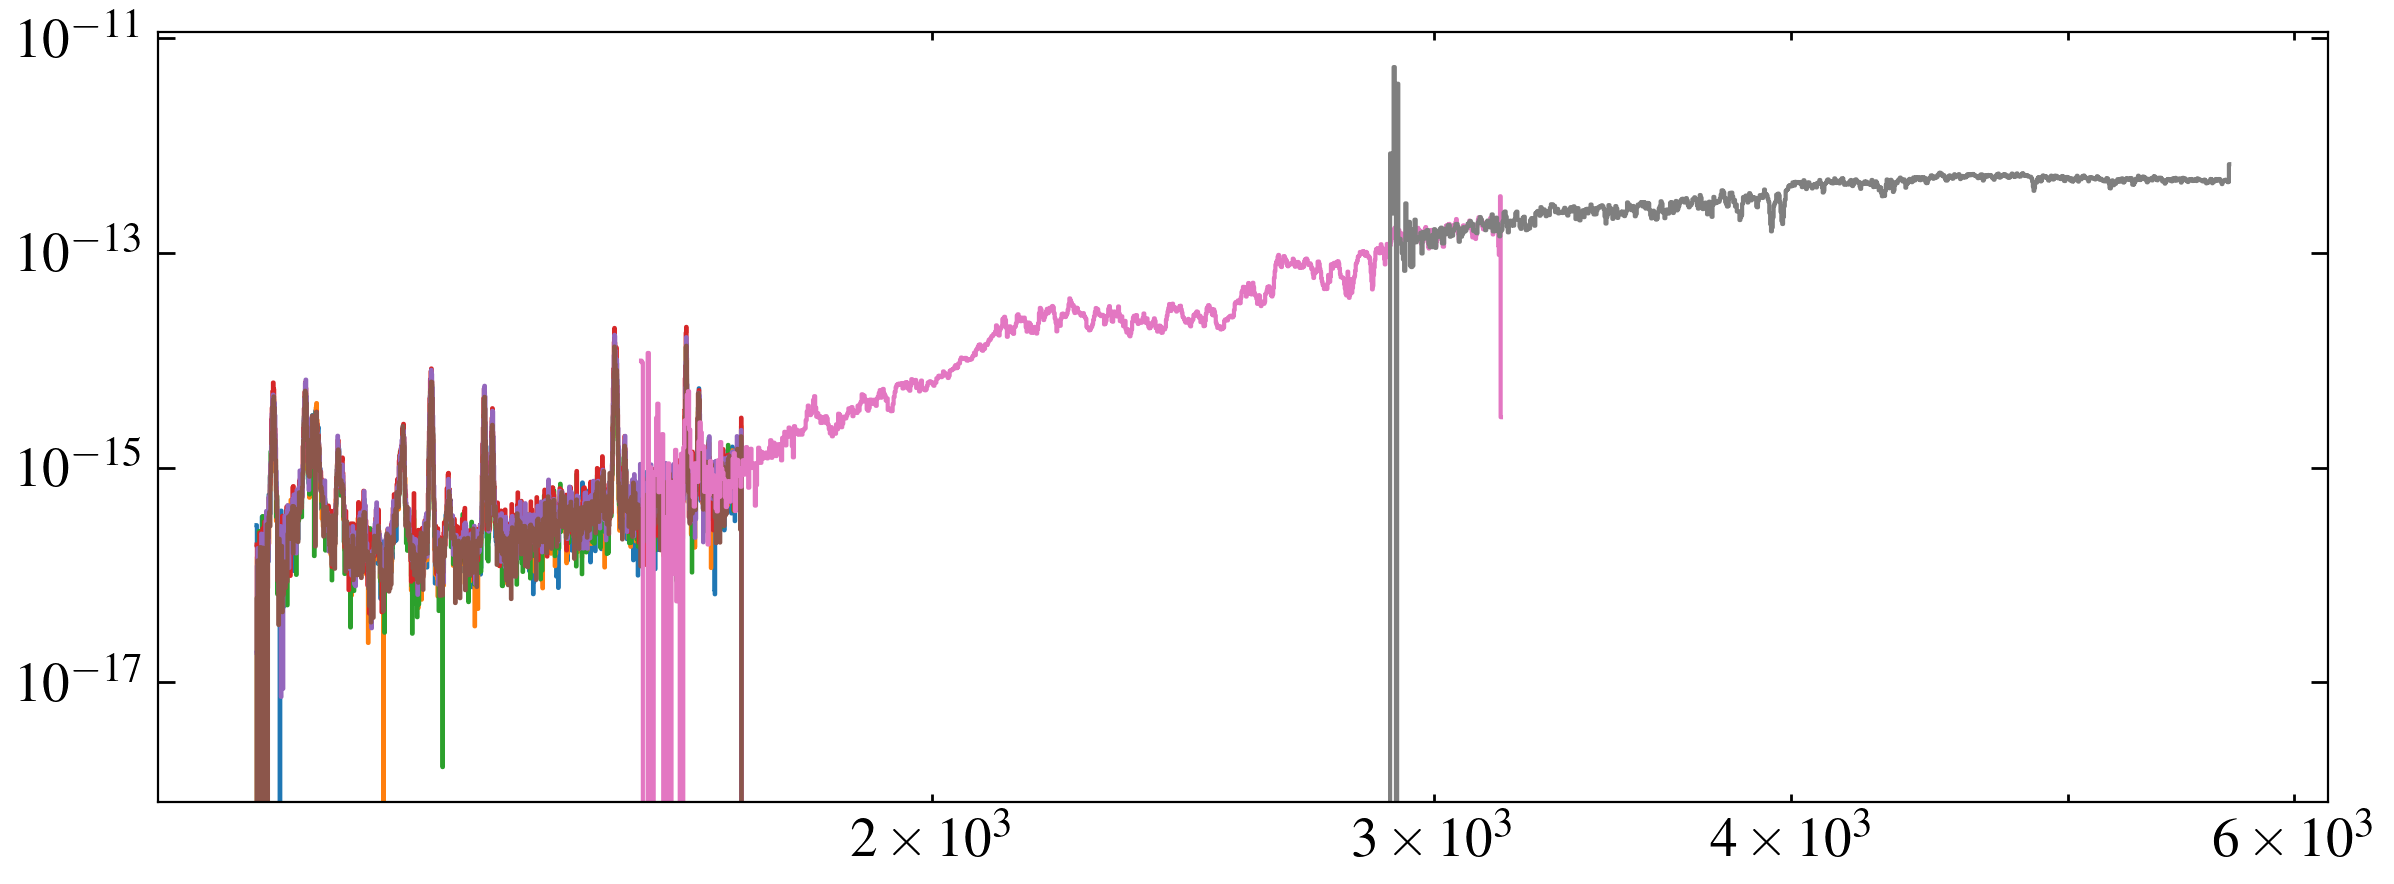

In [5]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid', c='C1')
    # plt.show()
plt.yscale('log')
plt.xscale('log')


In [6]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**2
    return flux,error

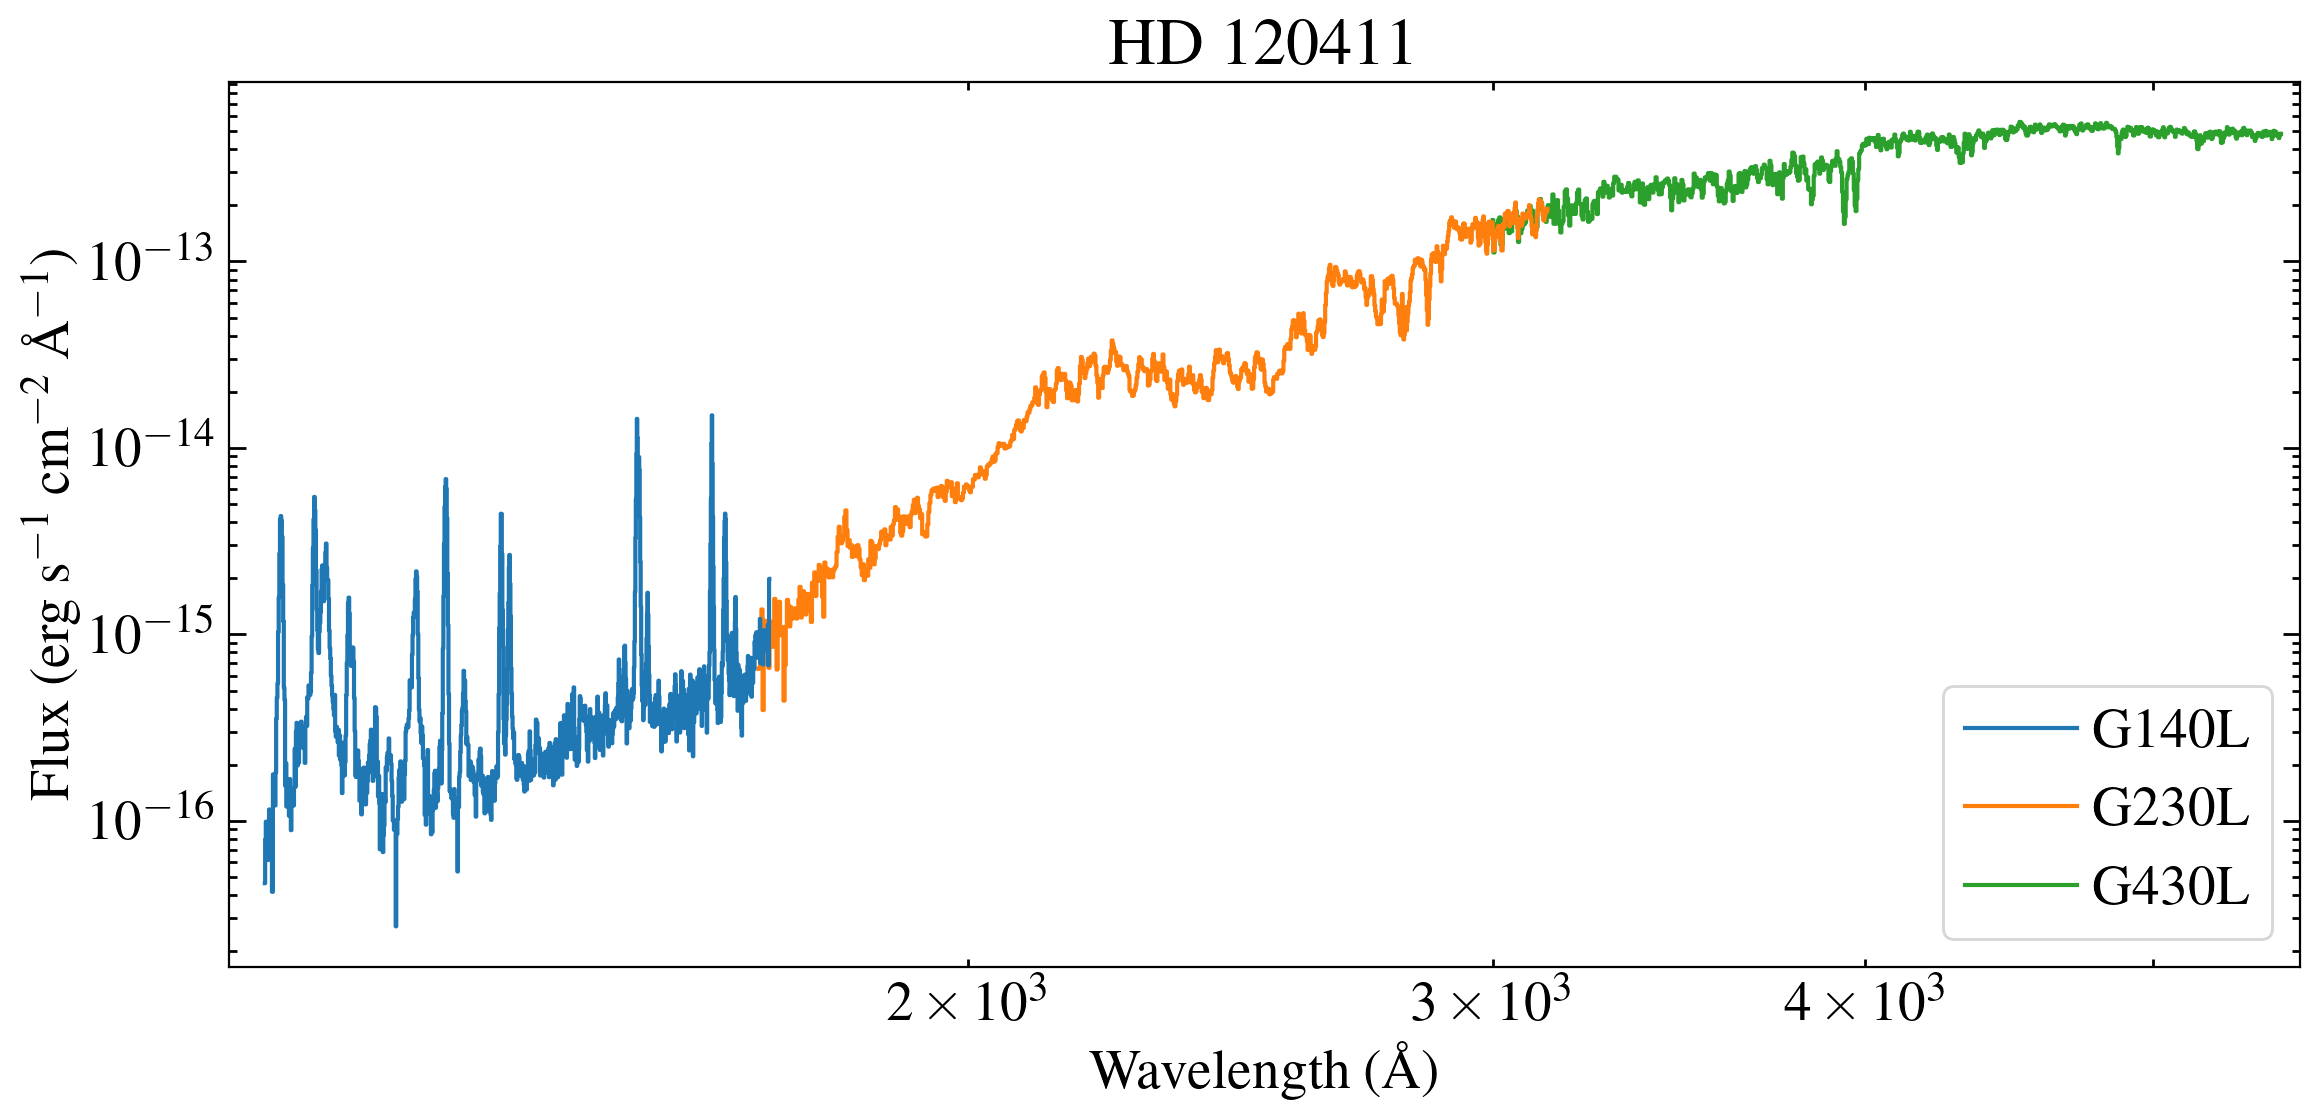

In [7]:
w_fuv = []
f_fuv = []
e_fuv = []
roots = []
n=0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        roots.append(fits.getheader(x, 0)['ROOTNAME'])
        mask = (w > 1160)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        n +=1
    if grating == 'G230L':
        mask = (w > 1700) & (w <3130)
        w_nuv, f_nuv, e_nuv = w[mask], f[mask], e[mask]
    if grating == 'G430L':
        mask = (w > 3000) & (w <5520)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]


        
        
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)
mask = (f_fuv > 0)
w_fuv, f_fuv, e_fuv = w_fuv[mask], f_fuv[mask], e_fuv[mask]


plt.figure(figsize=(12, 6))

plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('HD 120411')
plt.xlim(1130, 5600)
plt.tight_layout()
plt.savefig('plots/hd120411_ql.pdf')
plt.savefig('plots/HD-120411_ql.png', facecolor='w')

oeoo27010


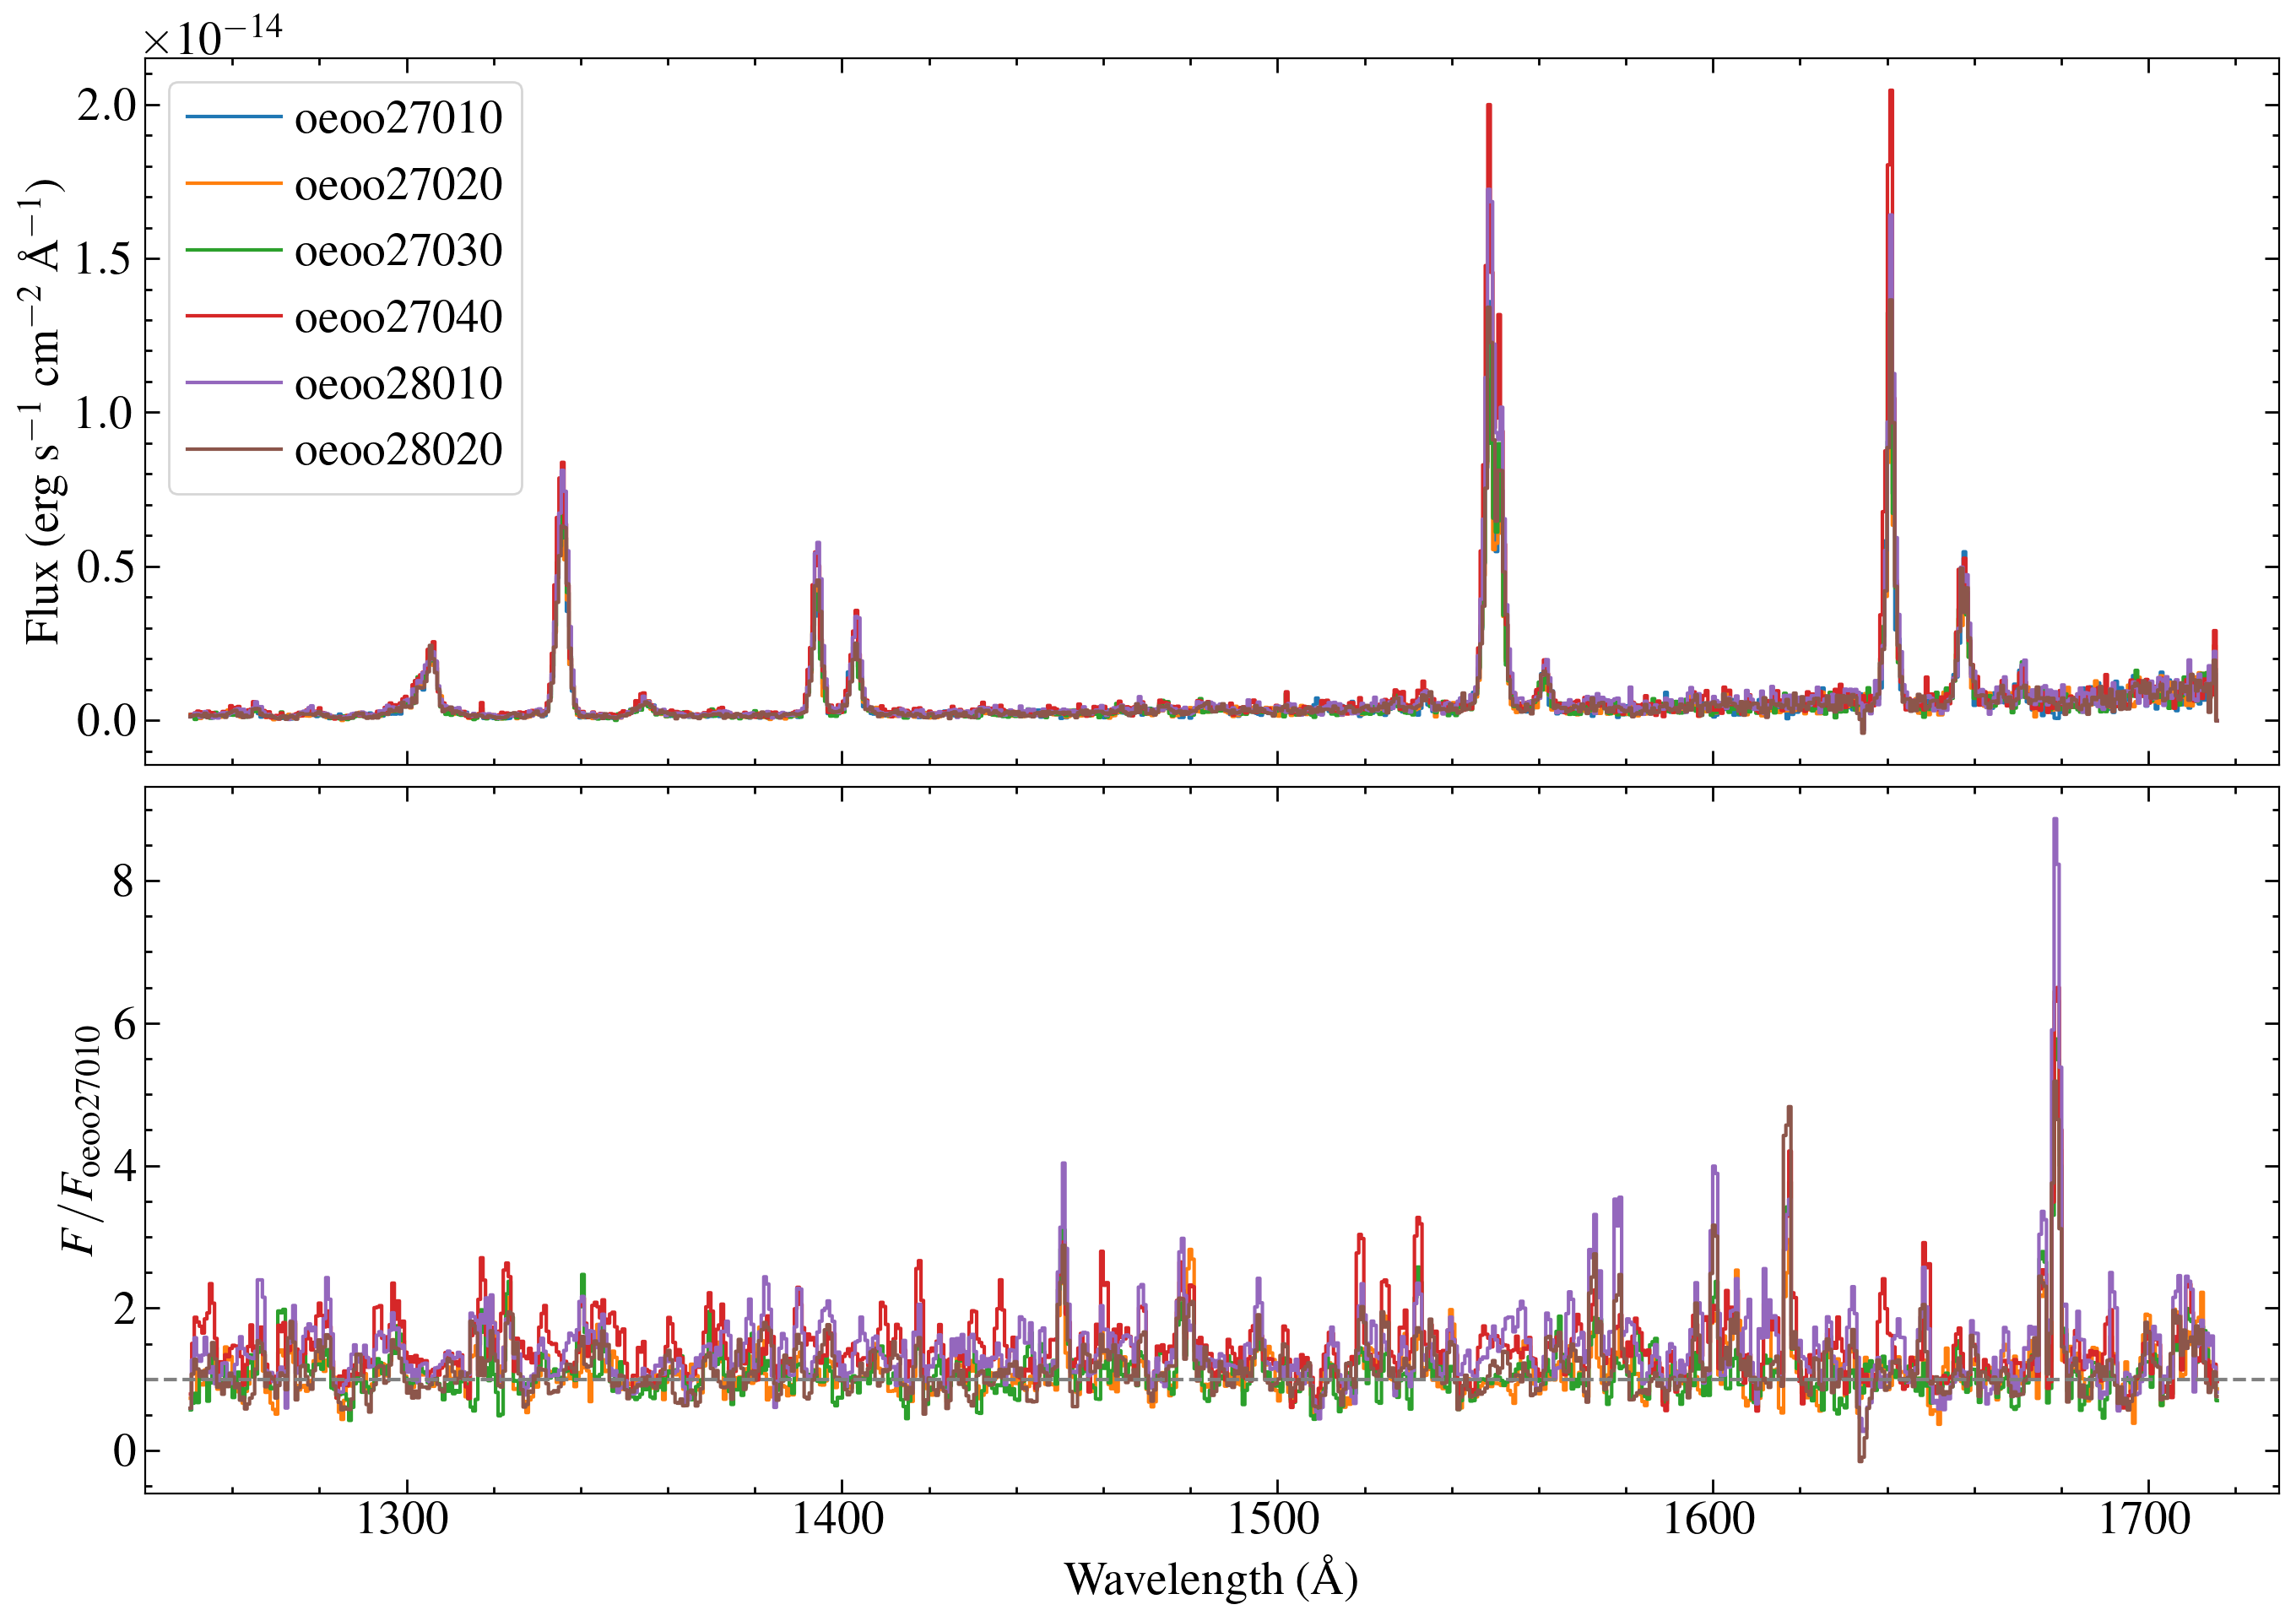

In [8]:
plt.figure(figsize=(14, 10))

plt.subplot(211)
for x in x1ds[0:6]:
    # print(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    root = fits.getheader(x, 0)['ROOTNAME']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', label=root)
plt.legend(frameon=True, loc=2)
plt.xticks(visible=False)
plt.xlim(1240, 1730)
    
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

plt.subplot(212)
n = 0
for x in x1ds[0:6]:  
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    if n == 0:
        wc, fc, ec = w, f, e
        root = fits.getheader(x, 0)['ROOTNAME']
        plt.plot([0,0], [0,0])
    else:
        ratio = f/fc
        ratio = convolve(ratio,  Box1DKernel(3))
        plt.step(w, ratio, where='mid')
    n +=1
    
plt.xlim(1240, 1730)

print(root)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('$F/F_{\mathrm{oeoo27010}}$')
plt.axhline(1, ls='--', c='0.5')
# plt.legend(frameon=True, loc=4)
# plt.title('HD 120411')
# plt.xlim(1130, 5600)
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)
plt.savefig('plots/hd120411_varcheck.pdf')
plt.savefig('plots/HD-120411_varcheck.png', facecolor='w')

Mg ii lines?

In [9]:
plt.figure(figsize=(7, 5))
for x in x1ds[6:7]:
    # print(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    # root = fits.getheader(x, 0)['ROOTNAME']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1250
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', label=root)
    plt.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
plt.xlim(2775, 2825)
plt.ylim(0.3e-13, 0.99e-13)

lines=[2796.35, 2803.53]
[plt.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()


/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27010_x1d.fits
G140L
85.24121


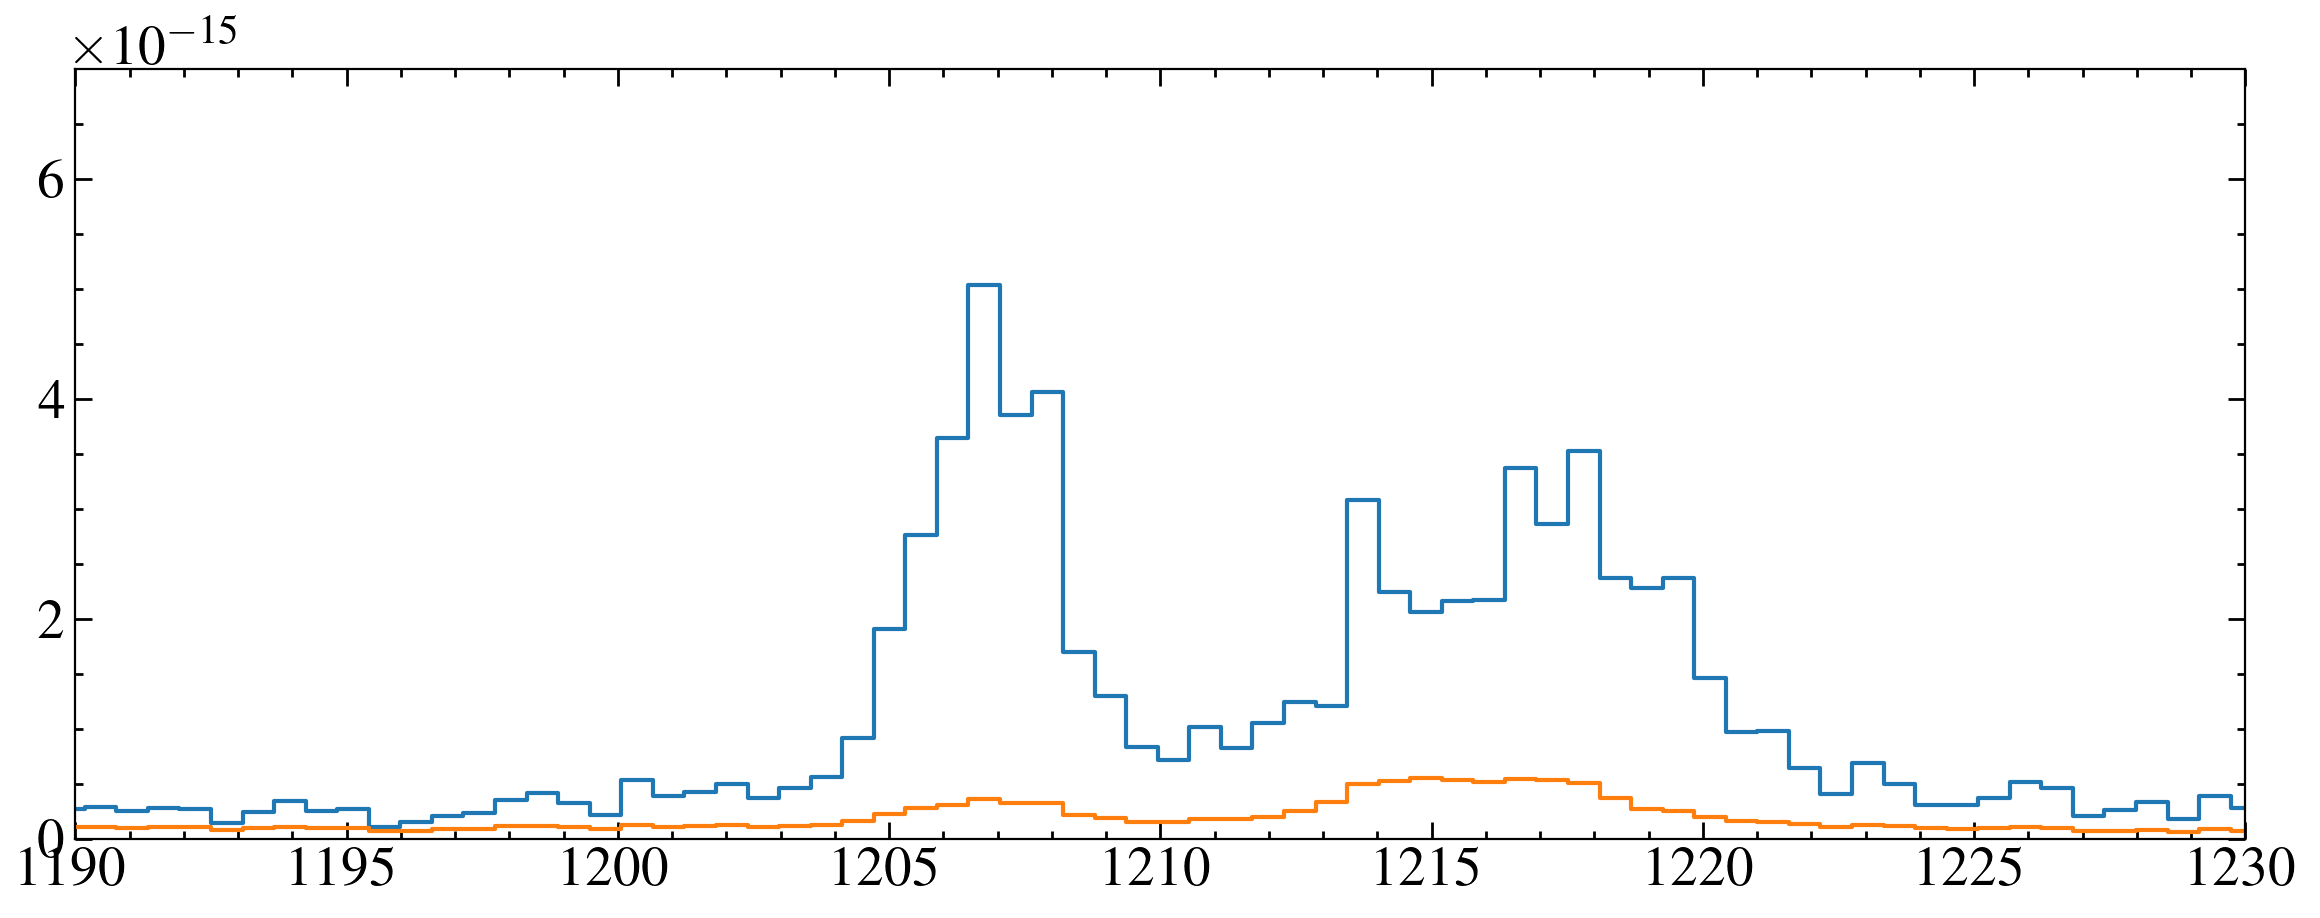

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27020_x1d.fits
G140L
85.70035


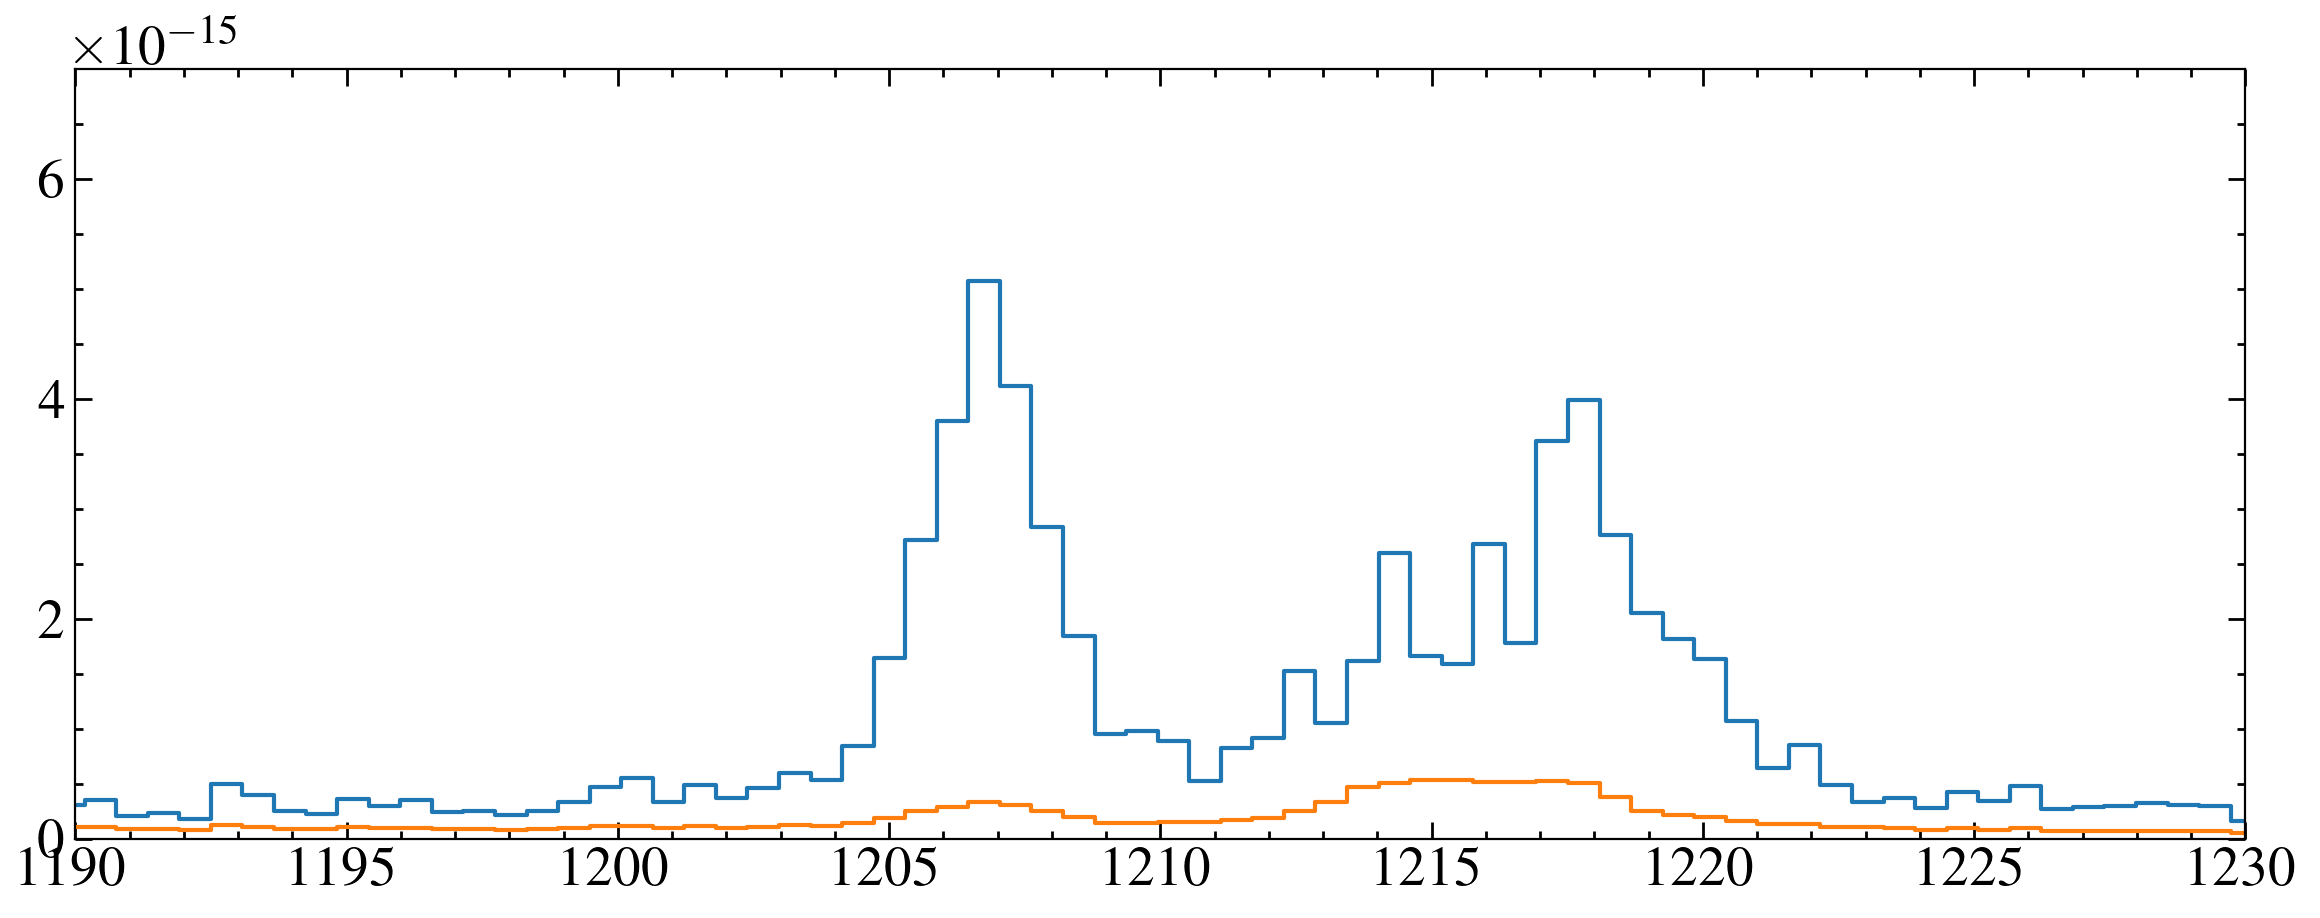

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27030_x1d.fits
G140L
85.91894


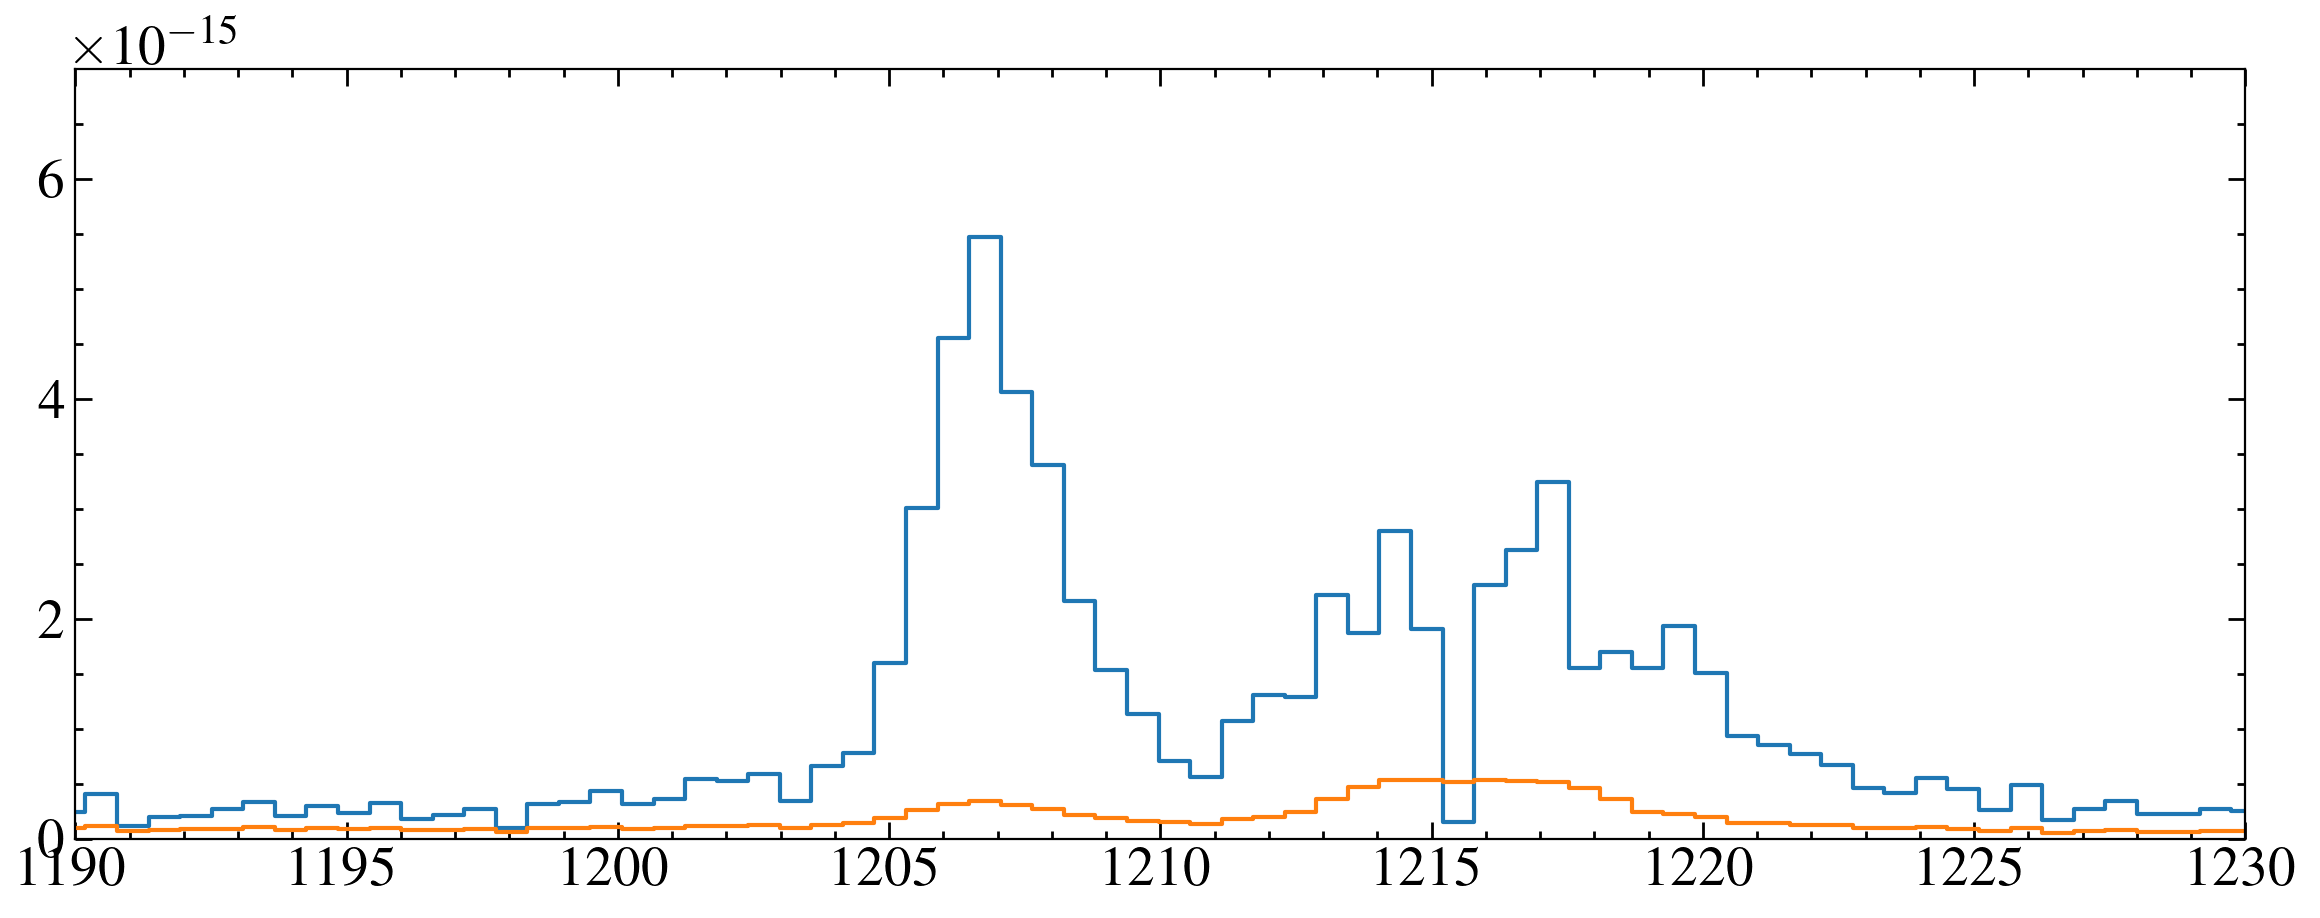

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27040_x1d.fits
G140L
85.88886


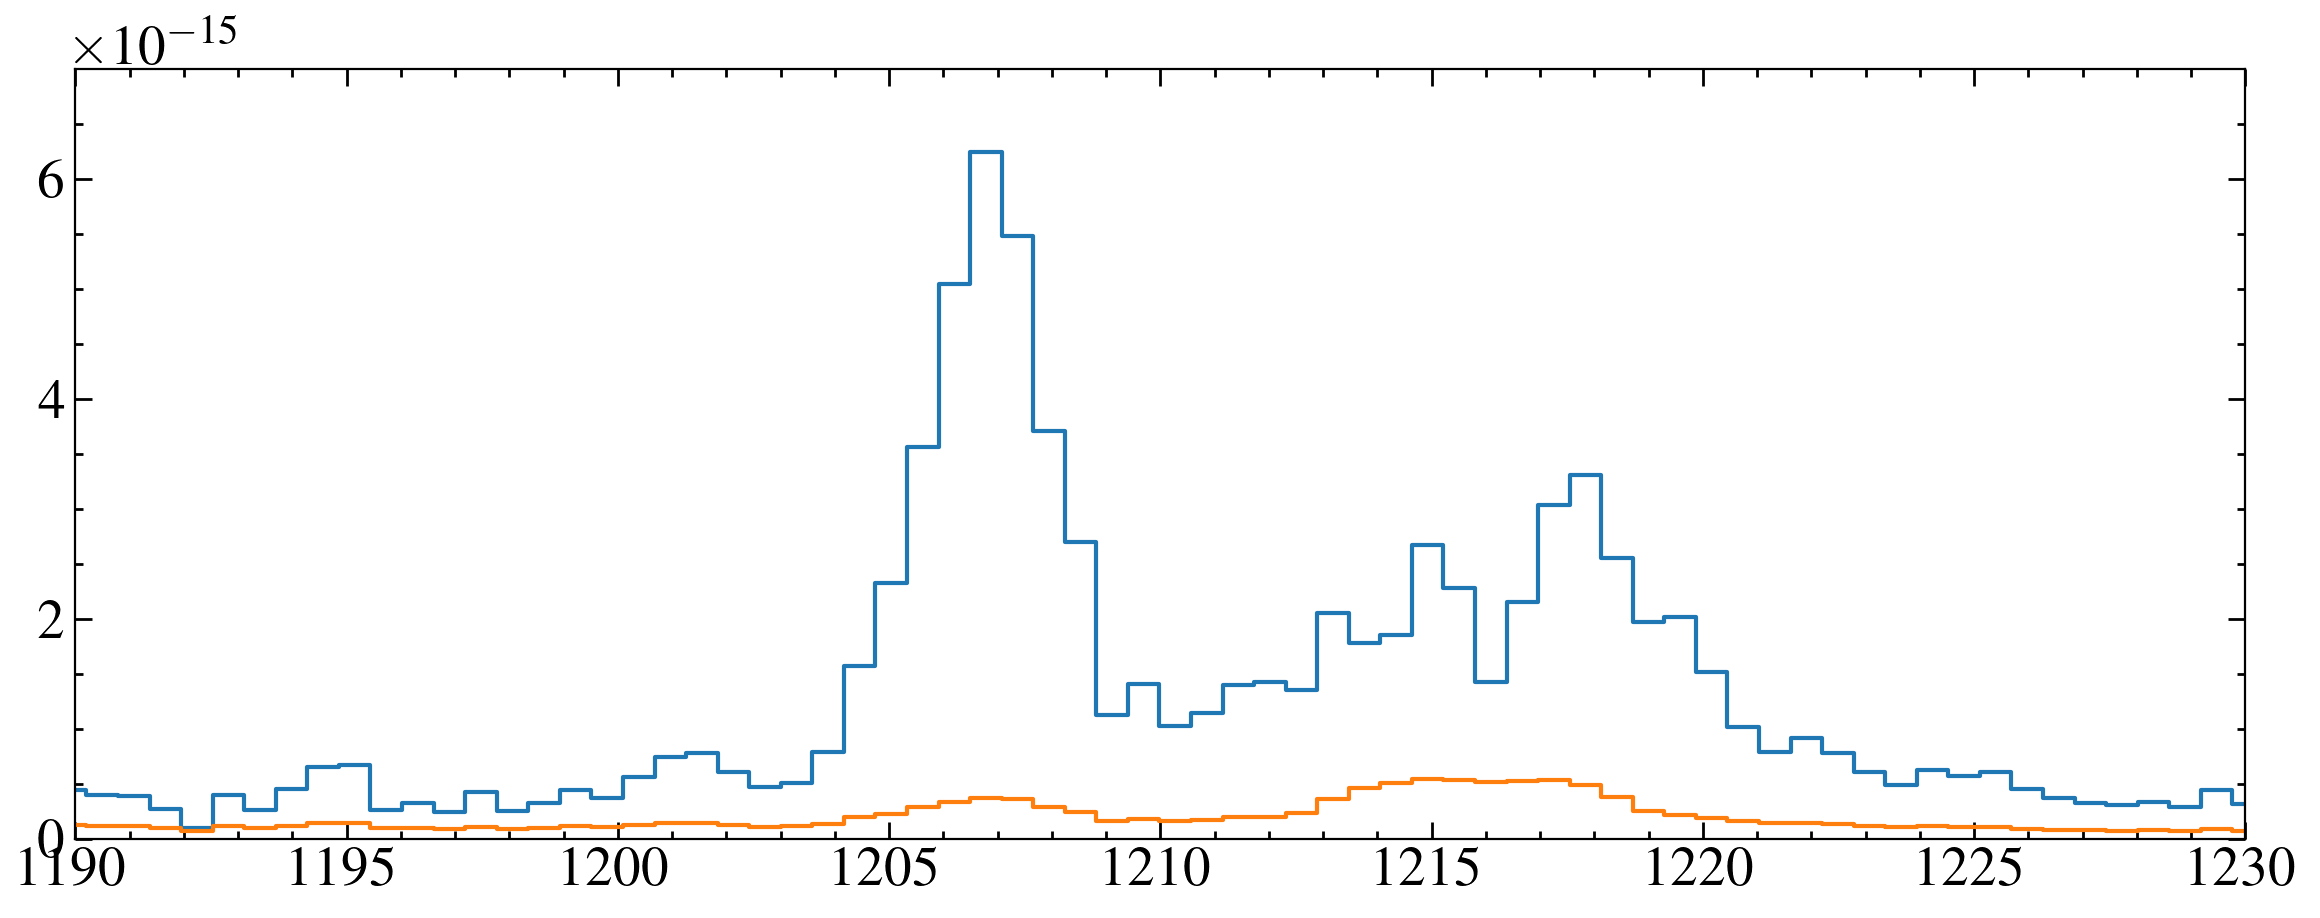

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28010_x1d.fits
G140L
88.22849


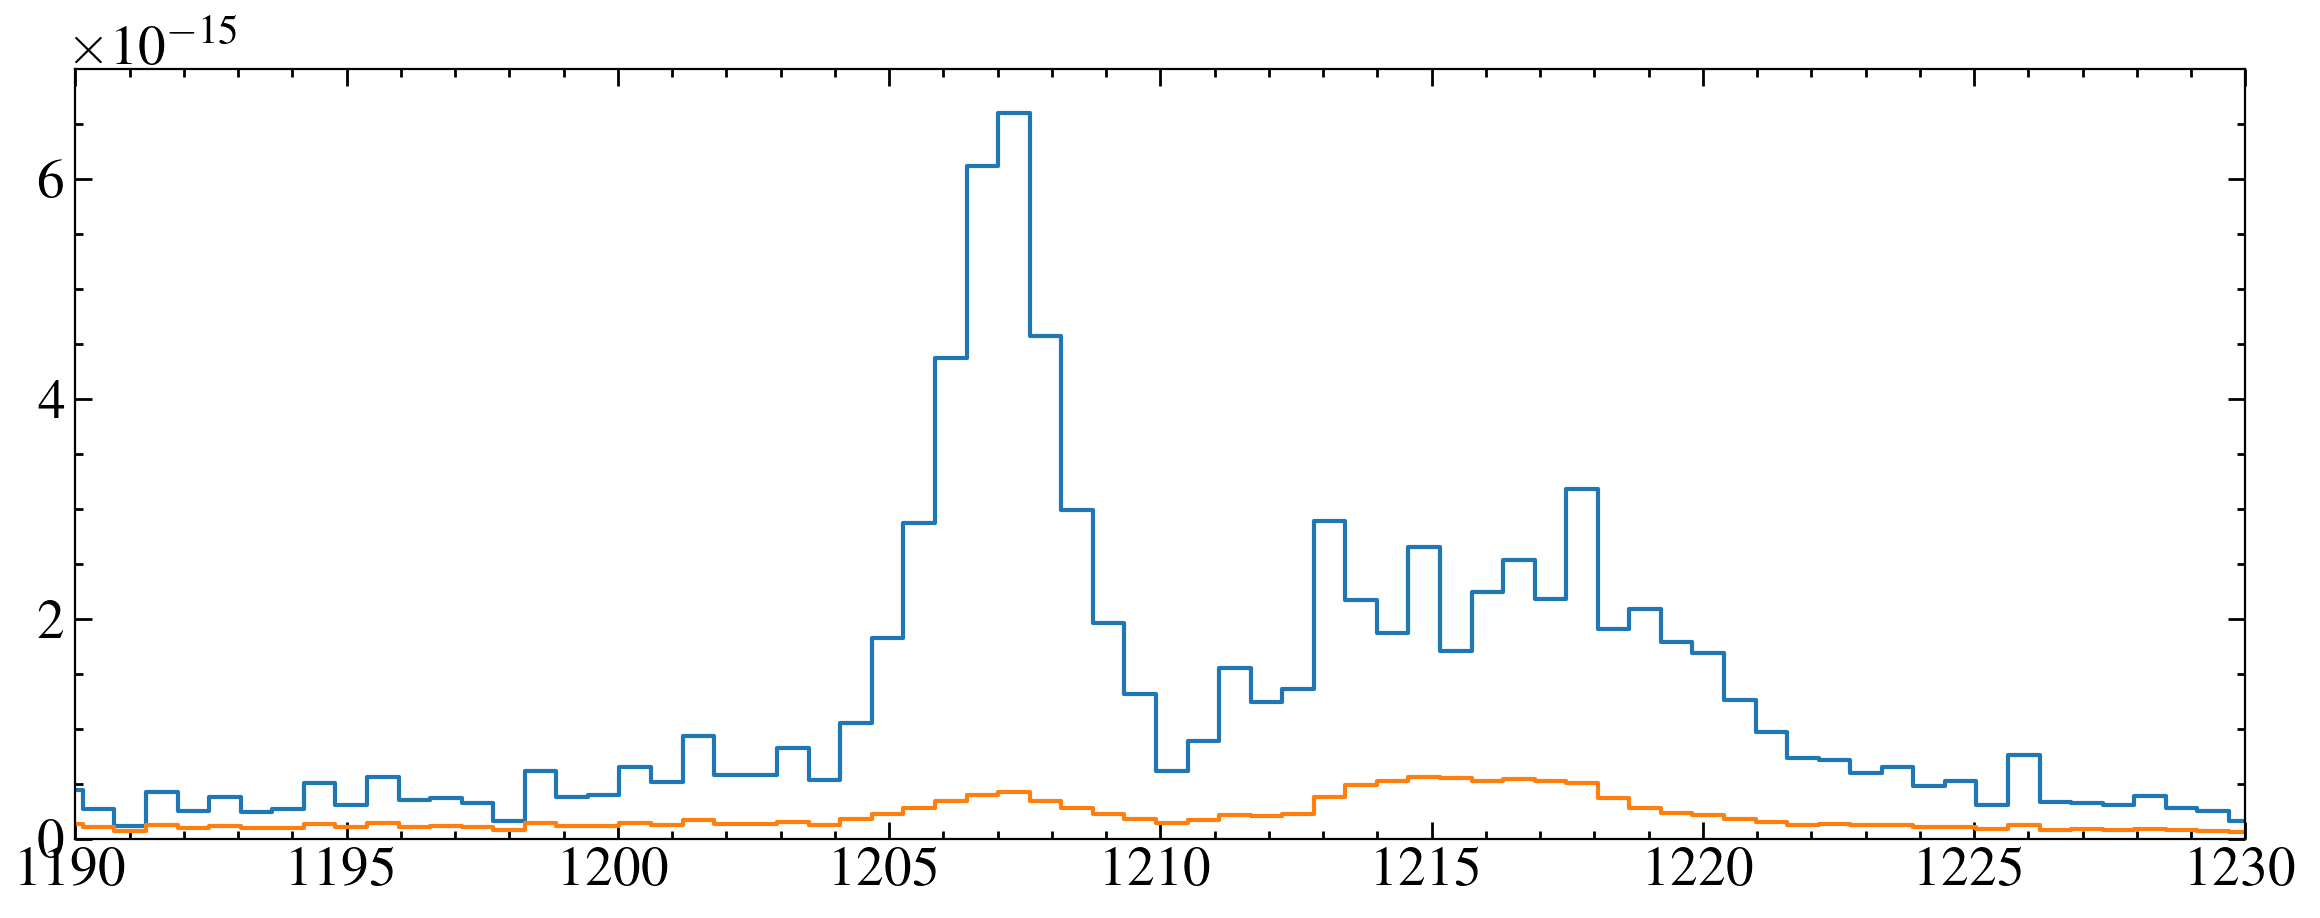

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits
G140L
88.42286


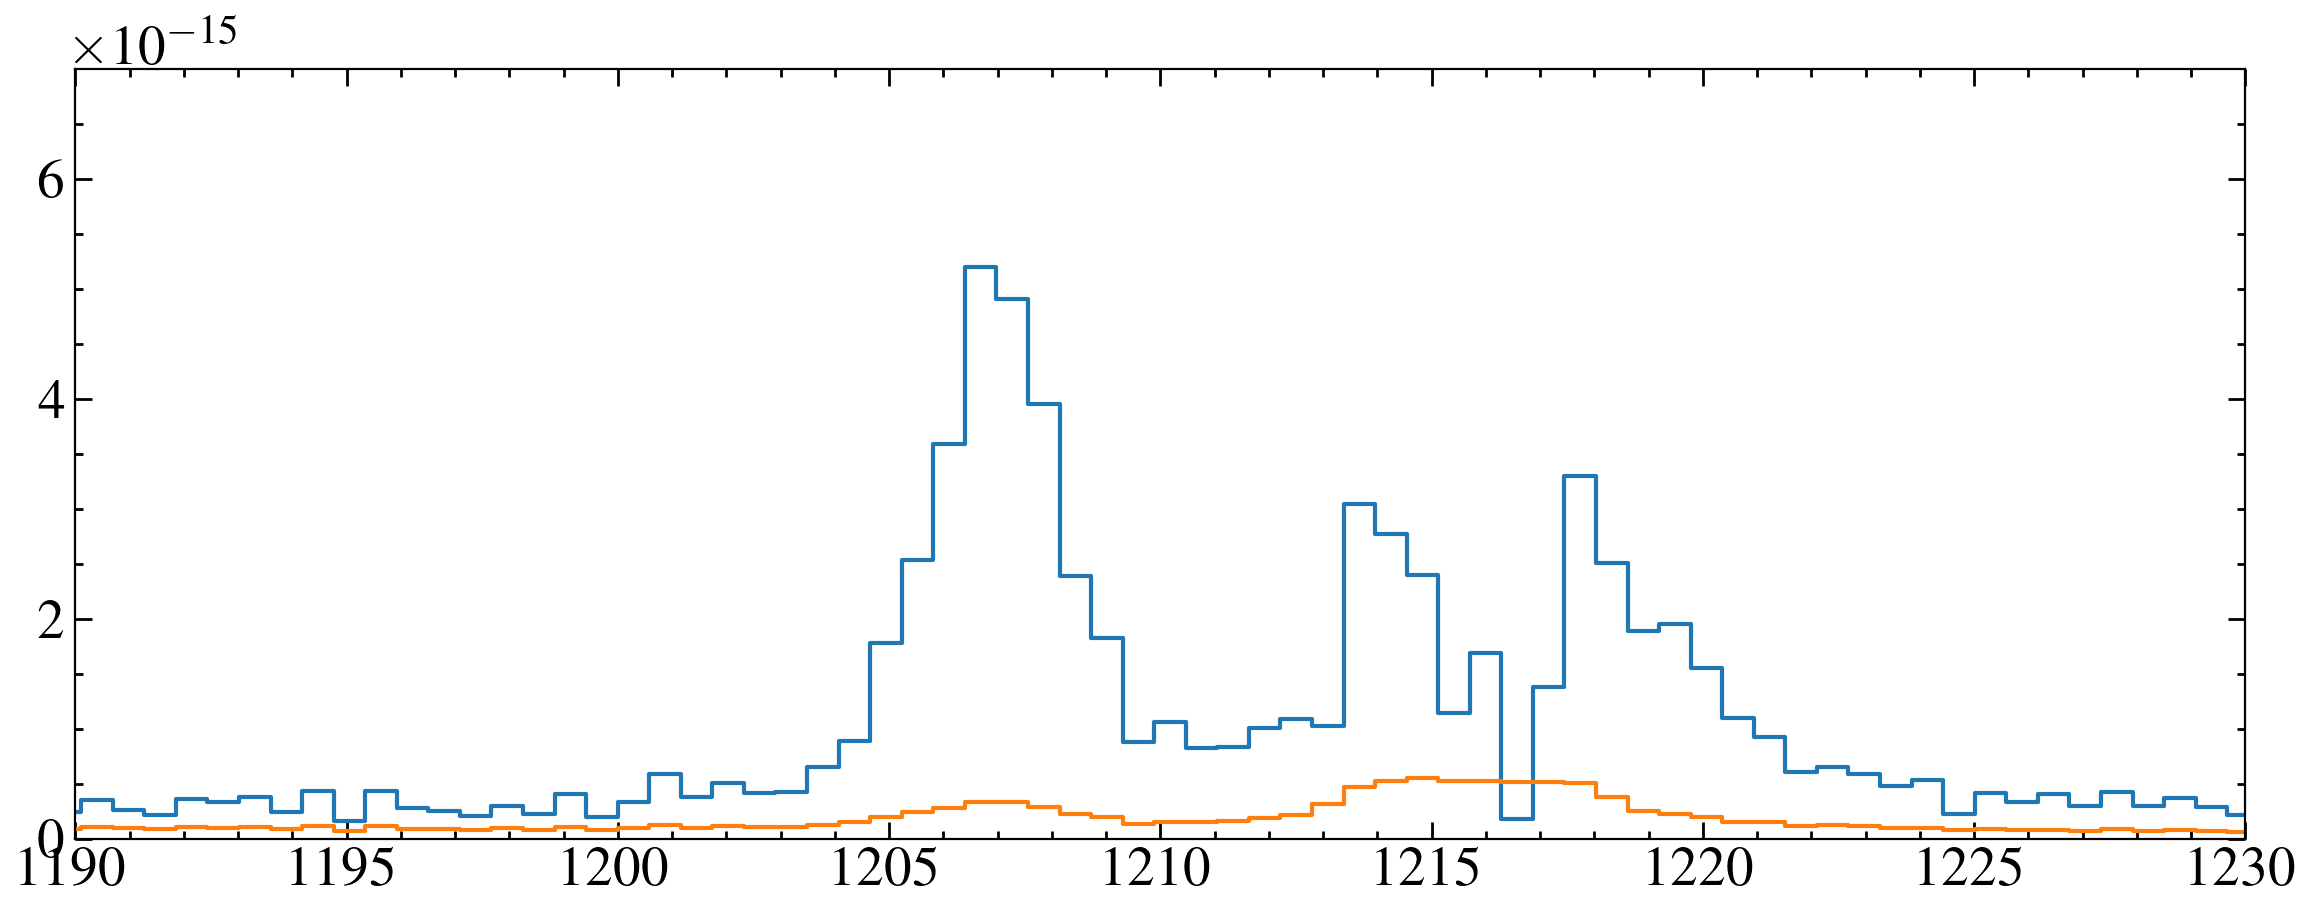

In [10]:
for x in x1ds[0:6]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1160
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    # plt.step(w, data['DQ'], where='mid', c='C1')
    
    plt.xlim(1190, 1230)
    plt.ylim(0, 0.7e-14)
    # plt.ylim(-1, 20)
    plt.show()

(0.0, 7e-15)

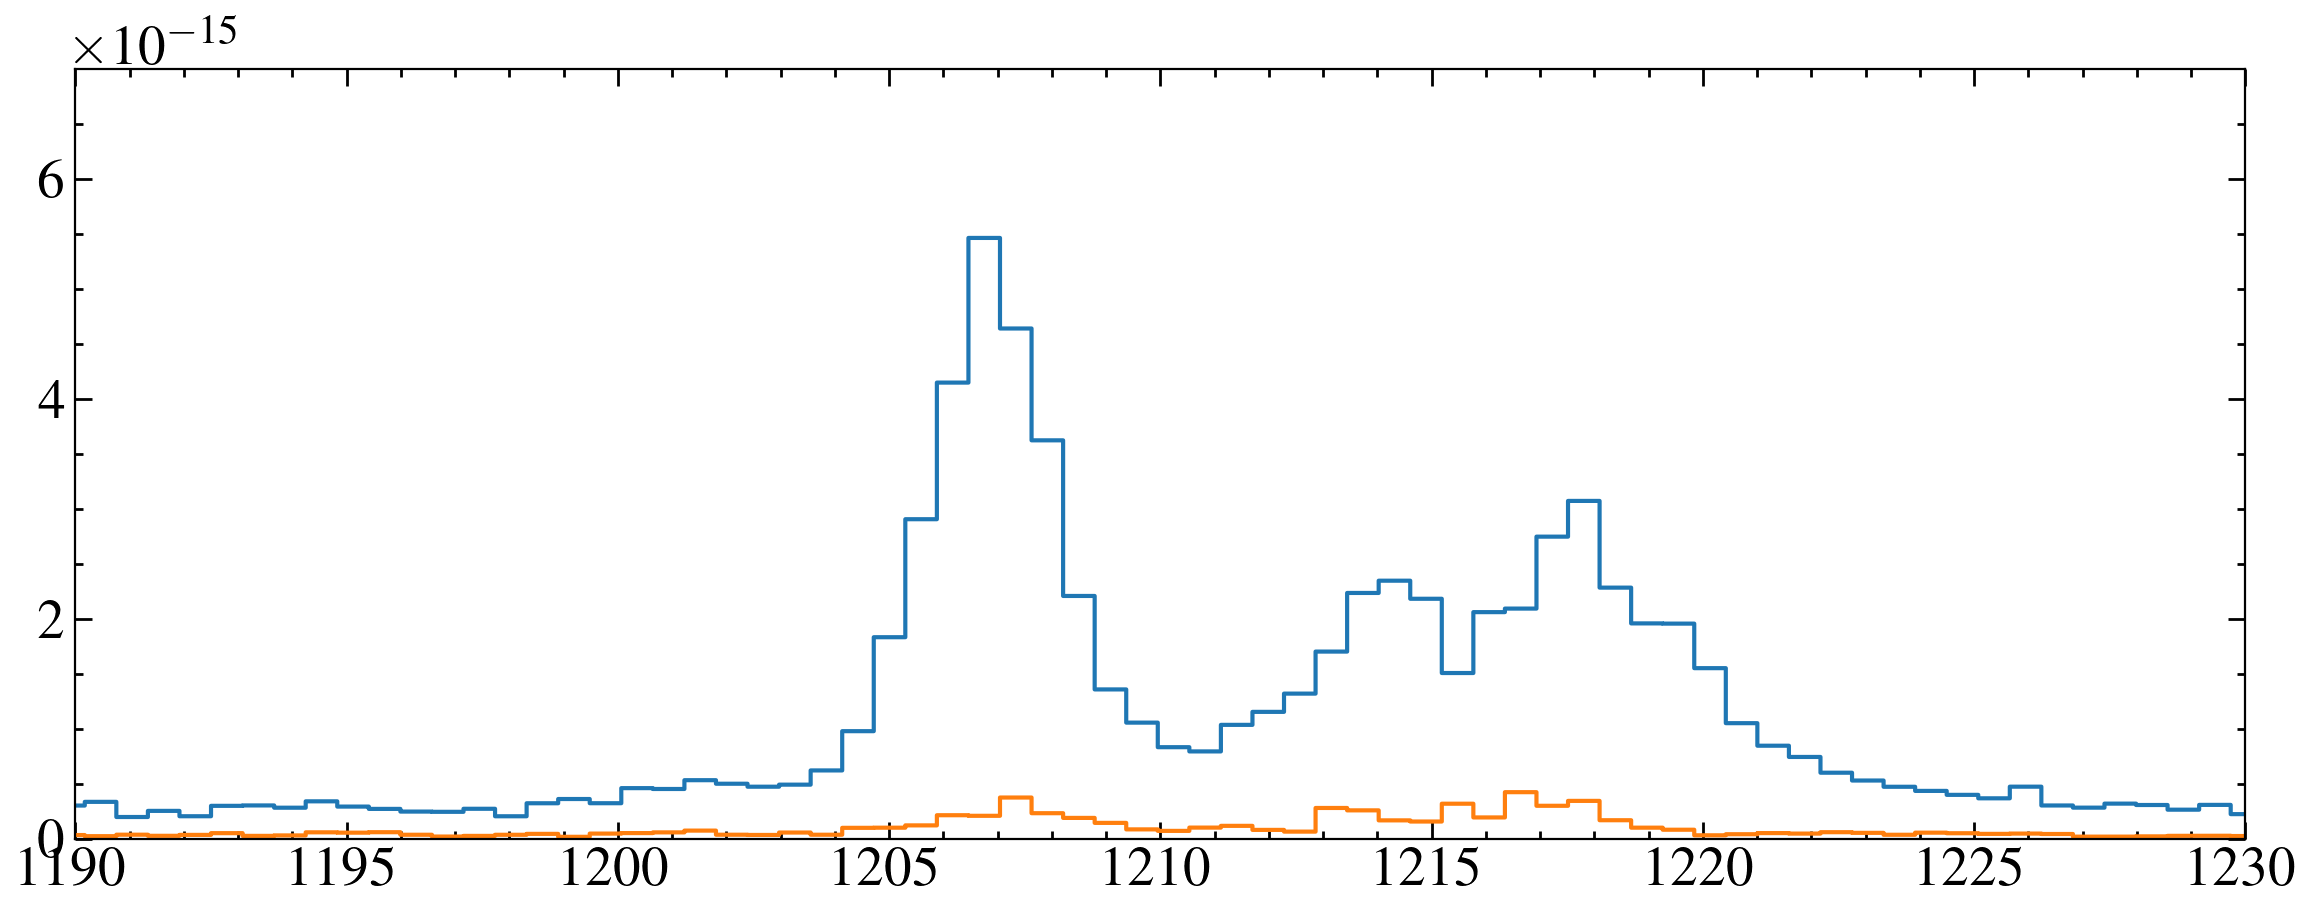

In [11]:
plt.step(w_fuv, f_fuv, where='mid', label='G140L')
plt.step(w_fuv, e_fuv, where='mid', label='G140L')
plt.xlim(1190, 1230)
plt.ylim(0, 0.7e-14)

In [12]:
newdata = Table([w_fuv*u.AA, f_fuv*u.erg/u.s/u.cm**2/u.AA, e_fuv*u.erg/u.s/u.cm**2/u.AA], names=['WAVELENGTH', 'FLUX', 'ERROR'])
primary_hdu = fits.PrimaryHDU(header=fits.getheader(x,0))
hdu = fits.table_to_hdu(newdata)
hdu.name='SPECTRUM'
root_hdu = fits.table_to_hdu(Table([roots], names=['ROOTNAMES']))
root_hdu.name = 'ROOTNAMES'
hdul = fits.HDUList([primary_hdu, hdu, root_hdu])
hdul.writeto('misc_data/hd120411_g140l_coadd.fits', overwrite=True)

In [13]:
from astropy.convolution import convolve_fft
from astropy.convolution import Gaussian1DKernel

def smear(w,f, R, w_sample=1):
    '''
    Smears a model spectrum with a gaussian kernel to the given resolution, R.
    Adapeted from https://github.com/spacetelescope/pysynphot/issues/78

    Parameters
    -----------

    w,f:  spectrum to smear

    R: int
        The resolution (dL/L) to smear to

    w_sample: int
        Oversampling factor for smoothing

    Returns
    -----------

    sp: PySynphot Source Spectrum
        The smeared spectrum
    '''

    # Save original wavelength grid and units
    w_grid = w
    

    # Generate logarithmic wavelength grid for smoothing
    w_logmin = np.log10(np.nanmin(w_grid))
    w_logmax = np.log10(np.nanmax(w_grid))
    n_w = np.size(w_grid)*w_sample
    w_log = np.logspace(w_logmin, w_logmax, num=n_w)

    # Find stddev of Gaussian kernel for smoothing
    R_grid = (w_log[1:-1]+w_log[0:-2])/(w_log[1:-1]-w_log[0:-2])/2
    sigma = np.median(R_grid)/R
    if sigma < 1:
        sigma = 1

    # Interpolate on logarithmic grid
    f_log = np.interp(w_log, w_grid, f)

    # Smooth convolving with Gaussian kernel
    gauss = Gaussian1DKernel(stddev=sigma)
    f_conv = convolve_fft(f_log, gauss)

    # Interpolate back on original wavelength grid
    f_sm = np.interp(w_grid, w_log, f_conv)

    # Write smoothed spectrum back into Spectrum object
    return w_grid, f_sm

In [14]:

import importlib
import prepare_phoenix_svo as pp
importlib.reload(pp)

<module 'prepare_phoenix_svo' from '/home/david/work/meats/SEDs/prepare_phoenix_svo.py'>

In [15]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 1.22

teff = 5675
teff_e = 75
radius = 1.38
distance = (1000/7.8288000)
save_path = 'models/'
star = 'hd120411'
g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
print(np.log10(g.value))
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': np.log10(g.value), 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=False, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2

4.244669285175409


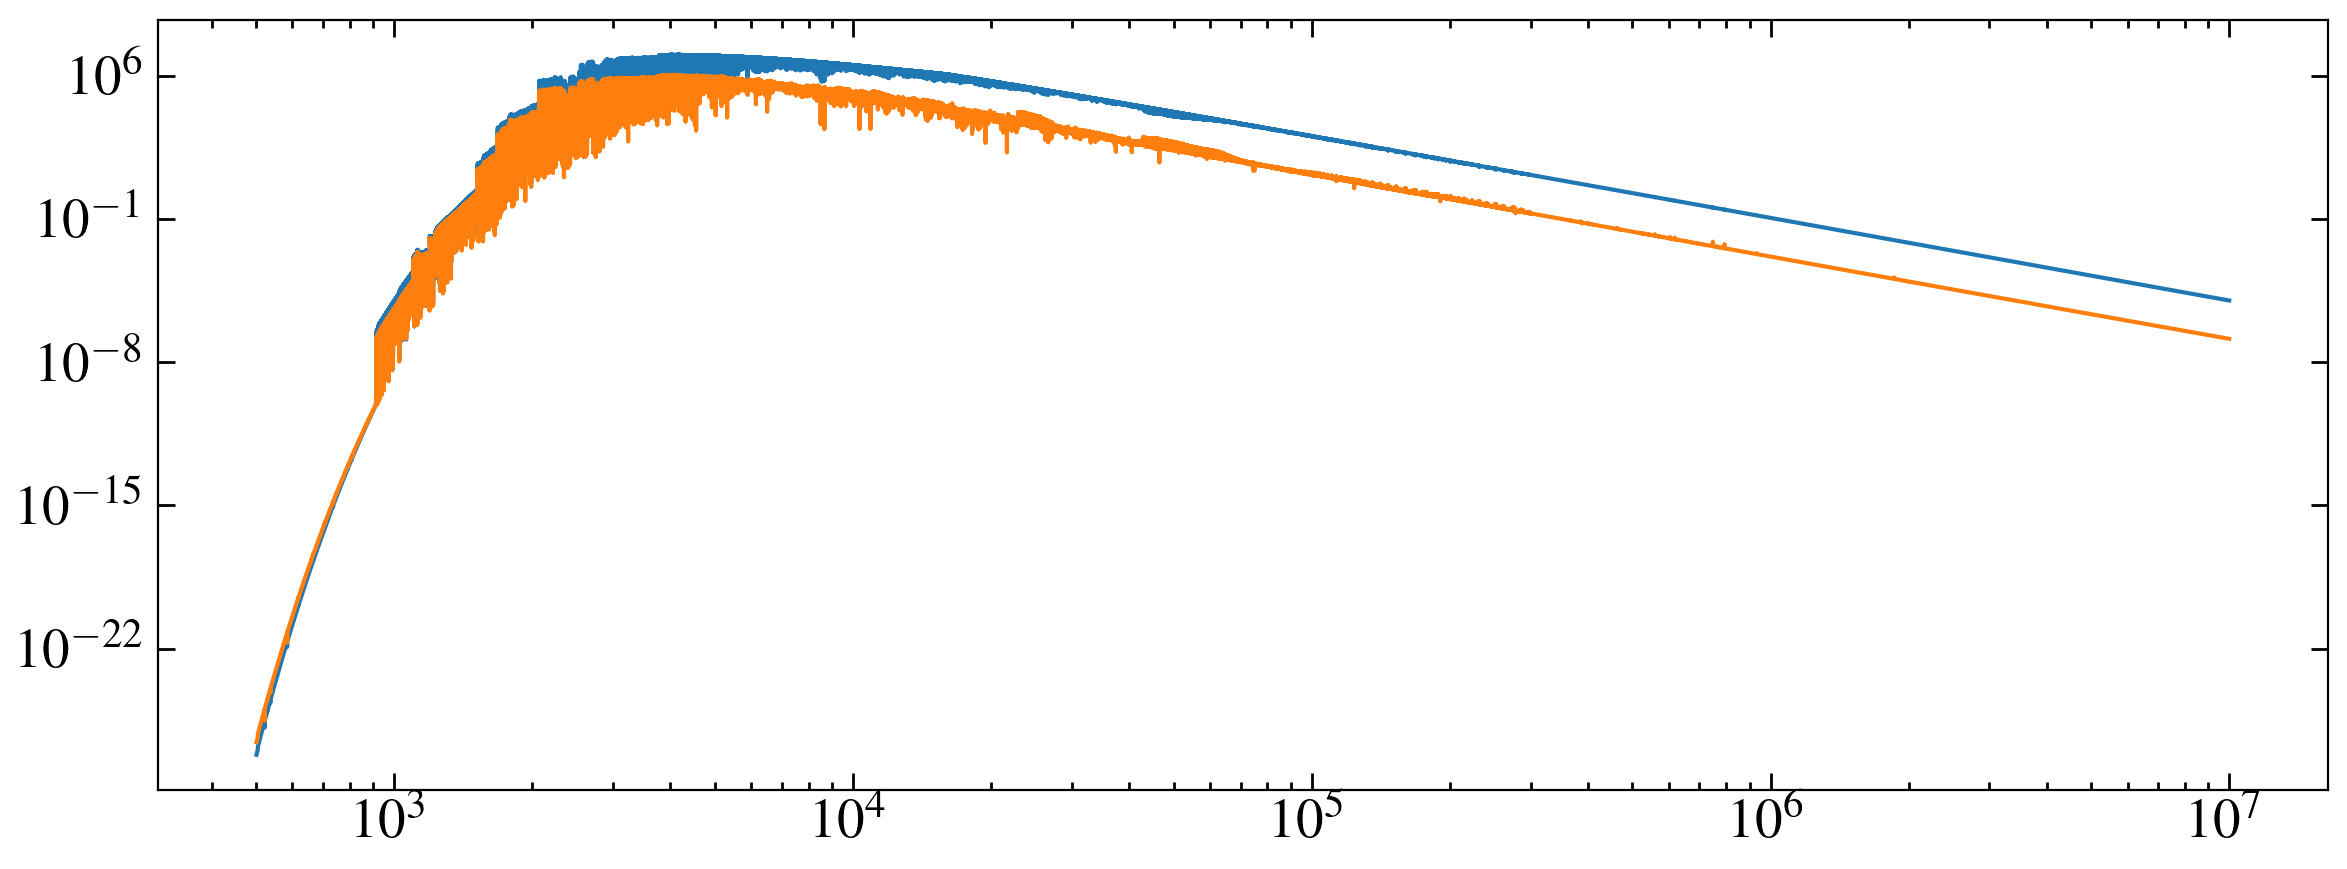

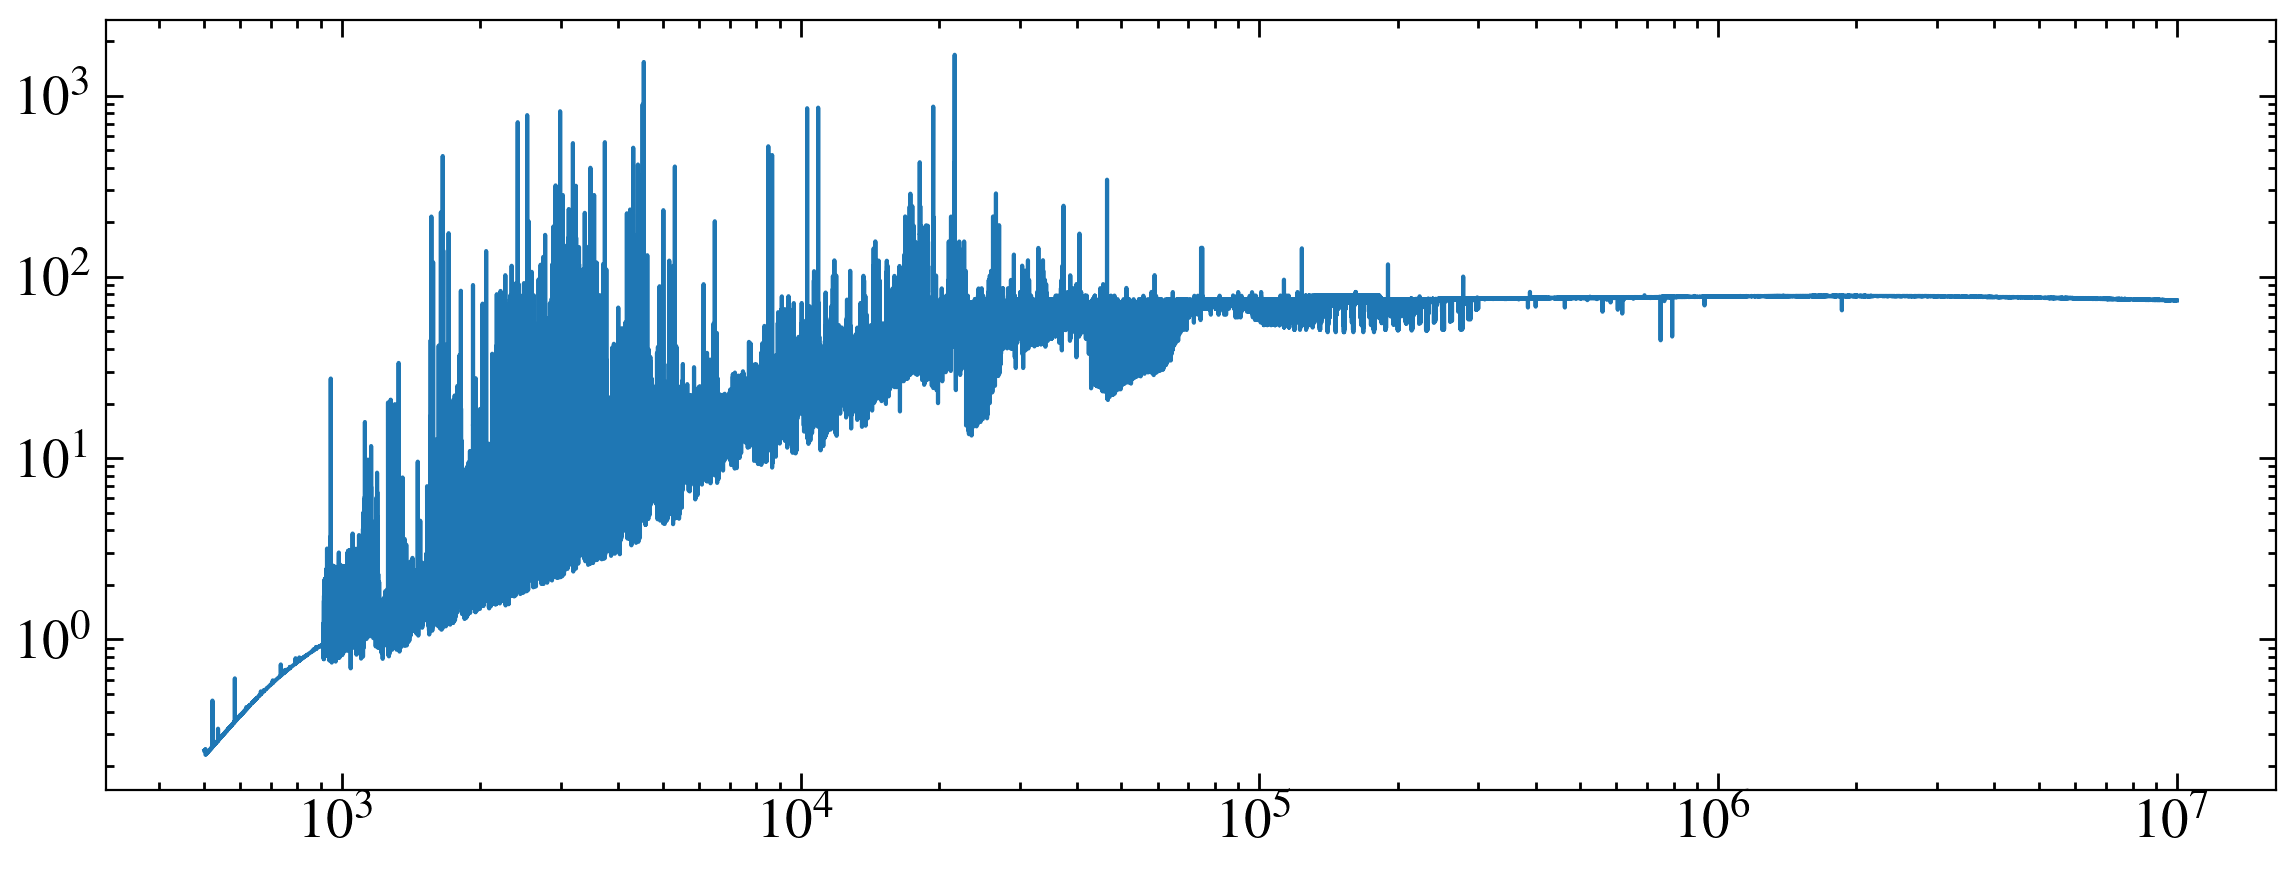

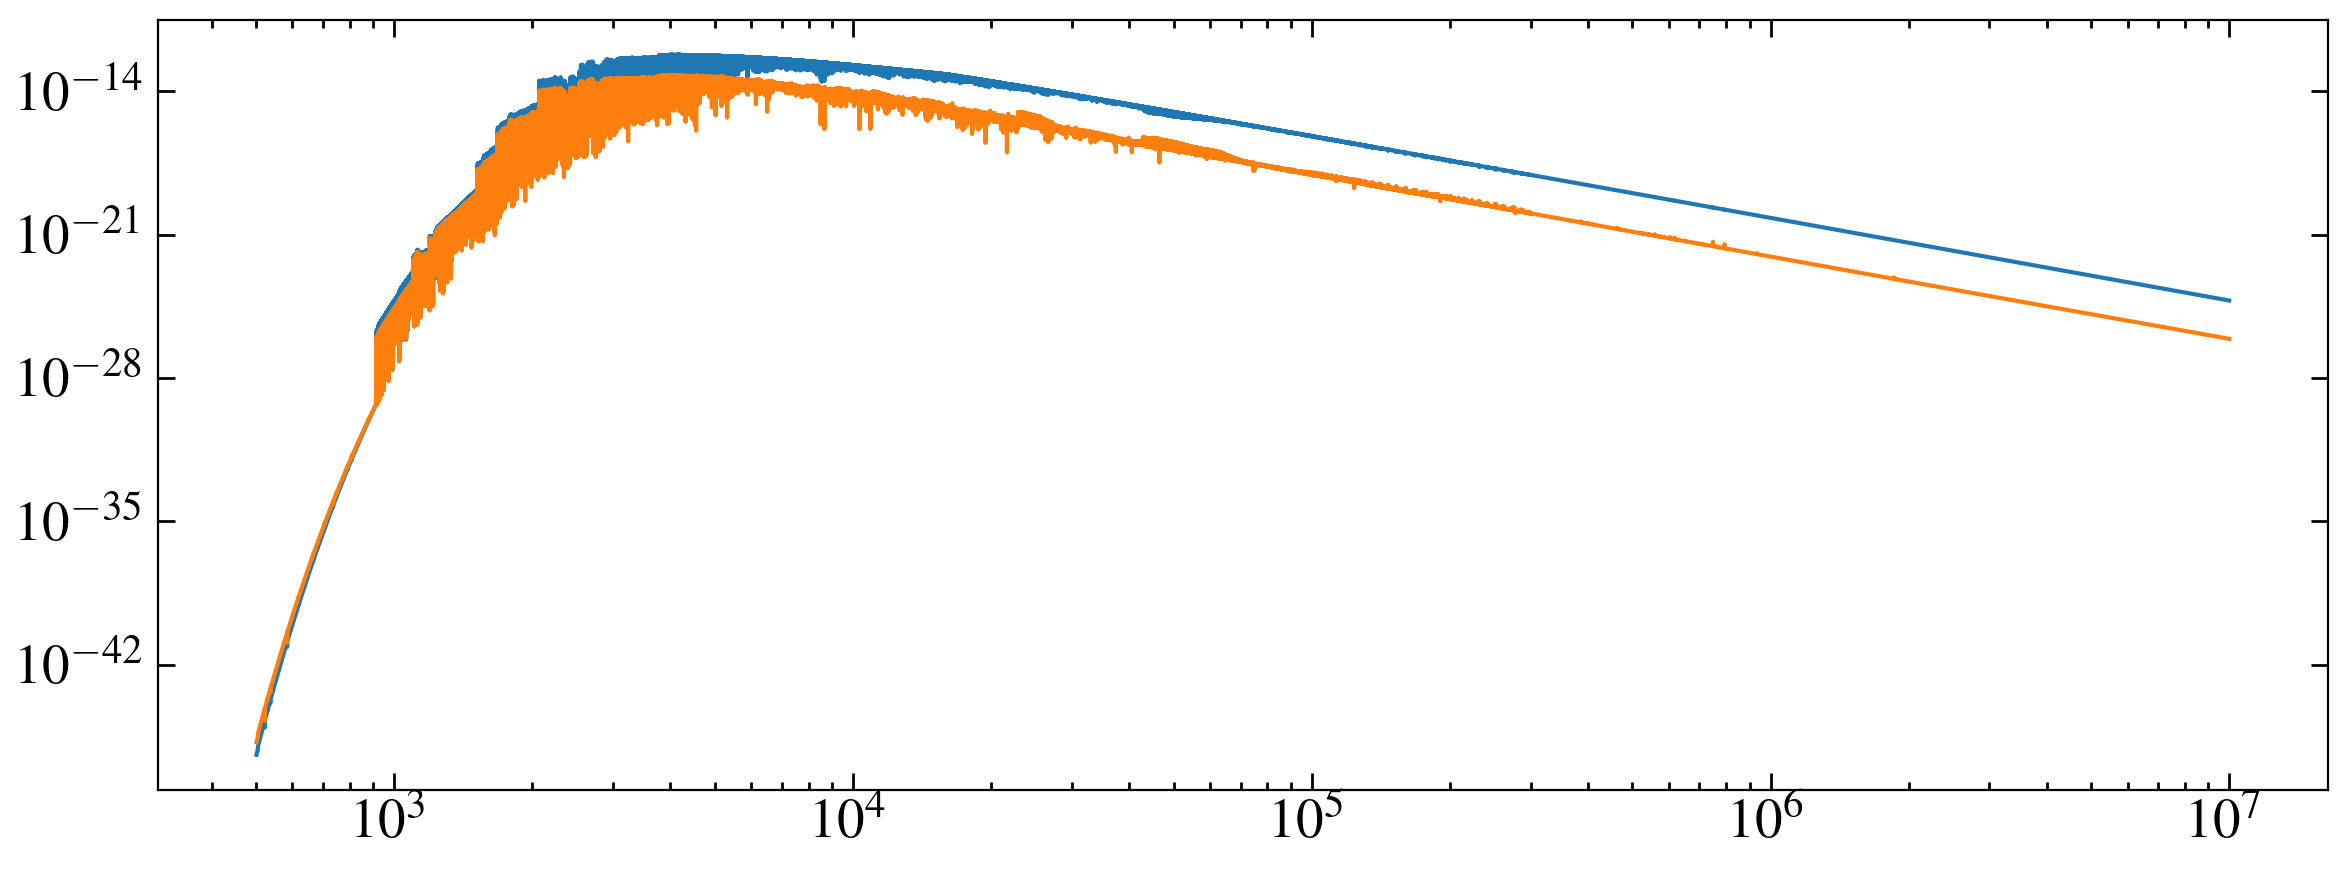

In [16]:
plt.plot(pw, pf)
plt.plot(pw, pe)

plt.yscale('log')
plt.xscale('log')
# plt.xlim(7000, 8000)
plt.show()

plt.plot(pw, pf/pe)

plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(pw, pf*normfac)
plt.plot(pw, pe*normfac)

plt.yscale('log')
plt.xscale('log')
# plt.xlim(7000, 8000)
plt.show()

In [17]:
pmask = (pw > 5500) & (pw < 1e5)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 2000)

plt.figure(figsize=(14, 6))

plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)
plt.step(pwi, pfi, where='mid', label='PHOENIX', zorder=-10)

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('HD 120411')
# plt.xlim(1130, 5600)
plt.tight_layout()

In [18]:
from  xspec import *

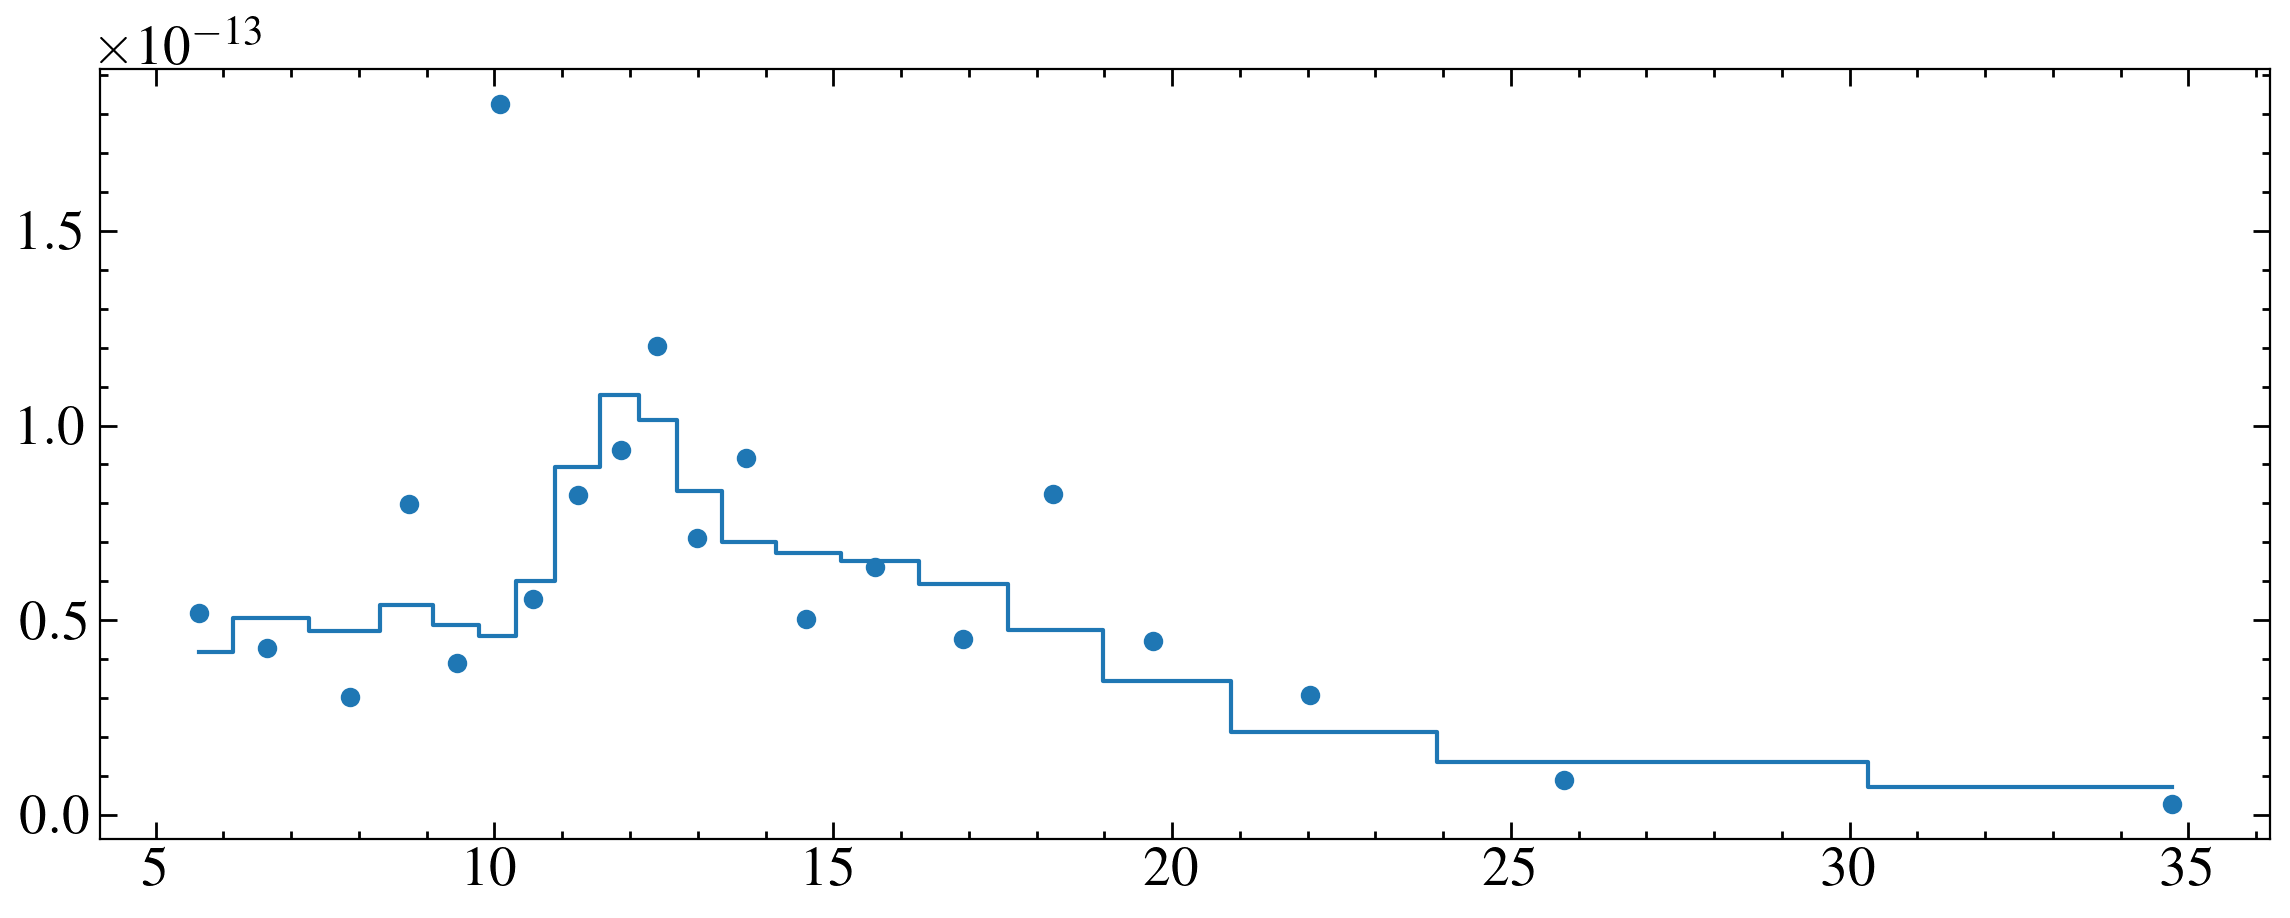

In [19]:
def apec_to_spec(path):
    """
    Converts an xspec plot model wdata textfile from counts to ergs. 
    Assumes that the wavelength array is in Angstrom and the flux arrays are in counts/s/cm2/A
    """
    xrt = np.loadtxt(path, skiprows=3)
    xrt = xrt[::-1]
    wx = xrt[:,0]*u.AA
    kevx = xrt[:, 1]*u.keV
    fx  = (xrt[:,2] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
    model  = (xrt[:,4] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
    return wx, kevx, fx, model

xpath = '/media/david/2tb_ext_hd/hddata/meats/swift/hd120411/spectrum/hd120411_xrt_fit.txt'
wxi, kevx, fxi, model = apec_to_spec(xpath)
plt.step(wxi, model, where='mid')
plt.scatter(wxi, fxi)

Reading APEC data from 3.0.9


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Model phabs<1>(apec<2> + apec<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH

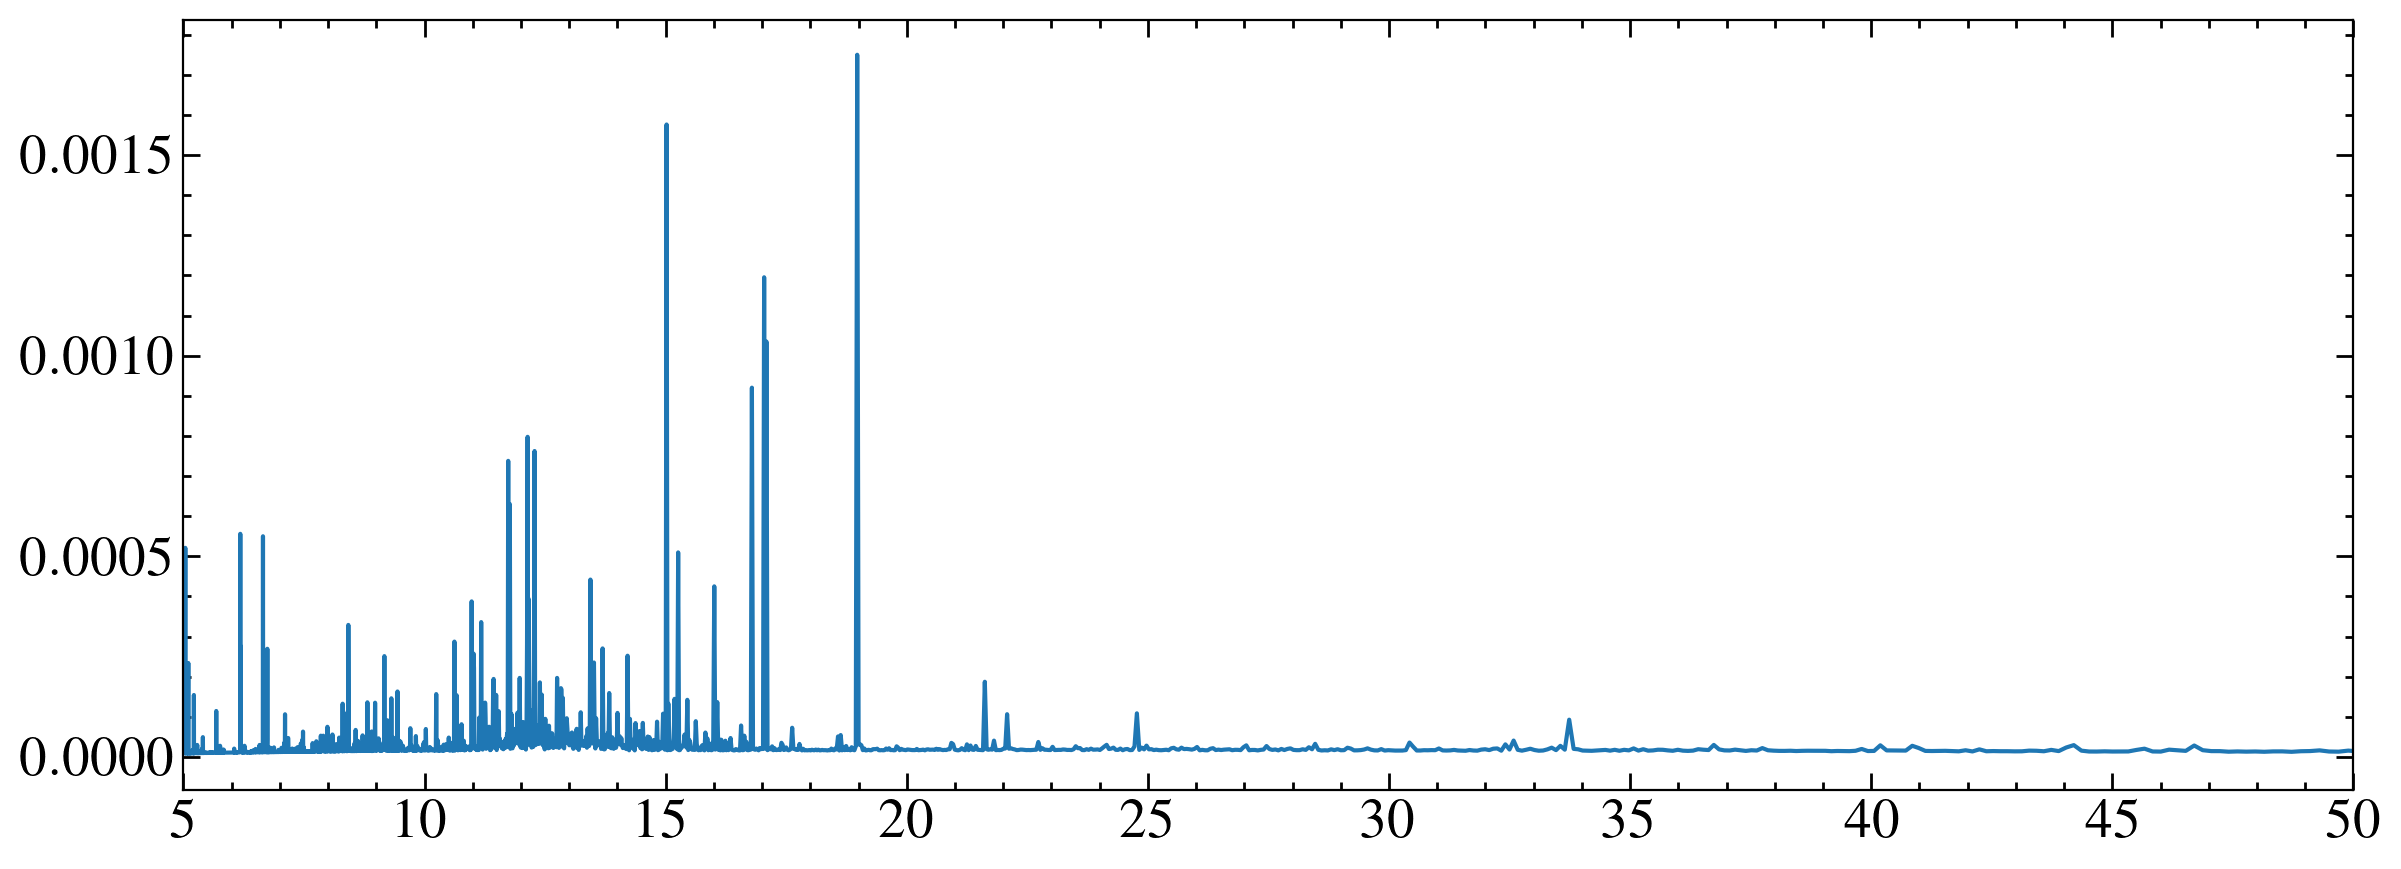

In [20]:
mod = Model('phabs*(apec+apec)', setPars={1:1e-3, 2:0.39, 3:0.4, 5:4e-4, 6:1.3, 7:0.4, 9:7.7e-4})
Plot.xAxis = "angstrom"
Plot.perHz = False
Plot.area=True
fluxnum = mod.flux[0]
AllModels.setEnergies("0.1 2.5 2400")
Plot("model")
xVals = Plot.x()
yVals = Plot.model()
wx = xVals*u.AA
fx  = (yVals * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
plt.plot(wx, yVals)
plt.xlim(5, 50)
plt.show()

In [21]:
pmask = (pw > 5500) & (pw < 2e5)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 2000)

plt.figure(figsize=(14, 7))

plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)
plt.step(pwi, pfi, where='mid', label='PHOENIX', zorder=-10)
plt.step(wx, fx, where='mid', label='APEC (XRT)')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=3)
plt.title('HD 120411')
plt.xlim(3, 1.1e5)
plt.ylim(2e-17)
plt.tight_layout()
plt.savefig('plots/hd120411_xrt_sed.pdf')
plt.savefig('plots/hd120411_xrt_sed.png', facecolor='w')

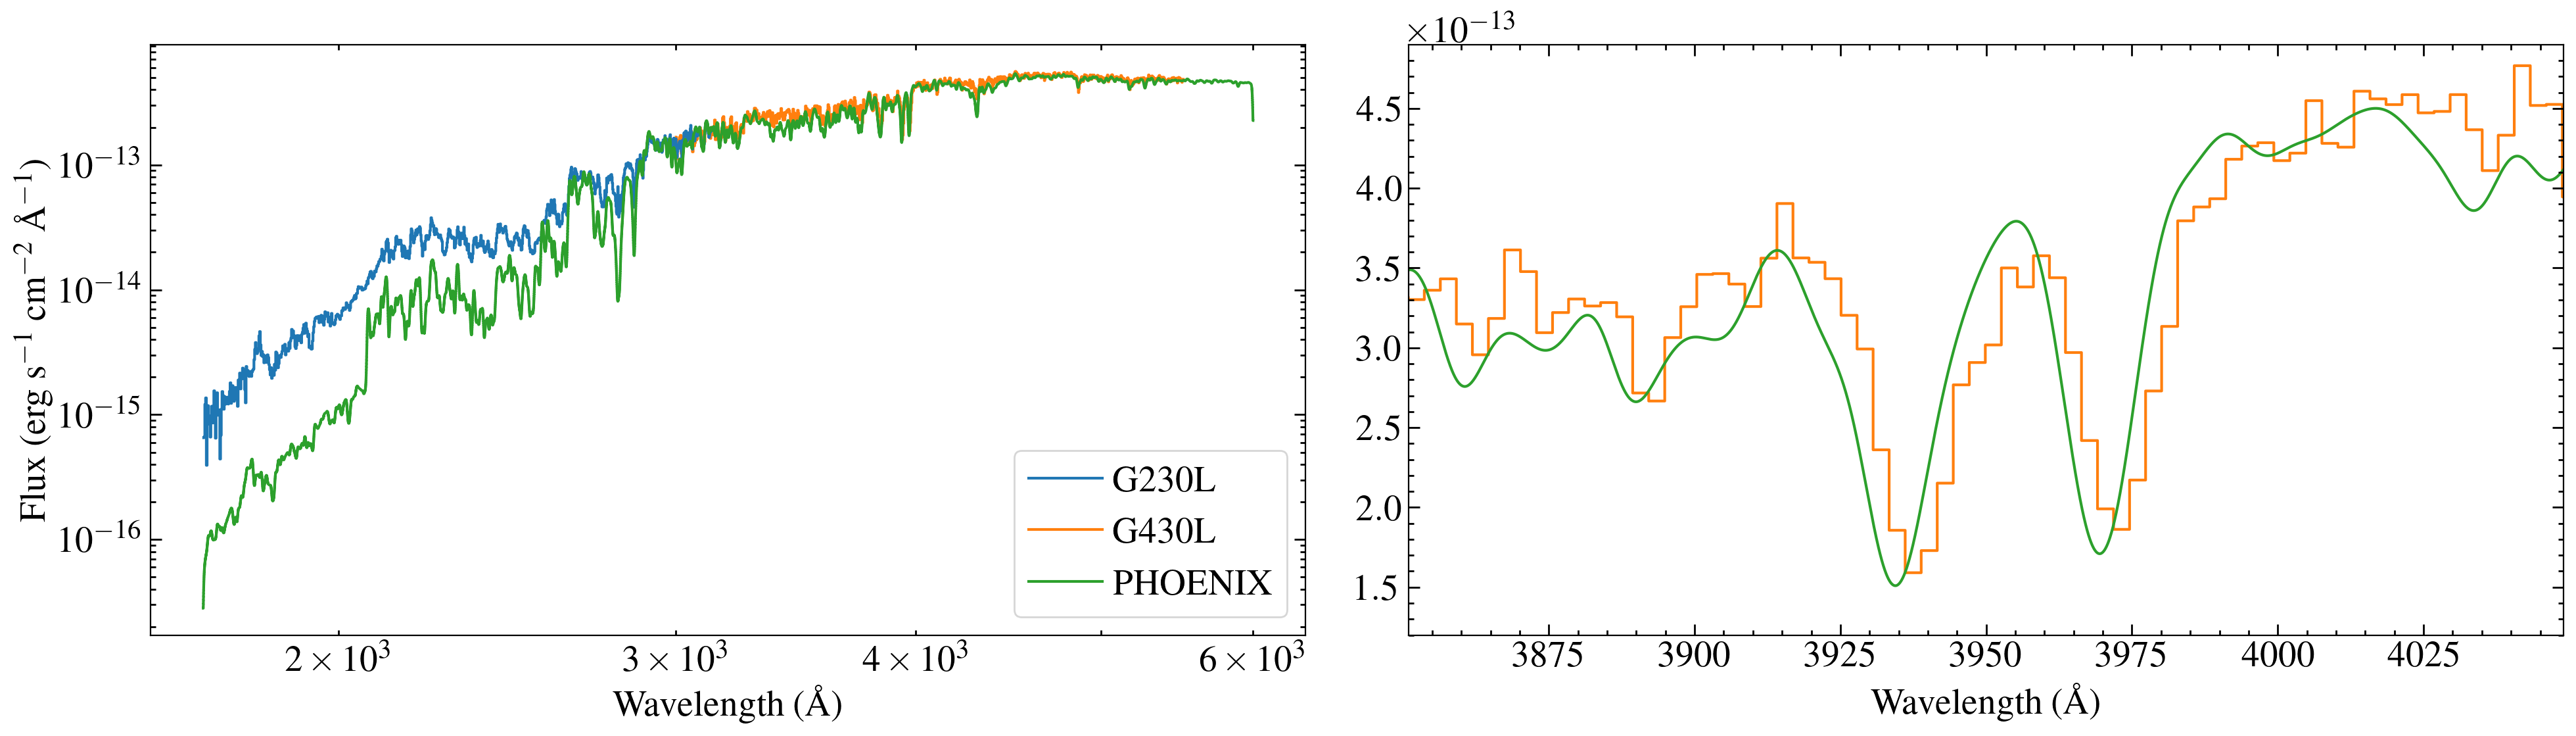

In [22]:
pmask = (pw > 1700) & (pw < 6000)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 1000)

plt.figure(figsize=(20, 6))
plt.subplot(121)

# plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2)
plt.step(pwi, pfi, where='mid', label='PHOENIX', zorder=1)

plt.yscale('log')
plt.xscale('log')

# plt.xlabel('Wavelength (\AA)')
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
# plt.title('HD 120411')
# plt.xlim(1130, 5600)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.subplot(122)

pmask = (pw > 2900) & (pw < 5600)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = smear(pwi, pfi, 1000)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2, c='C1')
plt.plot(pwi, pfi, label='PHOENIX', zorder=1, c='C2')
plt.xlabel('Wavelength (\AA)')
# plt.xlim(4800, 4950)
plt.xlim(3851, 4049)
# plt.ylim(3e-13, 6e-13)
plt.ylim(1.2e-13, 4.9e-13)
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

plt.tight_layout()

In [23]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

In [24]:
# pmask = (pw > 5500) & (pw < 2e5)
# pwi, pfi = pw[pmask], pf[pmask]*normfac
# pwi, pfi = smear(pwi, pfi, 1000)

# plt.figure(figsize=(14, 7))

# plt.step(w_fuv, f_fuv, where='mid', label='G140L')
# # plt.step(w_fuv, e_fuv, where='mid')
# plt.step(w_nuv, f_nuv, where='mid', label='G230L')#, zorder=-1)
# plt.step(w_opt, f_opt,  where='mid',label='G430L')#, zorder=-2)
# plt.step(pwi, pfi, where='mid', label='PHOENIX')#, zorder=-10)
# plt.plot(wx.value, fx.value, label='APEC (XRT)')
# mplcyberpunk.add_glow_effects()
# # mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5)
# plt.yscale('log')
# plt.xscale('log')

# plt.xlabel('Wavelength (\AA)')
# plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels[::-1], handles[::-1]))
# plt.legend(by_label.values(), by_label.keys(), frameon=True, loc=3)
# plt.title('HD 120411')
# plt.xlim(4, 1.1e5)
# plt.ylim(2e-17, 5e-12)
# plt.tight_layout()
# plt.savefig('plots/hd120411_cp.pdf')
# plt.savefig('plots/hd120411_cp.png', facecolor='w')

In [25]:
lcpath = '/media/david/2tb_ext_hd/hddata/meats/chandra/hd120411/24675/working/test_100s_lc.fits'
lc = fits.getdata(lcpath, 1)
lc.names

['TIME_BIN',
 'TIME_MIN',
 'TIME',
 'TIME_MAX',
 'COUNTS',
 'STAT_ERR',
 'AREA',
 'EXPOSURE',
 'COUNT_RATE',
 'COUNT_RATE_ERR',
 'BG_COUNTS',
 'BG_ERR',
 'BG_AREA',
 'BG_EXPOSURE',
 'BG_RATE',
 'NORM_BG_COUNTS',
 'NORM_BG_ERR',
 'NET_COUNTS',
 'NET_ERR',
 'NET_RATE',
 'ERR_RATE']

<ErrorbarContainer object of 3 artists>

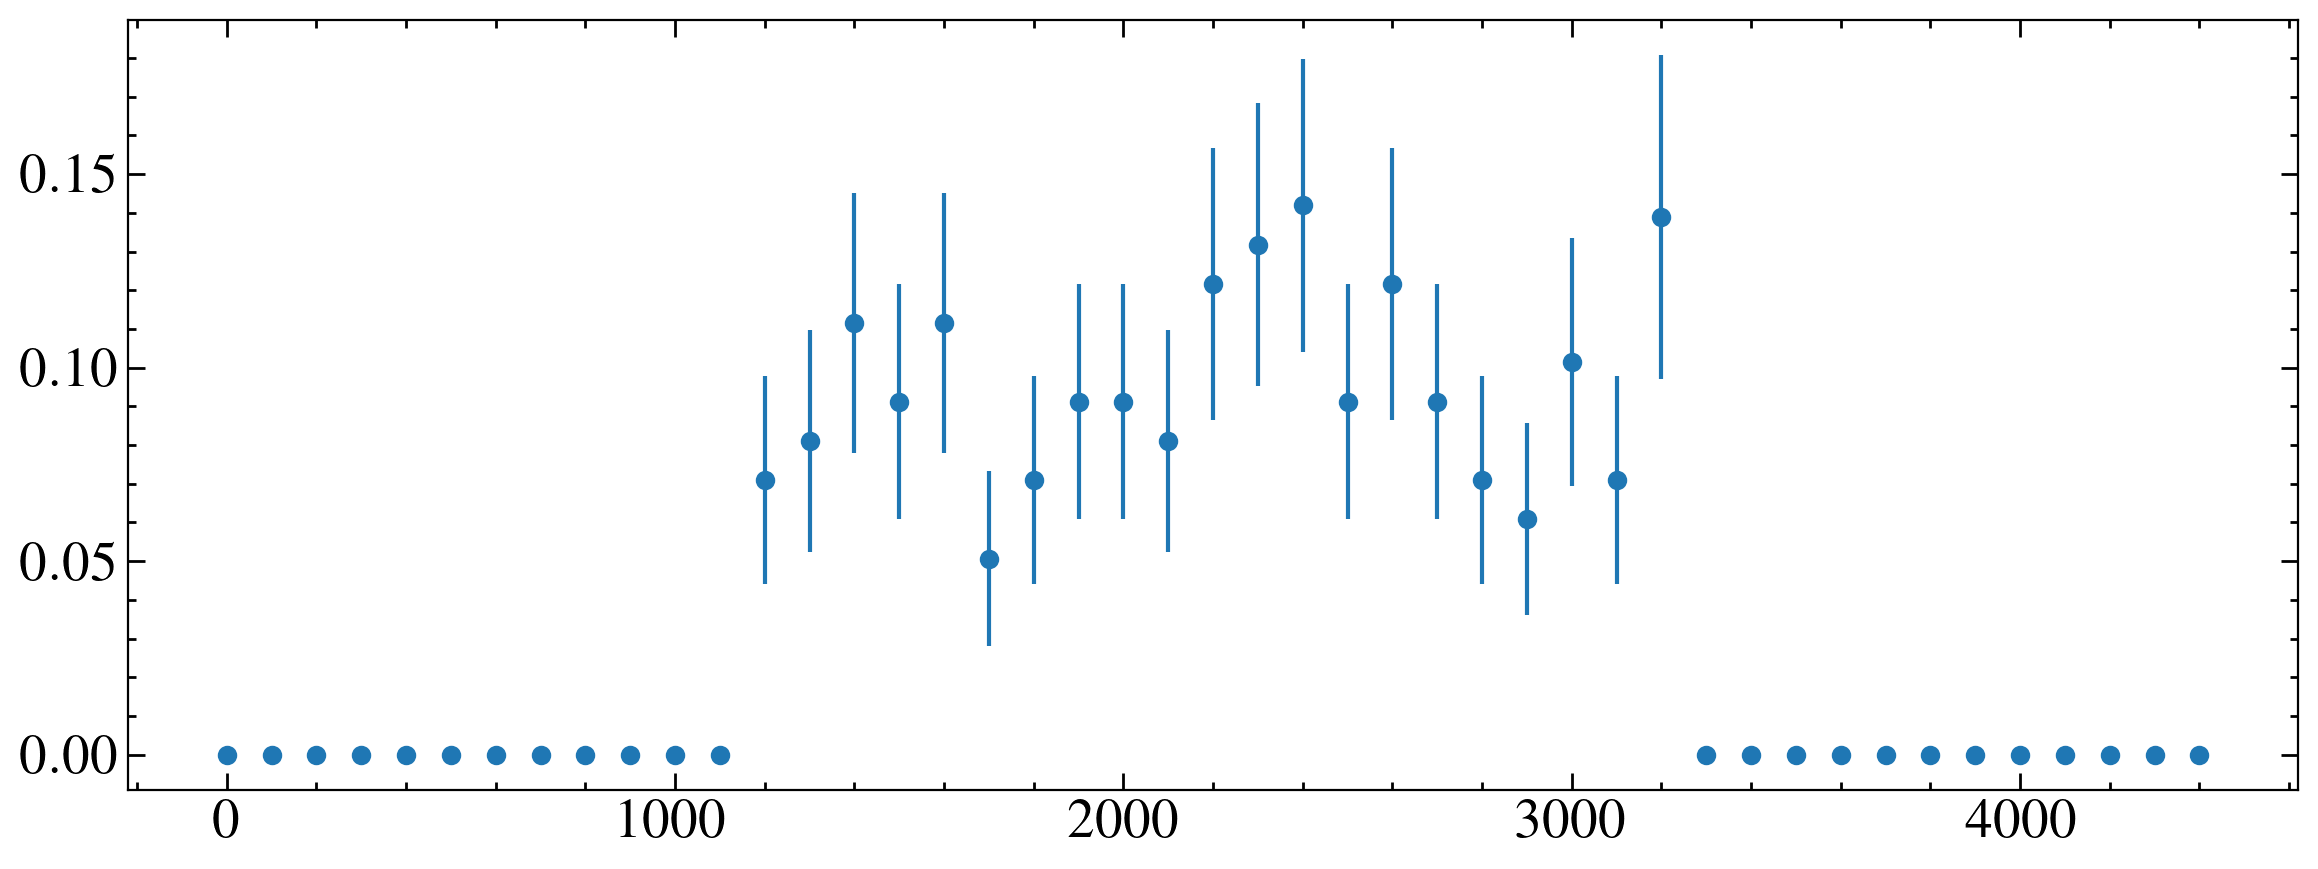

In [26]:
plt.errorbar(lc['TIME']-lc['TIME'][0], lc['COUNT_RATE'], yerr=lc['COUNT_RATE_ERR'], marker='o', ls='none')

In [27]:
print(np.mean(lc['COUNT_RATE'][lc['COUNT_RATE'] > 0]))

0.0949512709131027


TESS?

In [28]:
import lightkurve as lk


In [29]:
search_result = lk.search_lightcurve('TIC 166527623')
search_result

SearchResult containing 9 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 11 2019      SPOC     120   166527623      0.0
  1 TESS Sector 11 2019 TESS-SPOC    1800   166527623      0.0
  2 TESS Sector 11 2019       QLP    1800   166527623      0.0
  3 TESS Sector 38 2021      SPOC     120   166527623      0.0
  4 TESS Sector 38 2021 TESS-SPOC     600   166527623      0.0
  5 TESS Sector 38 2021       QLP     600   166527623      0.0
  6 TESS Sector 64 2023      SPOC      20   166527623      0.0
  7 TESS Sector 64 2023      SPOC     120   166527623      0.0
  8 TESS Sector 64 2023       QLP     200   166527623      0.0

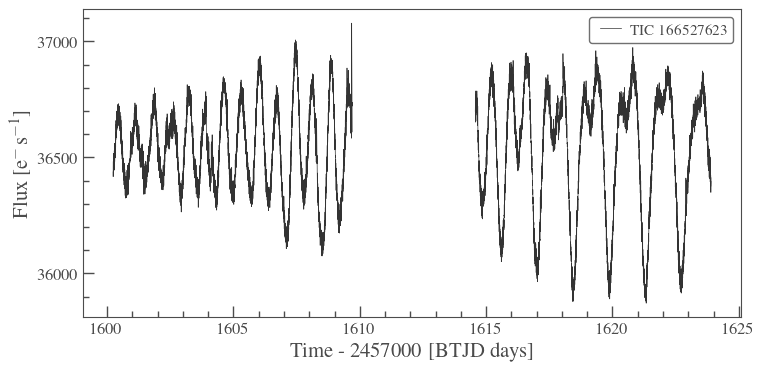

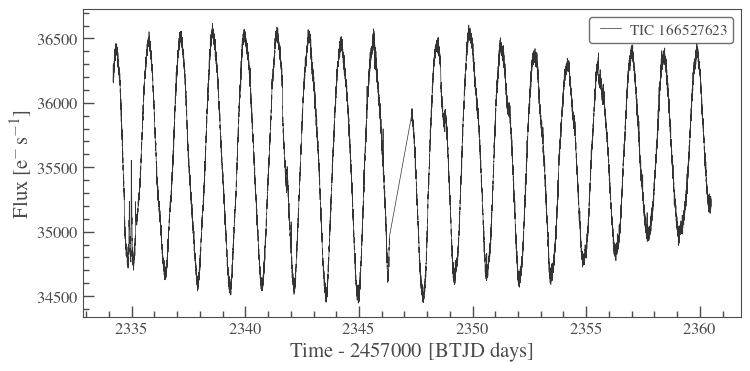

In [30]:
for sr in [search_result[0], search_result[3]]:
    lc = sr.download(download_dir='mastDownload/')
    lc.plot()

cool. Only a few flares though, compare rate with UV?

0.7085028077139967 d
1.415925355006897 d


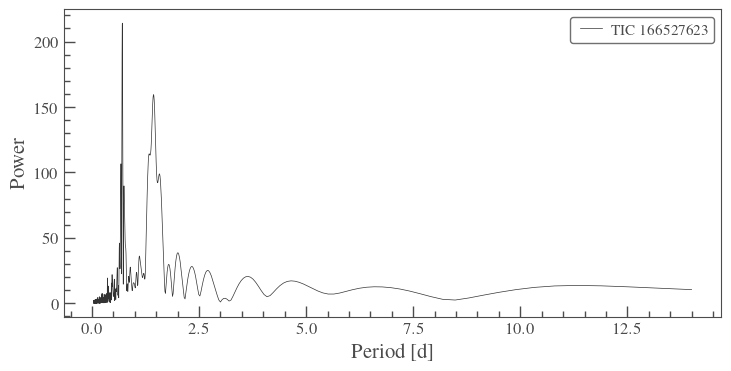

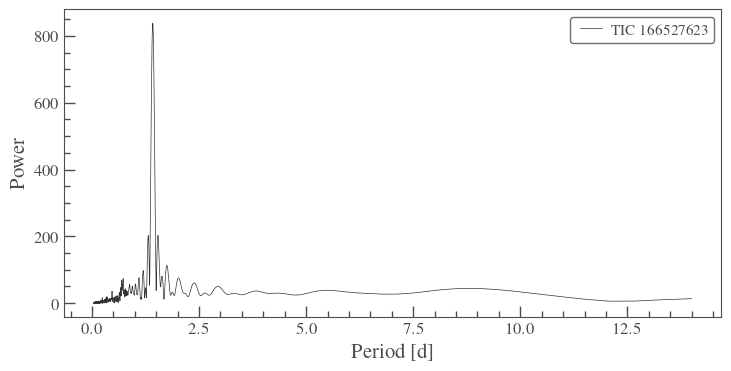

In [31]:
for sr in [search_result[0], search_result[3]]:
    lc = sr.download(download_dir='mastDownload/')
    # lc.plot()
    lc.flux = lc.flux.value #something up with lk that means I need to do this
    lc.flux_err = lc.flux_err.value
    lcn=lc.normalize()
    pg = lc.to_periodogram(oversample_factor=10,minimum_period=1*u.hour, maximum_period=14*u.day)
    print(pg.period_at_max_power)

    pg.plot()
    
    

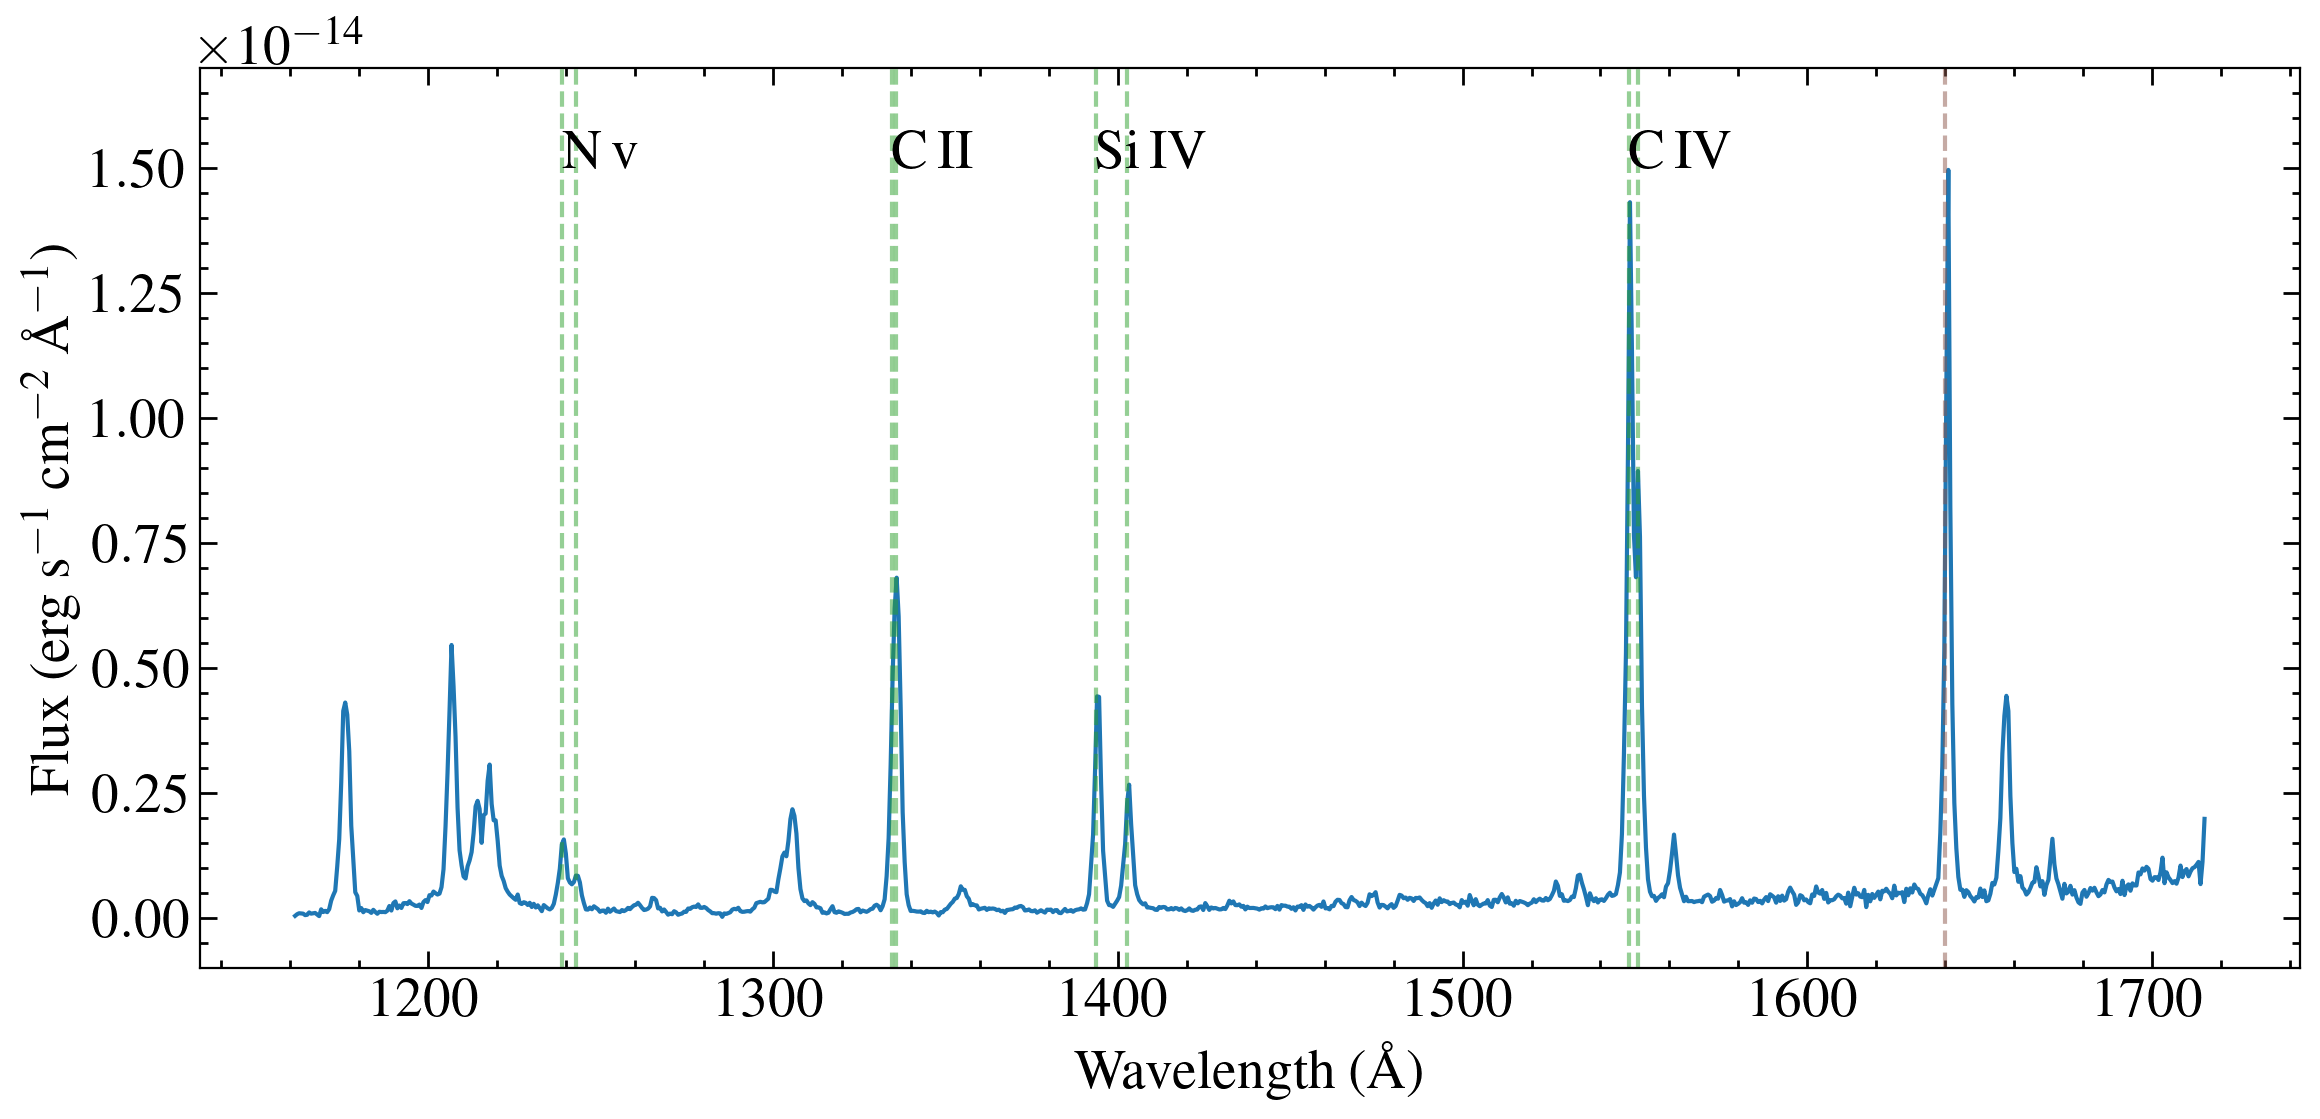

In [32]:
doublets = np.array([[1238.821, 1242.804],[1334.524,1335.709],[1393.755,1402.77],[1548.201,1550.772]])
all_lines = doublets.flatten()
names = ['N\,v', 'C\,II', 'Si\,IV', 'C\,IV']


plt.figure(figsize = (12, 6))
plt.plot(w_fuv, f_fuv)

[plt.axvline(line, ls='--', c='C2', alpha=0.5) for line in all_lines]
[plt.annotate(name, (line, 1.5e-14)) for name, line in zip(names, all_lines[::2])]


plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.ylim(-0.1e-14, 1.7e-14)

plt.tight_layout()
plt.savefig('plots/lines_eg.png', facecolor='w')

plt.axvline(1640, c = 'C5', ls='--', alpha=0.5)


Girish has send a line list, how do they look?

In [33]:
demlines = Table.read('DEM_linelist .csv')
demlines.dtype.names

('Ion', 'Wavelength', 'Likelihood to measure', 'Log Formation Temperature')

(1160.0, 1710.0)

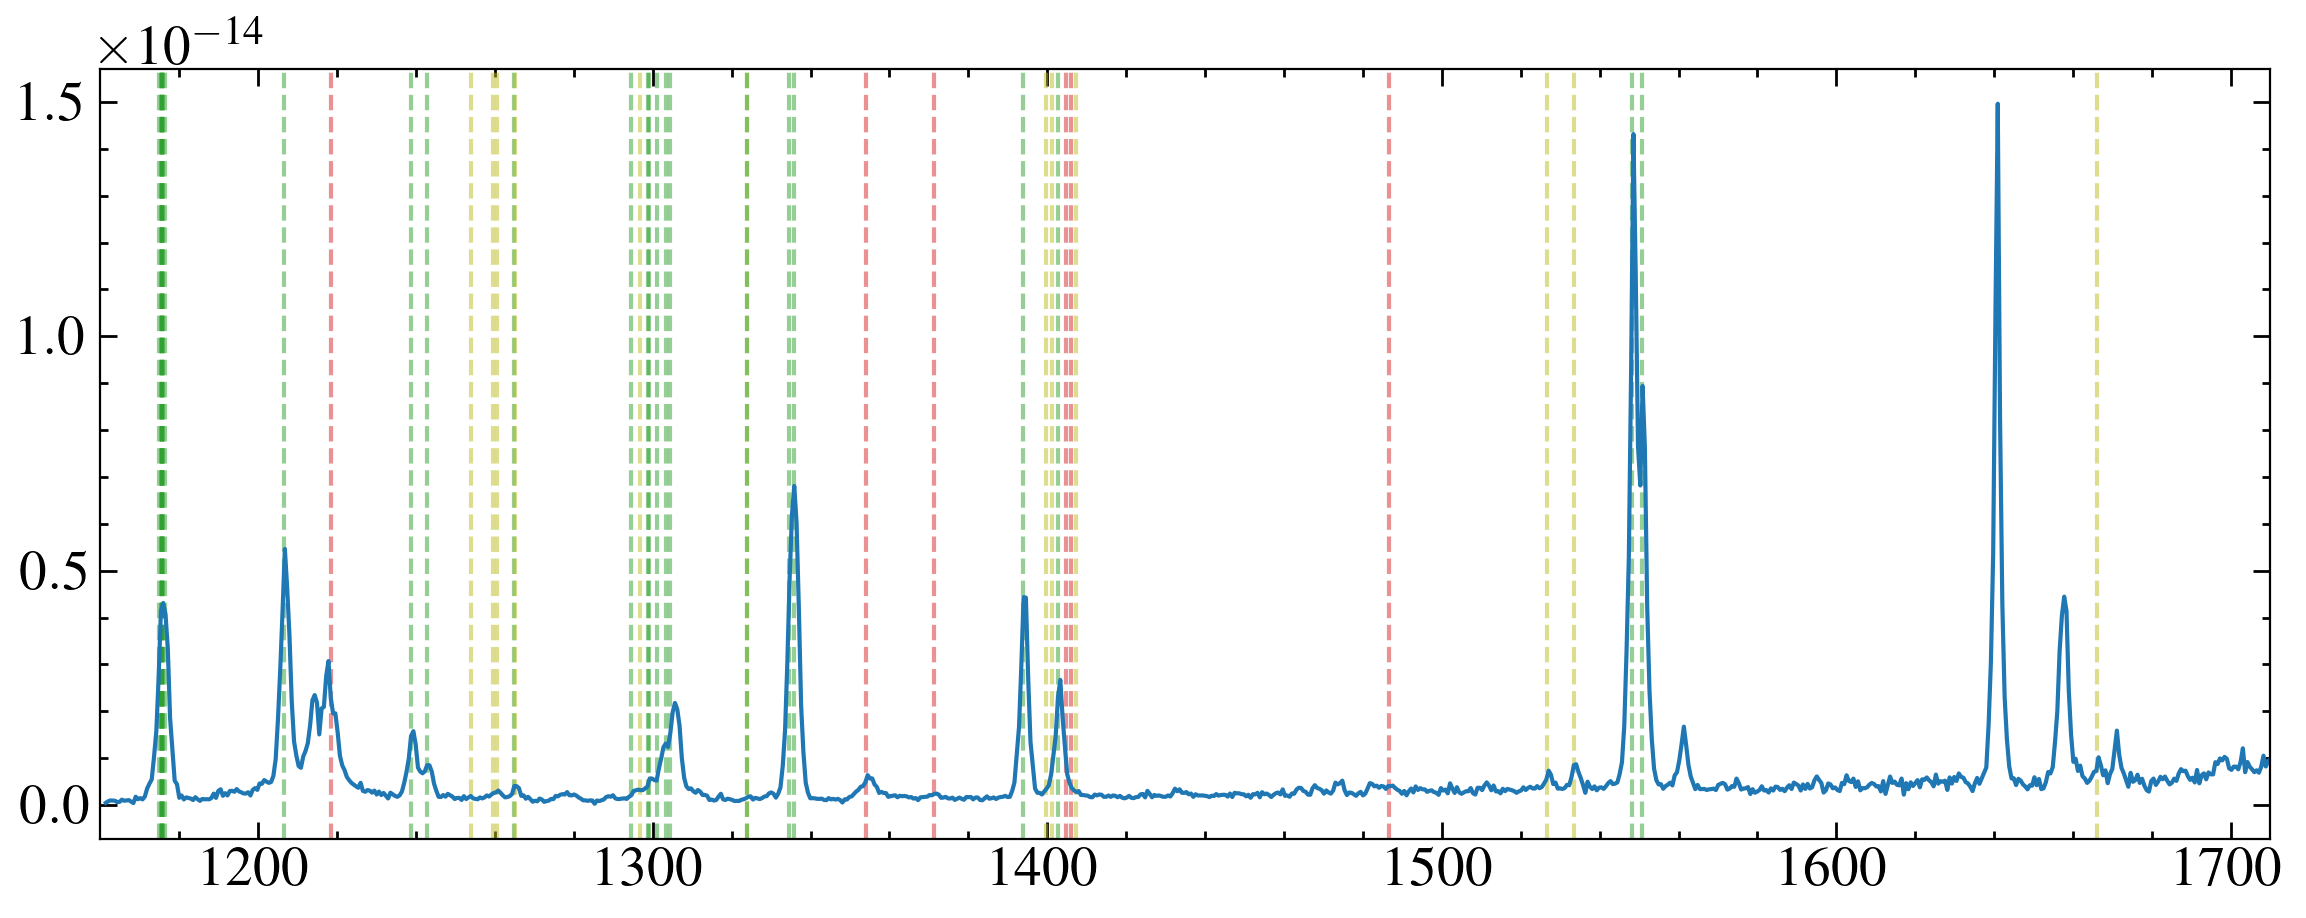

In [34]:
for i, line in enumerate(demlines['Wavelength']):
    c= 'C2'
    if demlines['Likelihood to measure'][i] == 'Medium':
        c = 'C8'
    if demlines['Likelihood to measure'][i] == 'Low':
        c = 'C3'
    plt.axvline(line, c = c, ls='--', alpha=0.5)
    
plt.plot(w_fuv, f_fuv)
plt.xlim(1160, 1710)

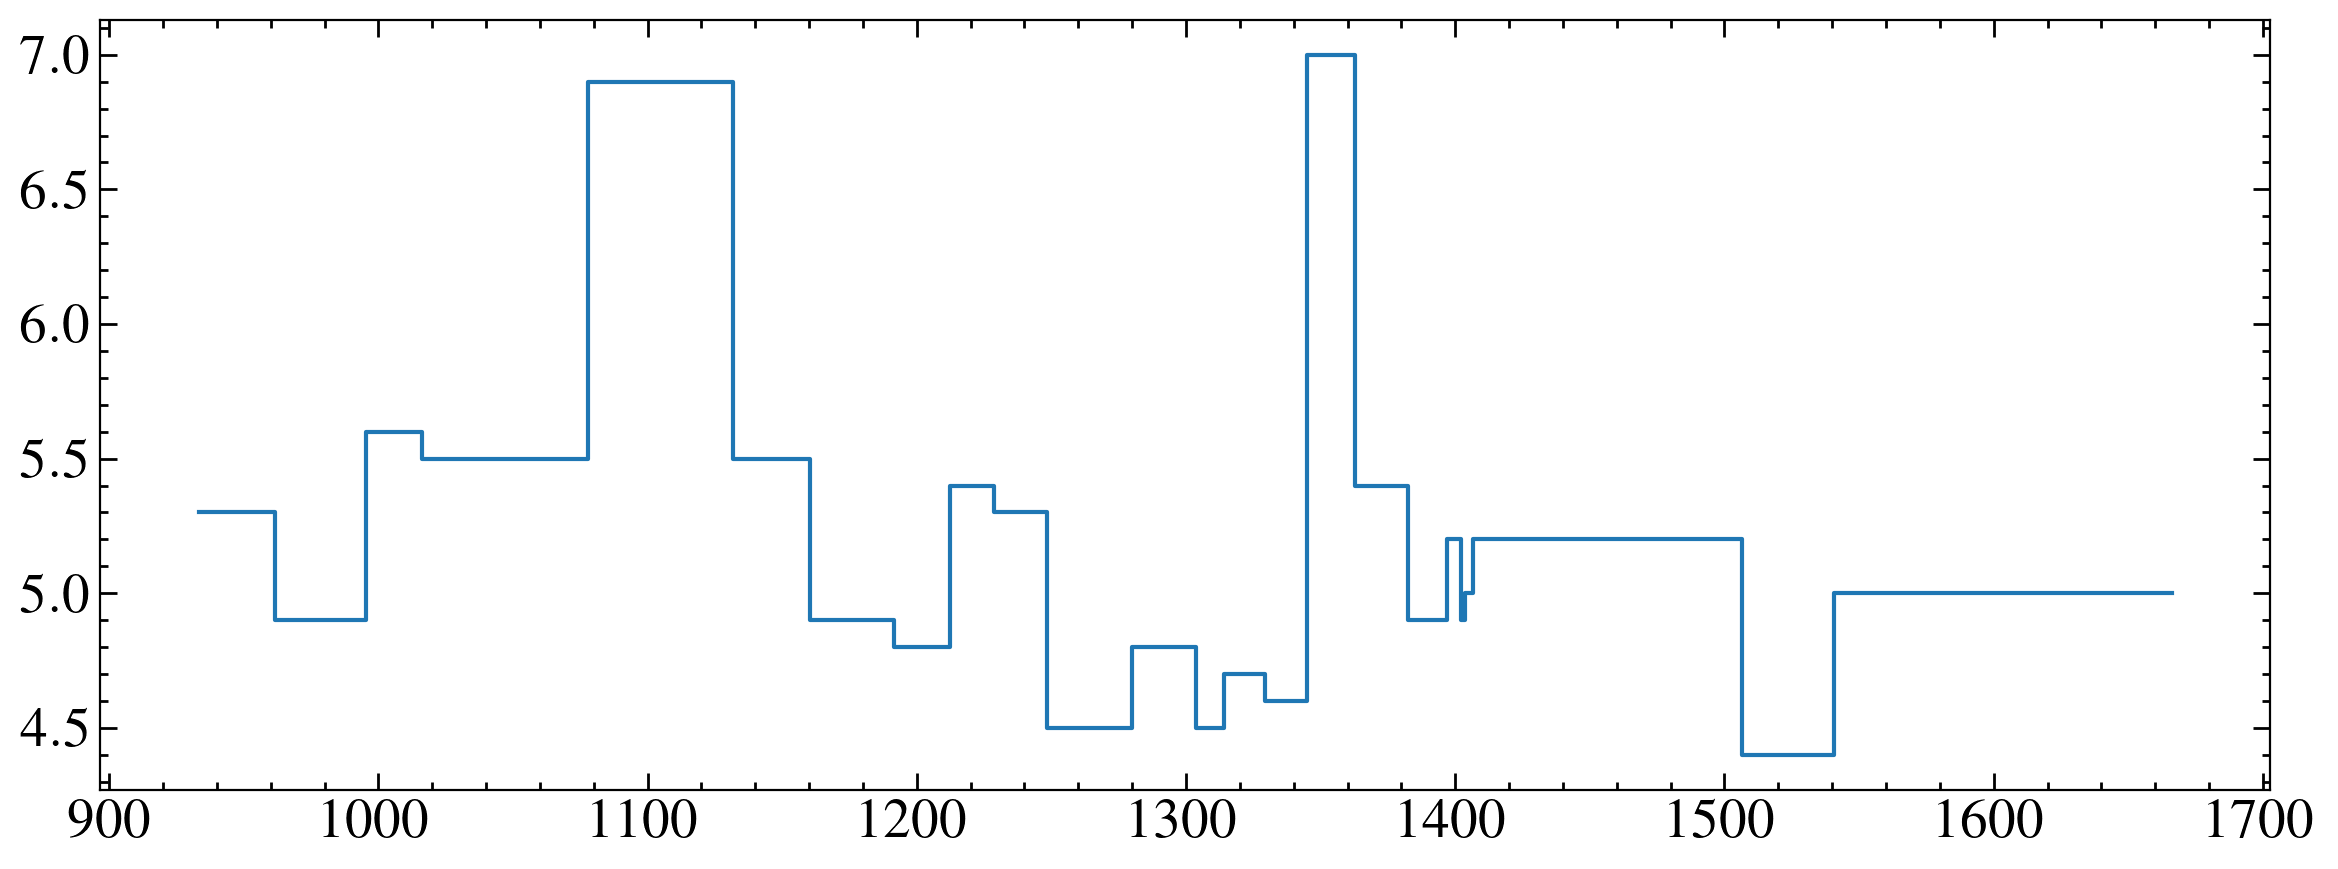

In [35]:
plt.step(demlines['Wavelength'], demlines['Log Formation Temperature'], where='mid')

In [36]:
import importlib
import prepare_stis
importlib.reload(prepare_stis)

<module 'prepare_stis' from '/home/david/work/meats/SEDs/prepare_stis.py'>

In [37]:
# savepath = 'draft_hlsp/hd120411/'
# hlsp = 'meats_hlsp_info.csv'
# version = 2
# prepare_stis.make_stis_spectrum(path, version, hlsp, savepath=savepath, plot=True, save_ecsv=False, save_fits=True, star='HD-120411')

In [38]:
# newdat = fits.getdata('draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g140l_v1_component-spec.fits', 1)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Gaussian1D(amplitude=0., mean=1239.16205649, stddev=1.08416072)>

    [1]: <Gaussian1D(amplitude=0., mean=1242.99486511, stddev=1.11864147)>

    [2]: <Const1D(amplitude=0.)>
Parameters:
         amplitude_0             mean_0       ...      amplitude_2      
    ---------------------- ------------------ ... ----------------------
    1.3199018019877529e-15 1239.1620564910902 ... 2.2249009534030836e-16
[82.53505856 46.04098631] km / s
64.28802243430953 km / s
Voigt
85.97613615024 km / s 17.125226921986993
5.078532281185874e-15


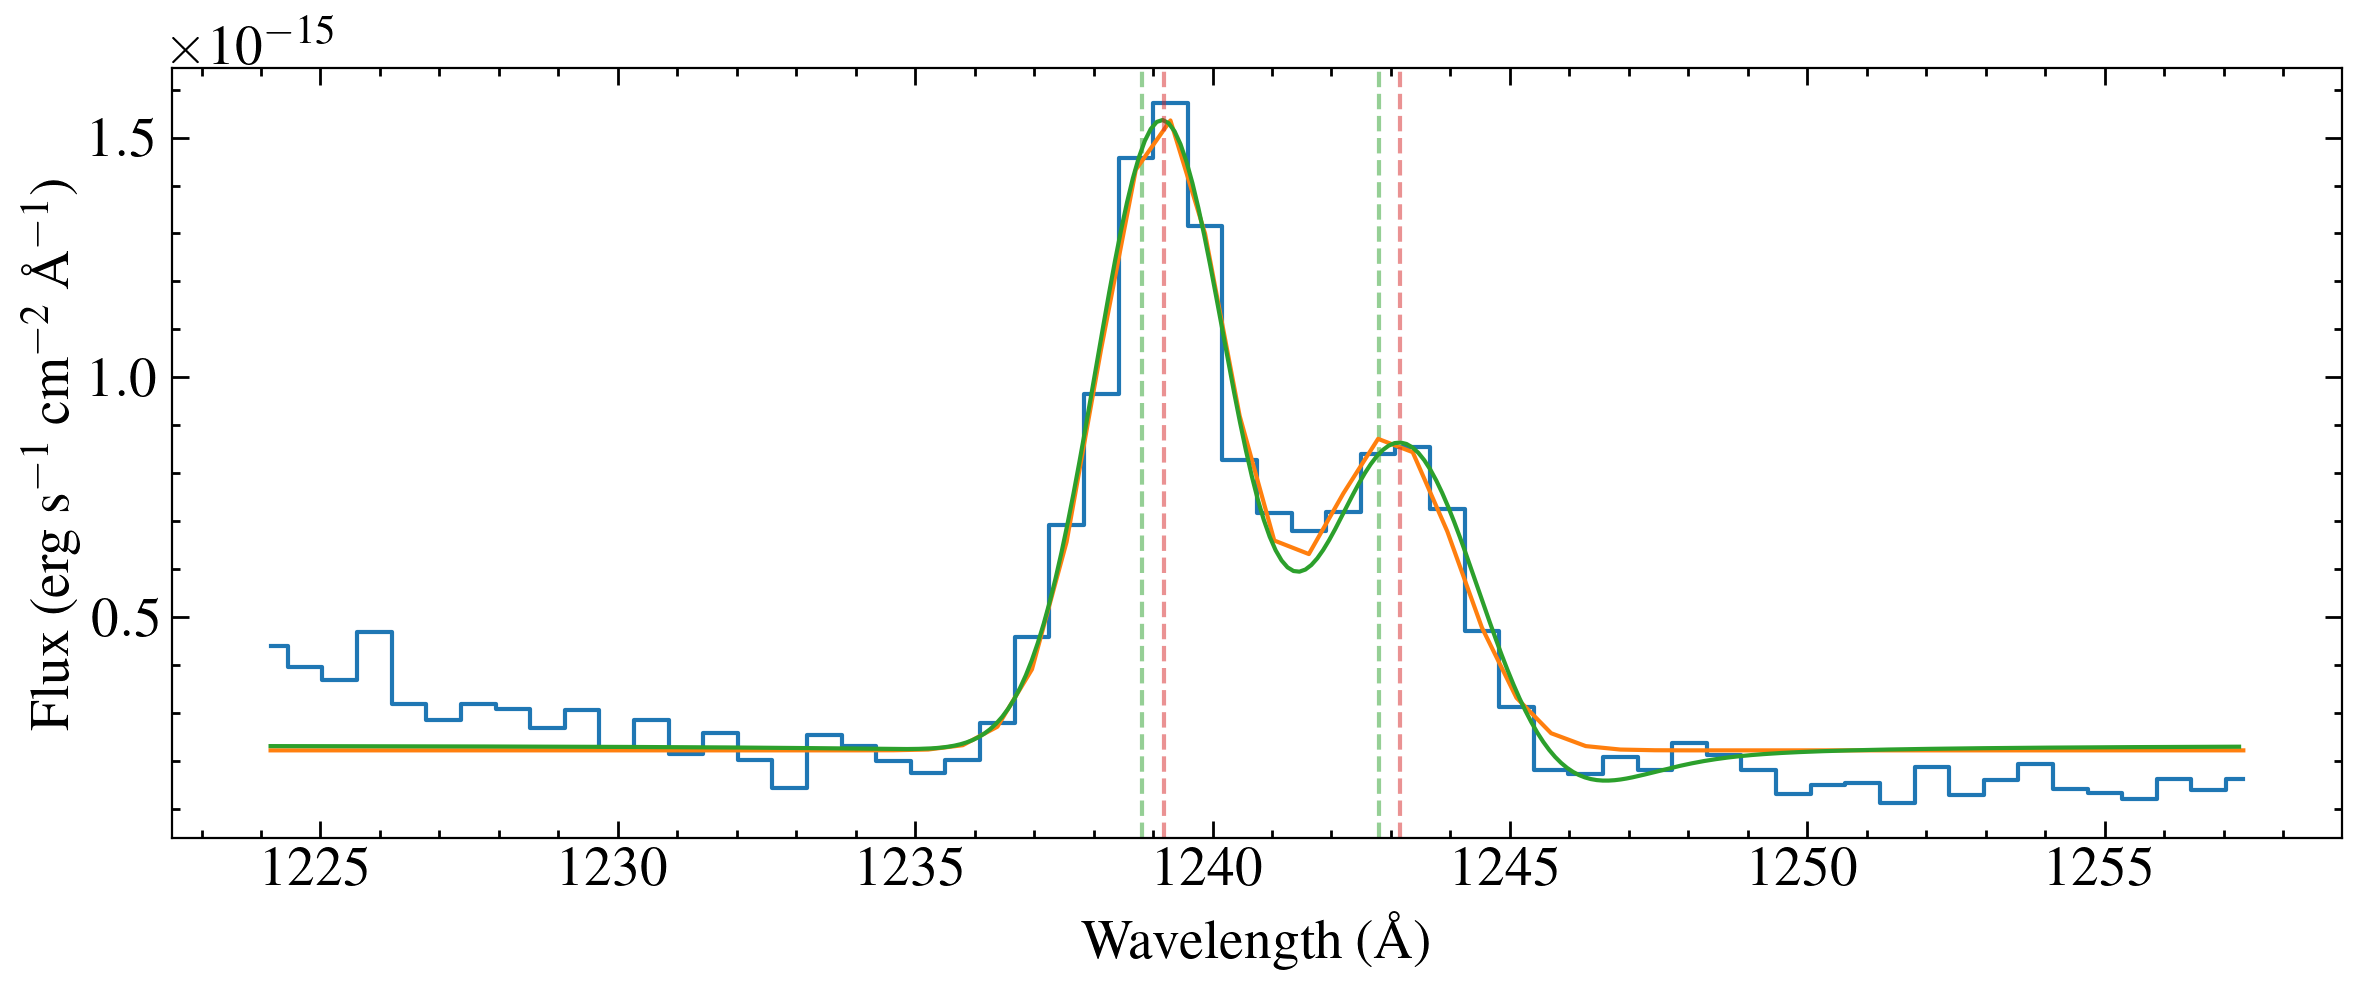

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Gaussian1D(amplitude=0., mean=1334.78307001, stddev=1.11387931)>

    [1]: <Gaussian1D(amplitude=0., mean=1336.08266975, stddev=1.09839969)>

    [2]: <Const1D(amplitude=0.)>
Parameters:
         amplitude_0             mean_0       ...      amplitude_2     
    ---------------------- ------------------ ... ---------------------
    2.1966964751468987e-15 1334.7830700086201 ... 1.460017446295025e-16
[58.19845479 83.86809685] km / s
71.03327581891054 km / s
Voigt
10.786231403192126 km / s 6.8735871875748815
2.1399808556370033e-14


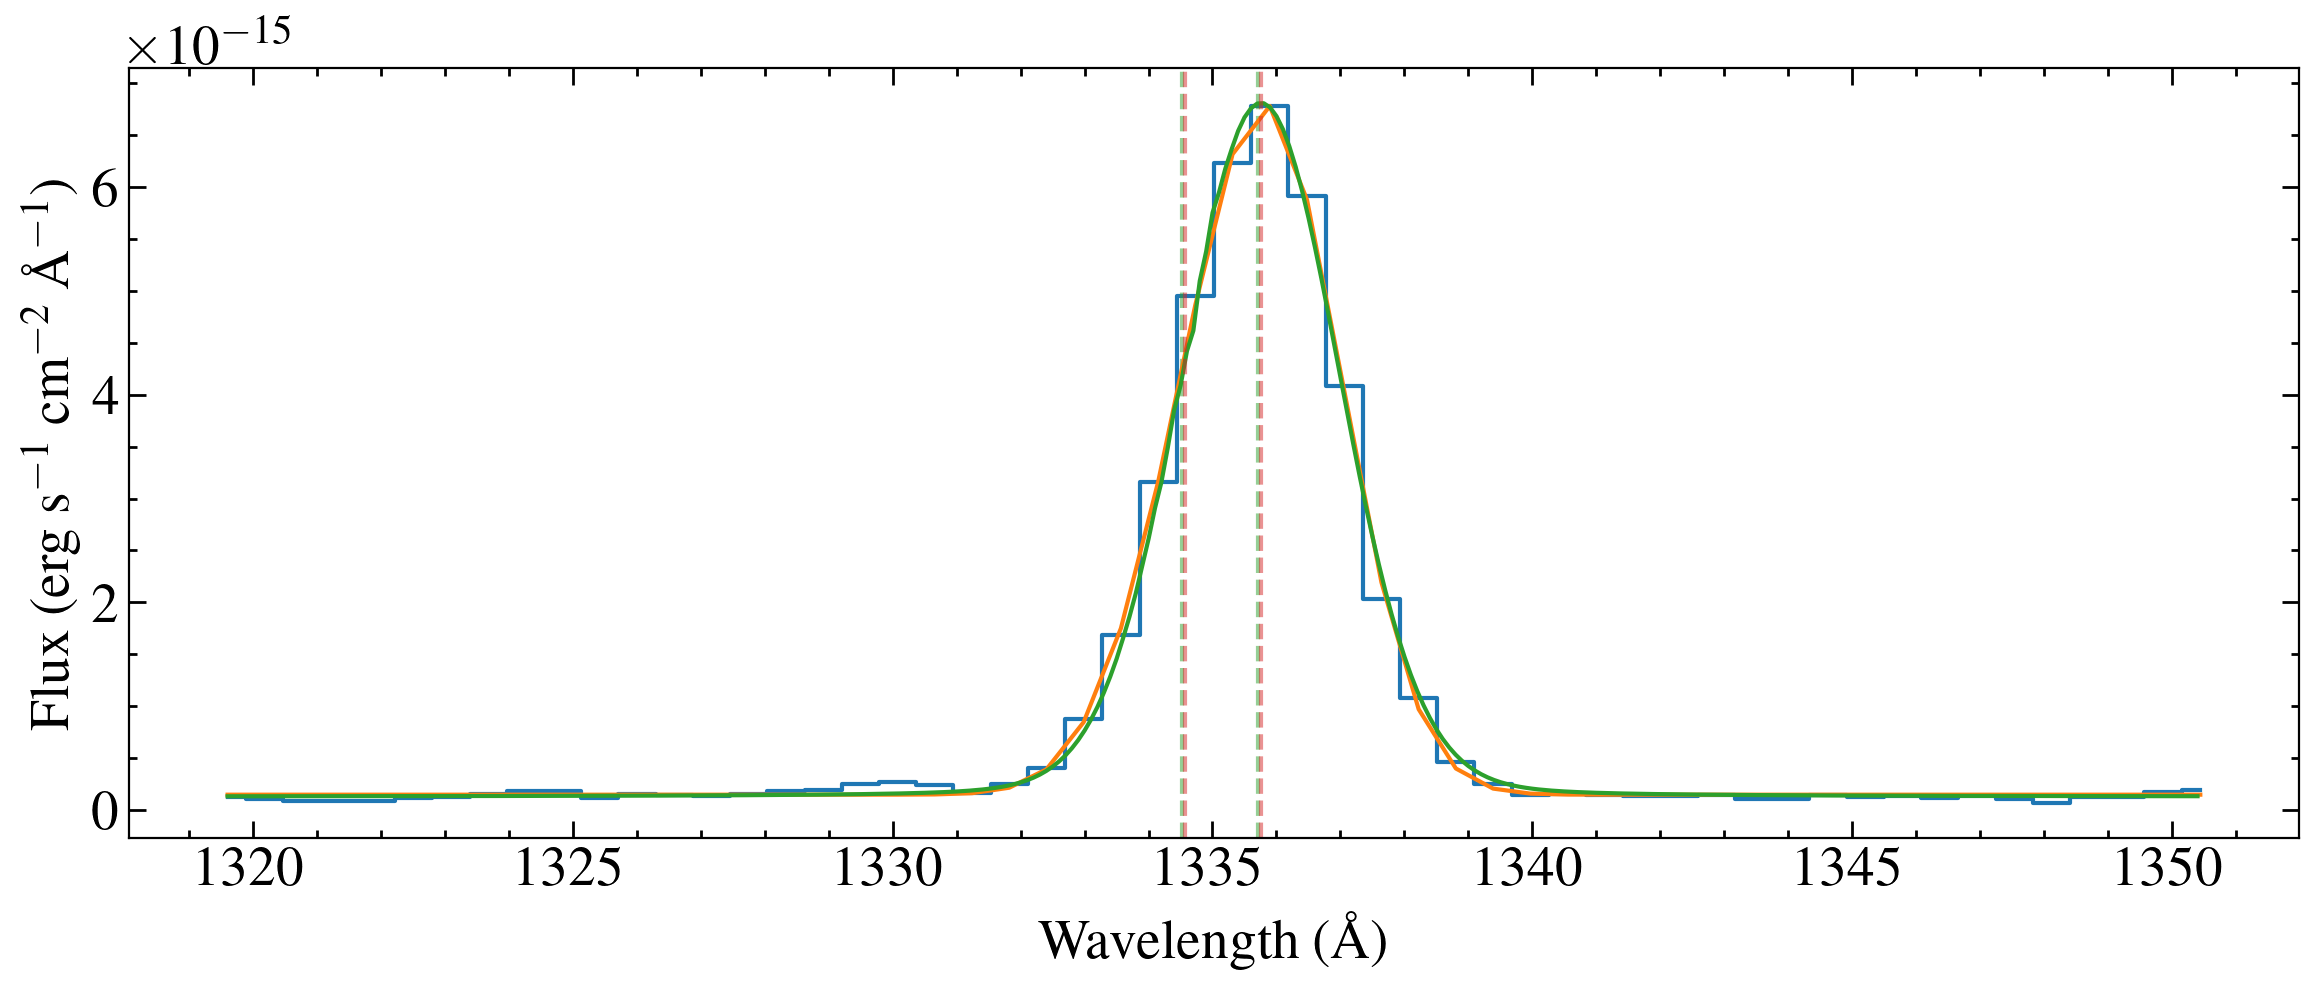

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Gaussian1D(amplitude=0., mean=1394.22847537, stddev=0.99485589)>

    [1]: <Gaussian1D(amplitude=0., mean=1403.1296775, stddev=1.12755228)>

    [2]: <Const1D(amplitude=0.)>
Parameters:
         amplitude_0             mean_0       ...      amplitude_2      
    ---------------------- ------------------ ... ----------------------
    4.1817611327020814e-15 1394.2284753720392 ... 2.1036140407401202e-16
[101.8431113   76.86834028] km / s
89.35572578913963 km / s
Voigt
96.98613360658858 km / s 3.820003198236911
1.6667452166745705e-14


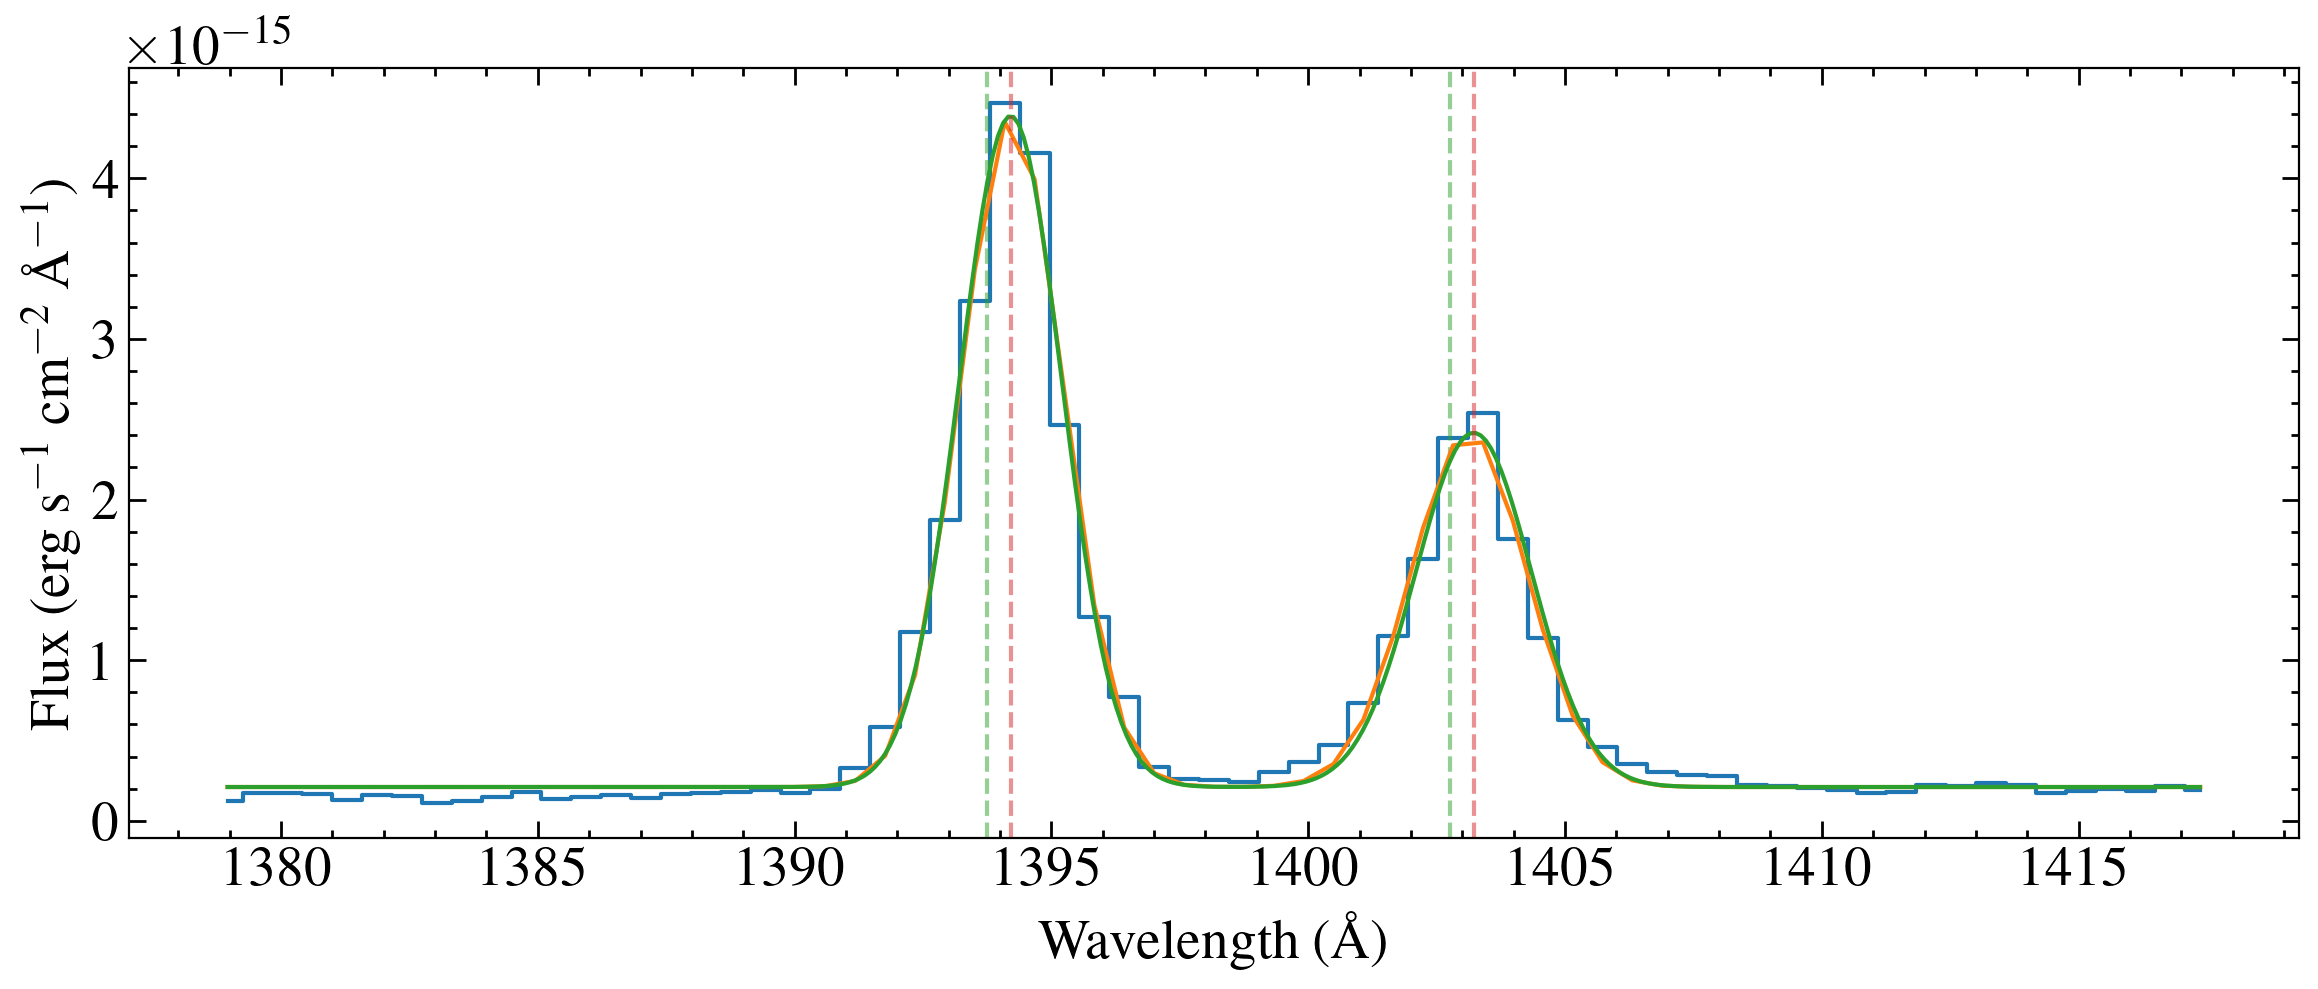

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Gaussian1D(amplitude=0., mean=1548.61090926, stddev=0.94277249)>

    [1]: <Gaussian1D(amplitude=0., mean=1551.15504419, stddev=0.83356924)>

    [2]: <Const1D(amplitude=0.)>
Parameters:
         amplitude_0             mean_0      ...      amplitude_2     
    ---------------------- ----------------- ... ---------------------
    1.2011759226789528e-14 1548.610909259889 ... 6.176476173065422e-16
[79.3745157  74.04941417] km / s
76.71196493668319 km / s
Voigt
78.51207575508533 km / s 7.285784767666911
4.548353538825991e-14


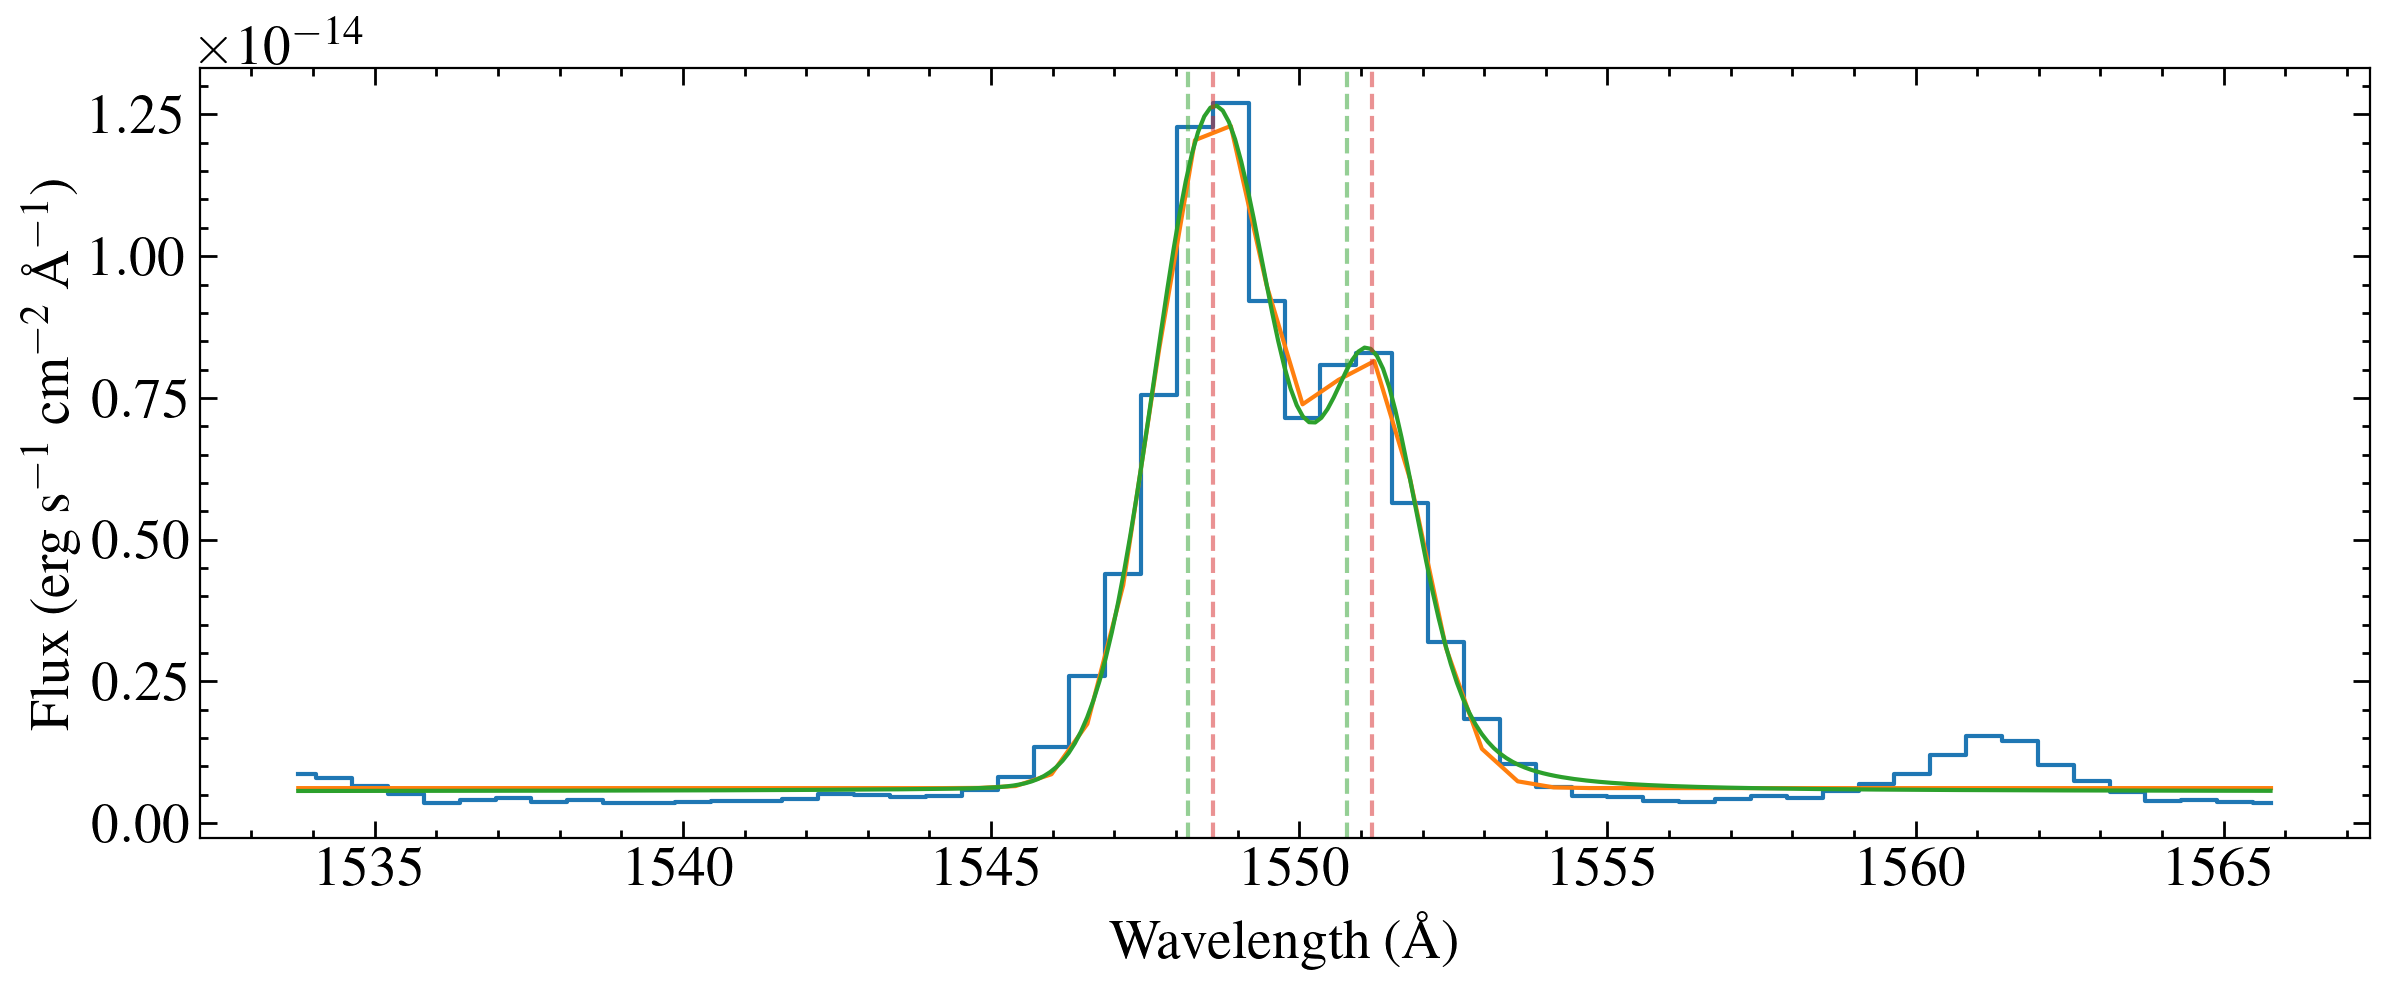

In [39]:
# import astropy.io.fits as fits
# import matplotlib.pyplot as plt
fitter = fitting.LevMarLSQFitter()

def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) 
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) 
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1


# lines = [1548.201,1550.772]
space = 15

doublets = np.array([[1238.821, 1242.804],[1334.524,1335.709],[1393.755,1402.77],[1548.201,1550.772]])

amps = []
widths = [] 
dvs = []


data = fits.getdata('draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g140l_v1_component-spec.fits', 1)
w1, f1 , e1 = data['WAVELENGTH'], data['FLUX'], data['ERROR']

for lines in doublets:

    mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
    w, f, e = w1[mask], f1[mask], e1[mask]
    plt.step(w, f, where='mid')
    plt.xlabel('Wavelength (\AA)')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


    [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

    gg_init = models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)+models.Const1D(0)
    v_init = models.Voigt1D(x_0=lines[0], amplitude_L=2e-13, fwhm_L=0.5, fwhm_G=0.5)+ \
    models.Voigt1D(x_0=lines[1], amplitude_L=2e-13, fwhm_L=0.5, fwhm_G=0.5)+models.Const1D(0)#, fixed = dict(amplitude=True))

    def tiedfunc1(mod):
            x_0 = mod.x_0_0.value+np.diff(lines)
            # fwhm_G = mod.fwhm_G_1.value
            return x_0

    v_init.x_0_1.tied=tiedfunc1

    gg_fit = fitter(gg_init, w, f, maxiter=100000)
    v_fit = fitter(v_init, w, f, maxiter=100000)
    v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
    print(gg_fit)
#     print(v_fit)
    # print(v_fit_e)

    # print('Gaussian')
    obs_lam = np.array([gg_fit[0].mean.value, gg_fit[1].mean.value])
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
    print(dv)
    print(np.mean(dv))


    print('Voigt')
    # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
    # print(np.diff(obs_lam), np.diff(lines))
    obs_lam = v_fit[0].x_0.value
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

    dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[0])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                    abs(dv.value -((obs_lam-v_fit_e[0])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

    print(dv, dv_e)


    # print(np.mean(dv))

    plt.plot(w, gg_fit(w))
    w_plot = np.arange(w[0], w[-1],0.1)
    plt.plot(w_plot, v_fit(w_plot))    

    line_width = 3
    for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)
        
    linef = np.trapz(v_fit(w_plot), w_plot)
    contf = np.trapz(v_fit[2](w_plot), w_plot)
    print(linef-contf)




    plt.show()

# print(v_fit)

Is 1334.524 absprbed in the COS data? COS observation had guide star issues, shutter closed for most of it. lesw01iwq_x1d.fits is the only good one.

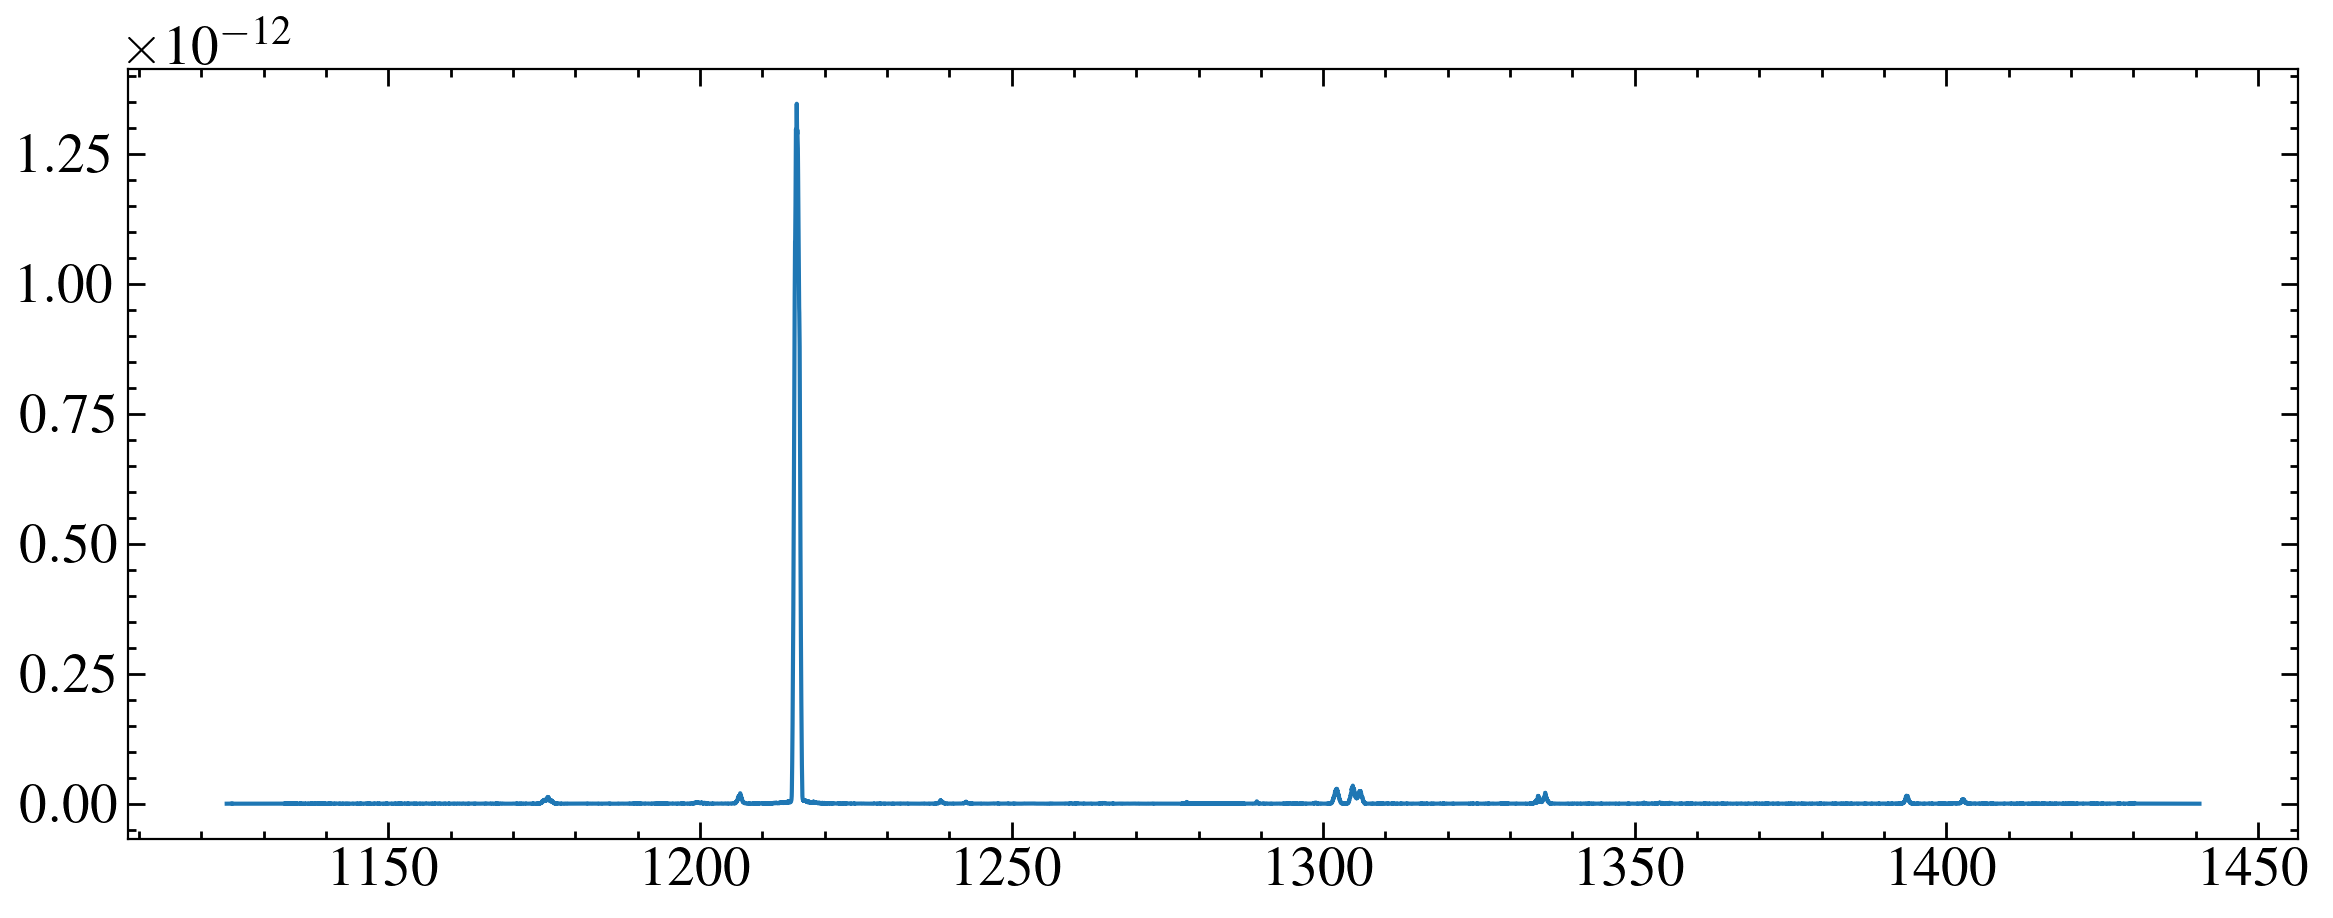

In [40]:
cospath = '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/cos/'
cosx1d = 'lesw01iwq_x1d.fits'
cosdata = fits.getdata(cospath+cosx1d, 1)
wc, fc, ec = np.hstack(cosdata['WAVELENGTH'][::-1]), np.hstack(cosdata['FLUX'][::-1]), np.hstack(cosdata['ERROR'][::-1])
smooth = 5
fc = convolve(fc,Box1DKernel(smooth))
ec = convolve(ec,Box1DKernel(smooth))/(smooth**0.5)
plt.plot(wc, fc)
# plt.ylim(-1e-15, 1e-15)

Voigt
-34.24480238988581 km / s 0.39006370797480727


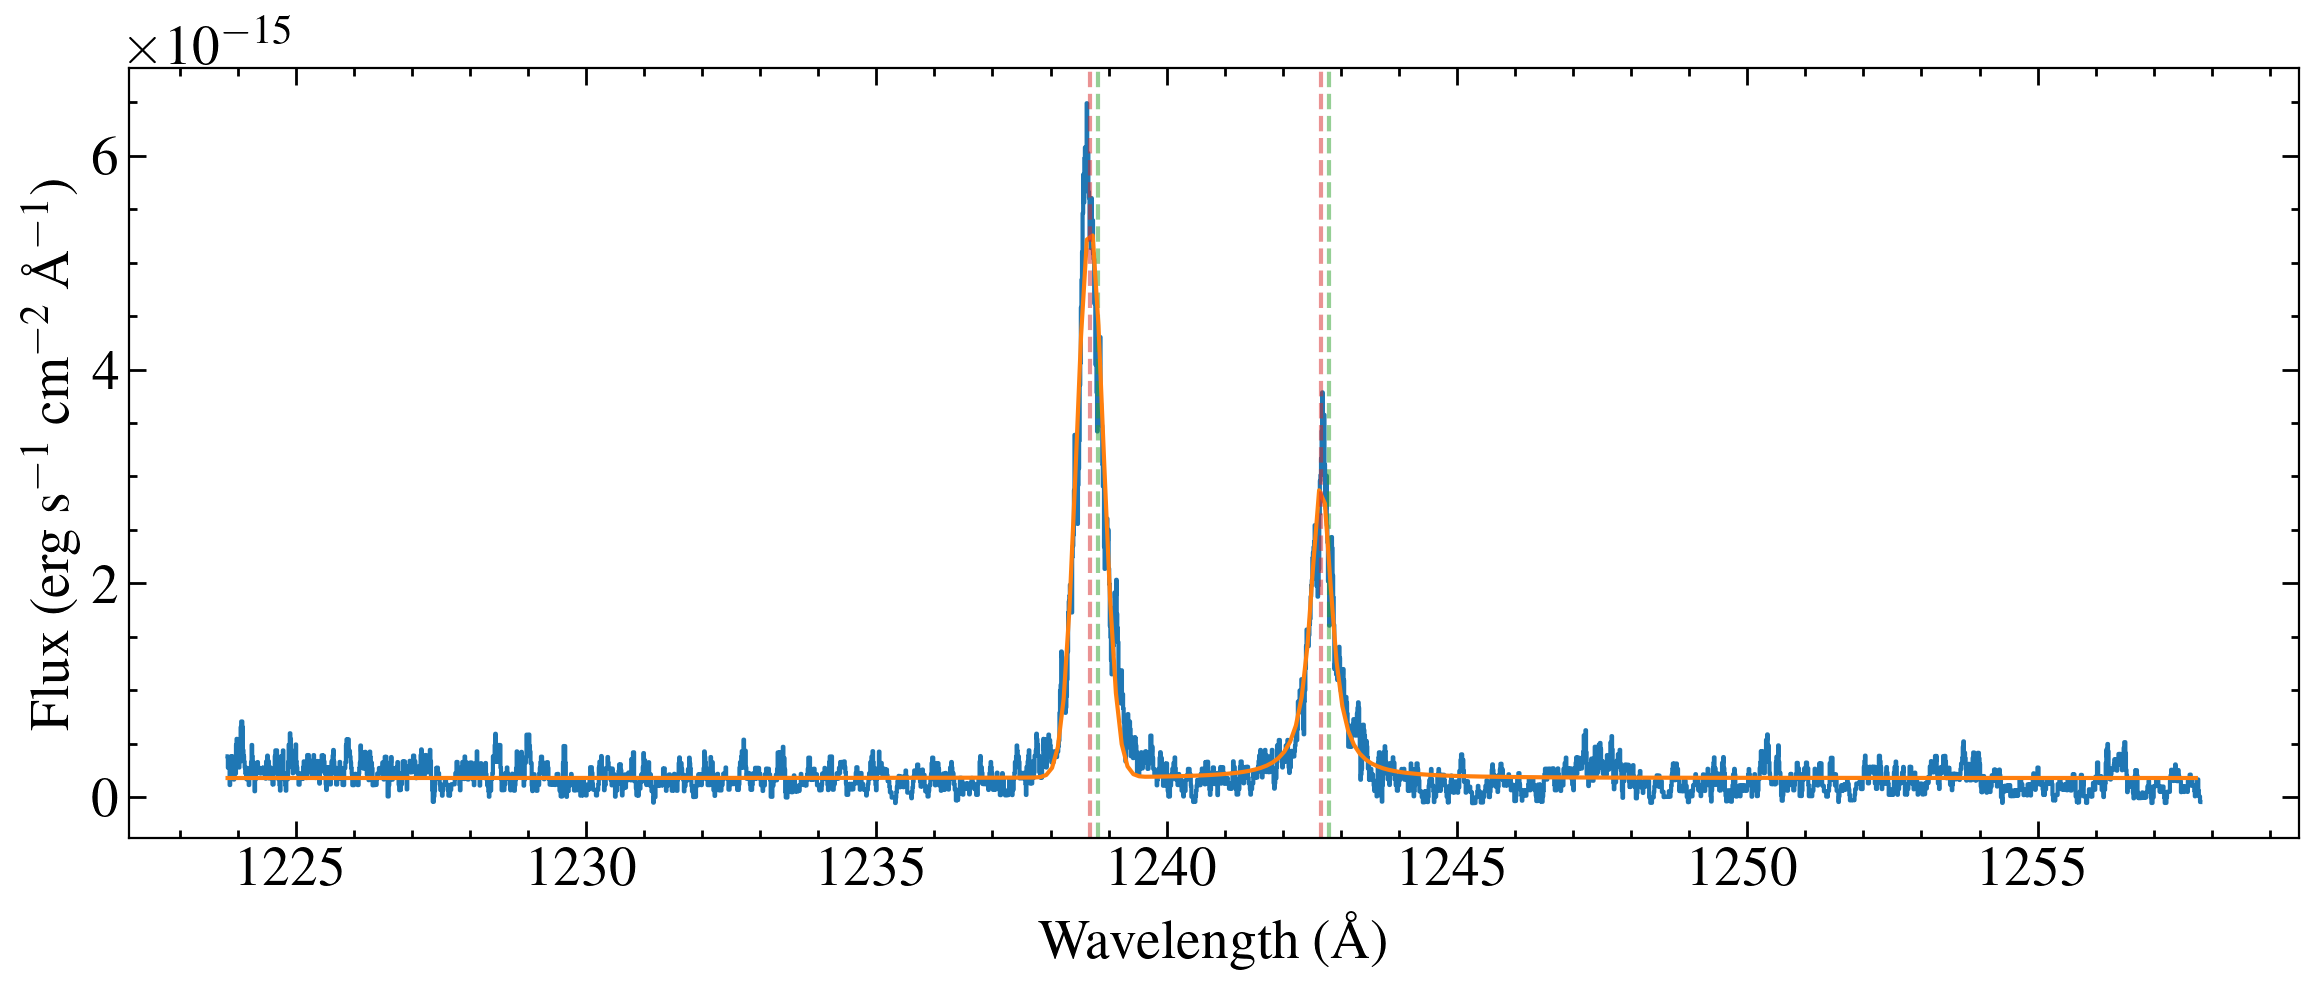

Voigt
-11.498067203399067 km / s 0.22825872445857076


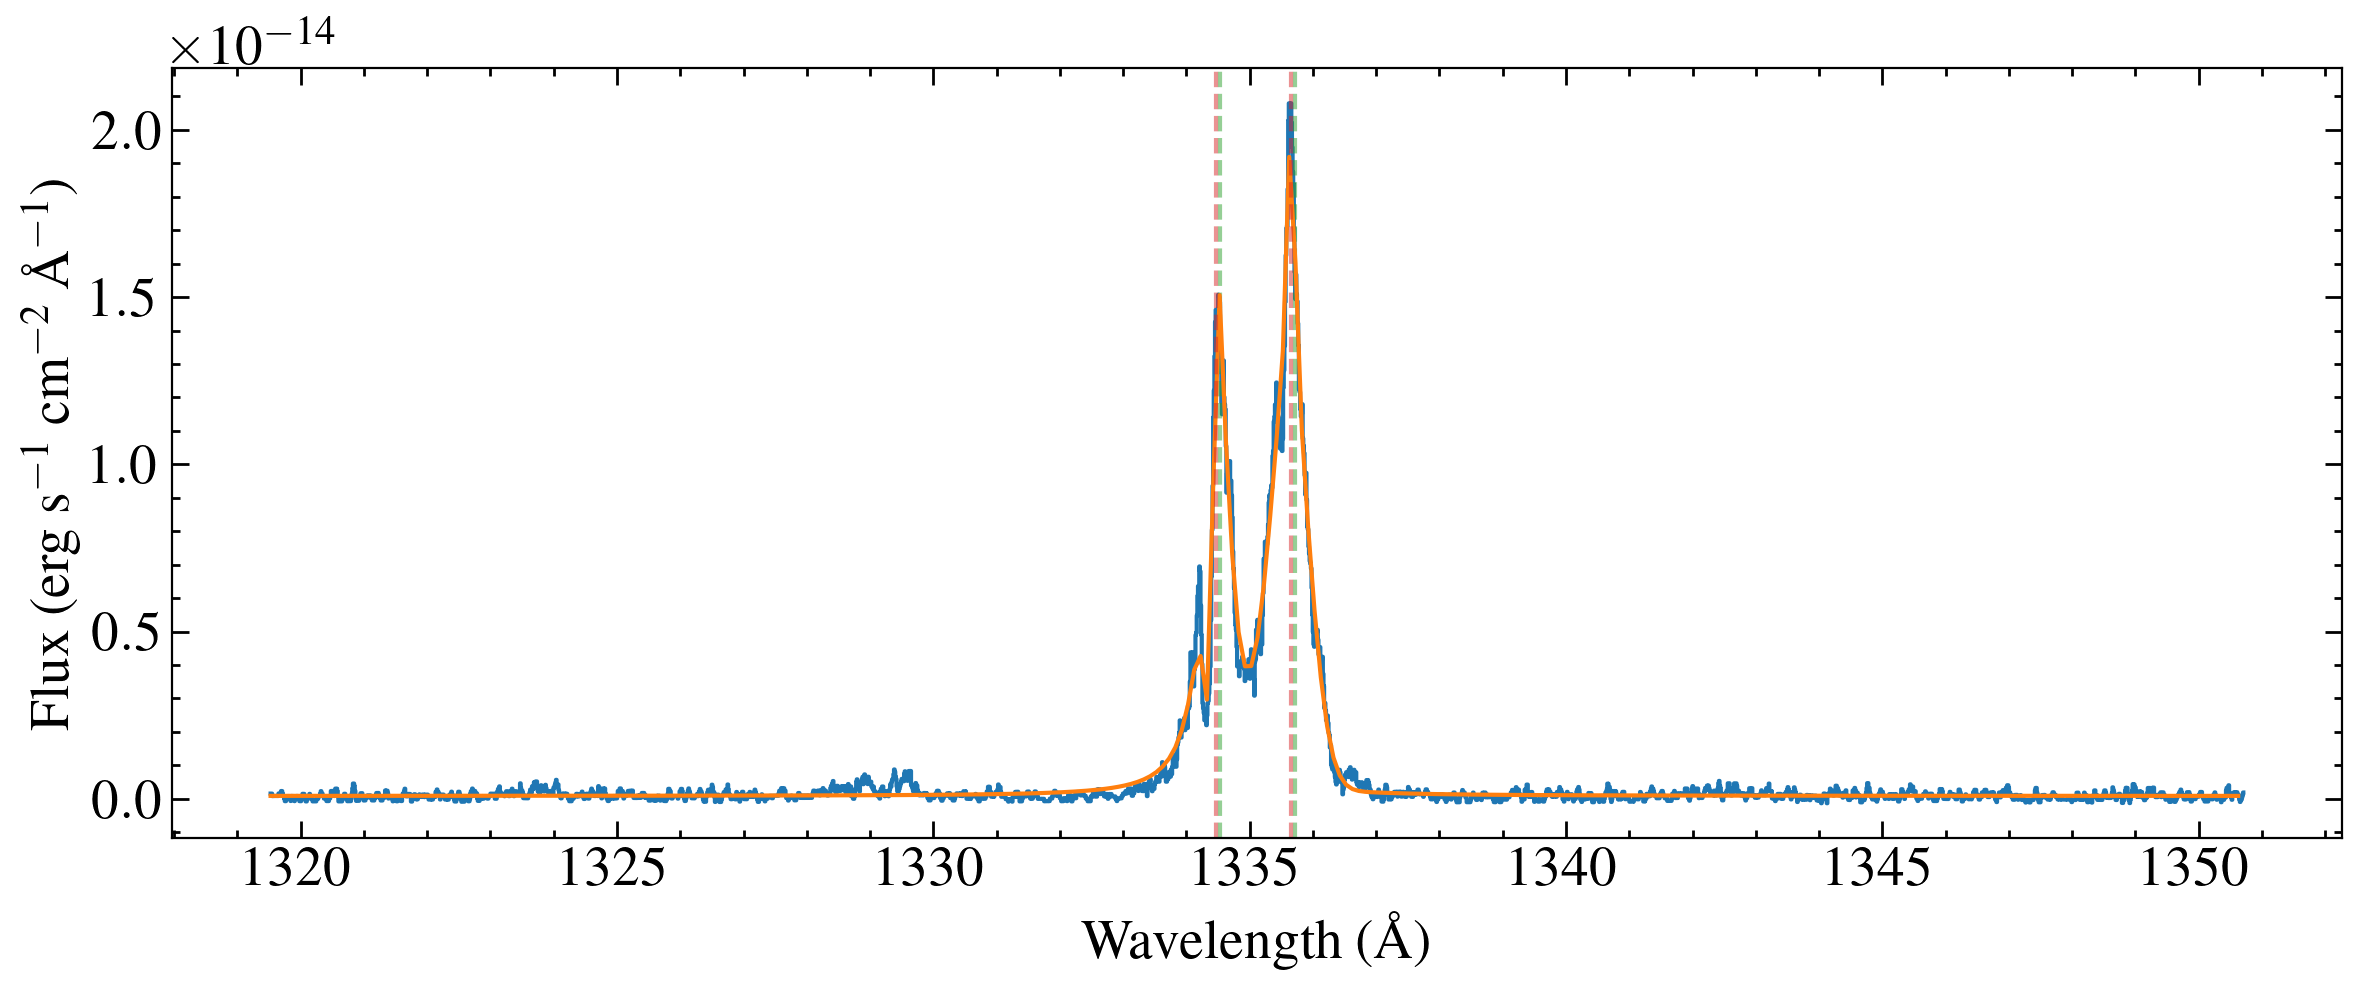

Voigt
-16.570994863527492 km / s 0.18956092586790518


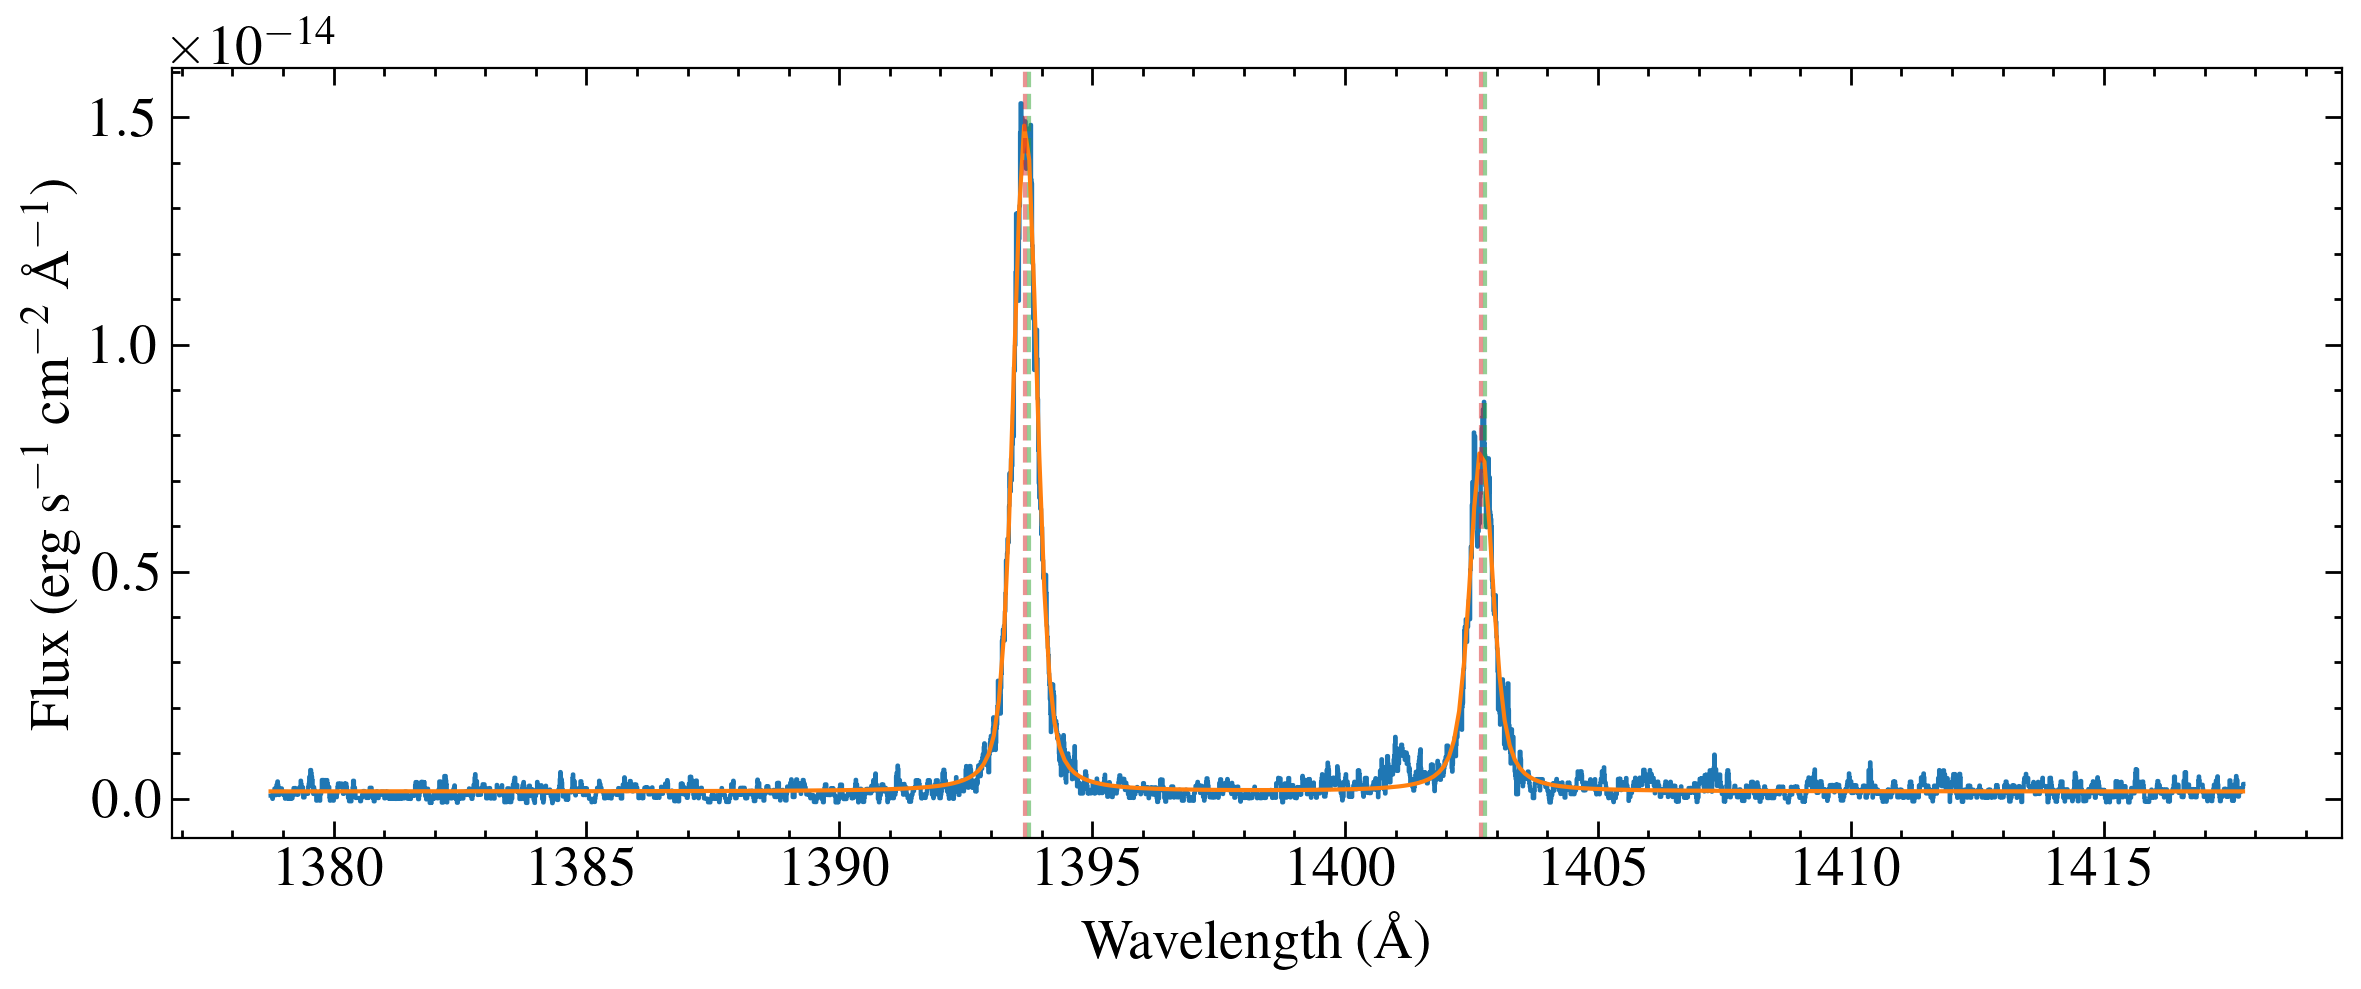

In [41]:
# import astropy.io.fits as fits
# import matplotlib.pyplot as plt
fitter = fitting.LevMarLSQFitter()

def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) 
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) 
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1


# lines = [1548.201,1550.772]
space = 15

doublets = np.array([[1238.821, 1242.804],[1334.524,1335.709],[1393.755,1402.77]])


# data = fits.getdata('draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g140l_v1_component-spec.fits', 1)
# w1, f1 , e1 = data['WAVELENGTH'], data['FLUX'], data['ERROR']

for lines in doublets:

    mask = (wc > lines[0]-space) & (wc < lines[-1]+space)
    w, f, e = wc[mask], fc[mask], ec[mask]
    plt.step(w, f, where='mid')
    plt.xlabel('Wavelength (\AA)')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


    [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

    # gg_init = models.Gaussian1D(2e-13, lines[0], 0.1)+models.Gaussian1D(2e-13, lines[1], 0.1)+models.Const1D(0)
    v_init = models.Voigt1D(x_0=lines[0], amplitude_L=2e-13, fwhm_L=0.1, fwhm_G=0.1)+ \
    models.Voigt1D(x_0=lines[1], amplitude_L=2e-13, fwhm_L=0.1, fwhm_G=0.1)+models.Const1D(0)#, fixed = dict(amplitude=True))

    def tiedfunc1(mod):
            x_0 = mod.x_0_0.value+np.diff(lines)
            # fwhm_G = mod.fwhm_G_1.value
            return x_0
        

    v_init.x_0_1.tied=tiedfunc1
    
    if lines[0] == 1334.524: #add ISM absorption to CII
        # print('adding ism')
        v_init = v_init + models.Voigt1D(x_0=lines[0]-0.1, amplitude_L=1e-13, fwhm_L=0.1, fwhm_G=0.1)+ \
    models.Voigt1D(x_0=lines[1]-0.1, amplitude_L=-1e-13, fwhm_L=0.1, fwhm_G=0.1)
        
        def tiedfunc2(mod):
            x_0 = mod.x_0_3.value+np.diff(lines)
            # fwhm_G = mod.fwhm_G_1.value
            return x_0

        
        v_init.x_0_4.tied=tiedfunc2

    # gg_fit = fitter(gg_init, w, f, maxiter=100000)
    v_fit = fitter(v_init, w, f, maxiter=100000)
    v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
    # print(gg_fit)
    # print(v_fit)
    # print(v_fit_e)

    # print('Gaussian')
    # obs_lam = np.array([gg_fit[0].mean.value, gg_fit[1].mean.value])
    # dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
    # print(dv)
    # print(np.mean(dv))


    print('Voigt')
    # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
    # print(np.diff(obs_lam), np.diff(lines))
    obs_lam = v_fit[0].x_0.value
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

    dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[0])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                    abs(dv.value -((obs_lam-v_fit_e[0])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

    print(dv, dv_e)


    # print(np.mean(dv))

    # plt.plot(w, gg_fit(w))
    w_plot = np.arange(w[0], w[-1],0.1)
    plt.plot(w_plot, v_fit(w_plot))    

    line_width = 3
    for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)




    plt.show()

# print(v_fit)

Text(0, 0.5, 'Flux (erg s$^{-1}$ cm$^{-2}$ \\AA$^{-1}$)')

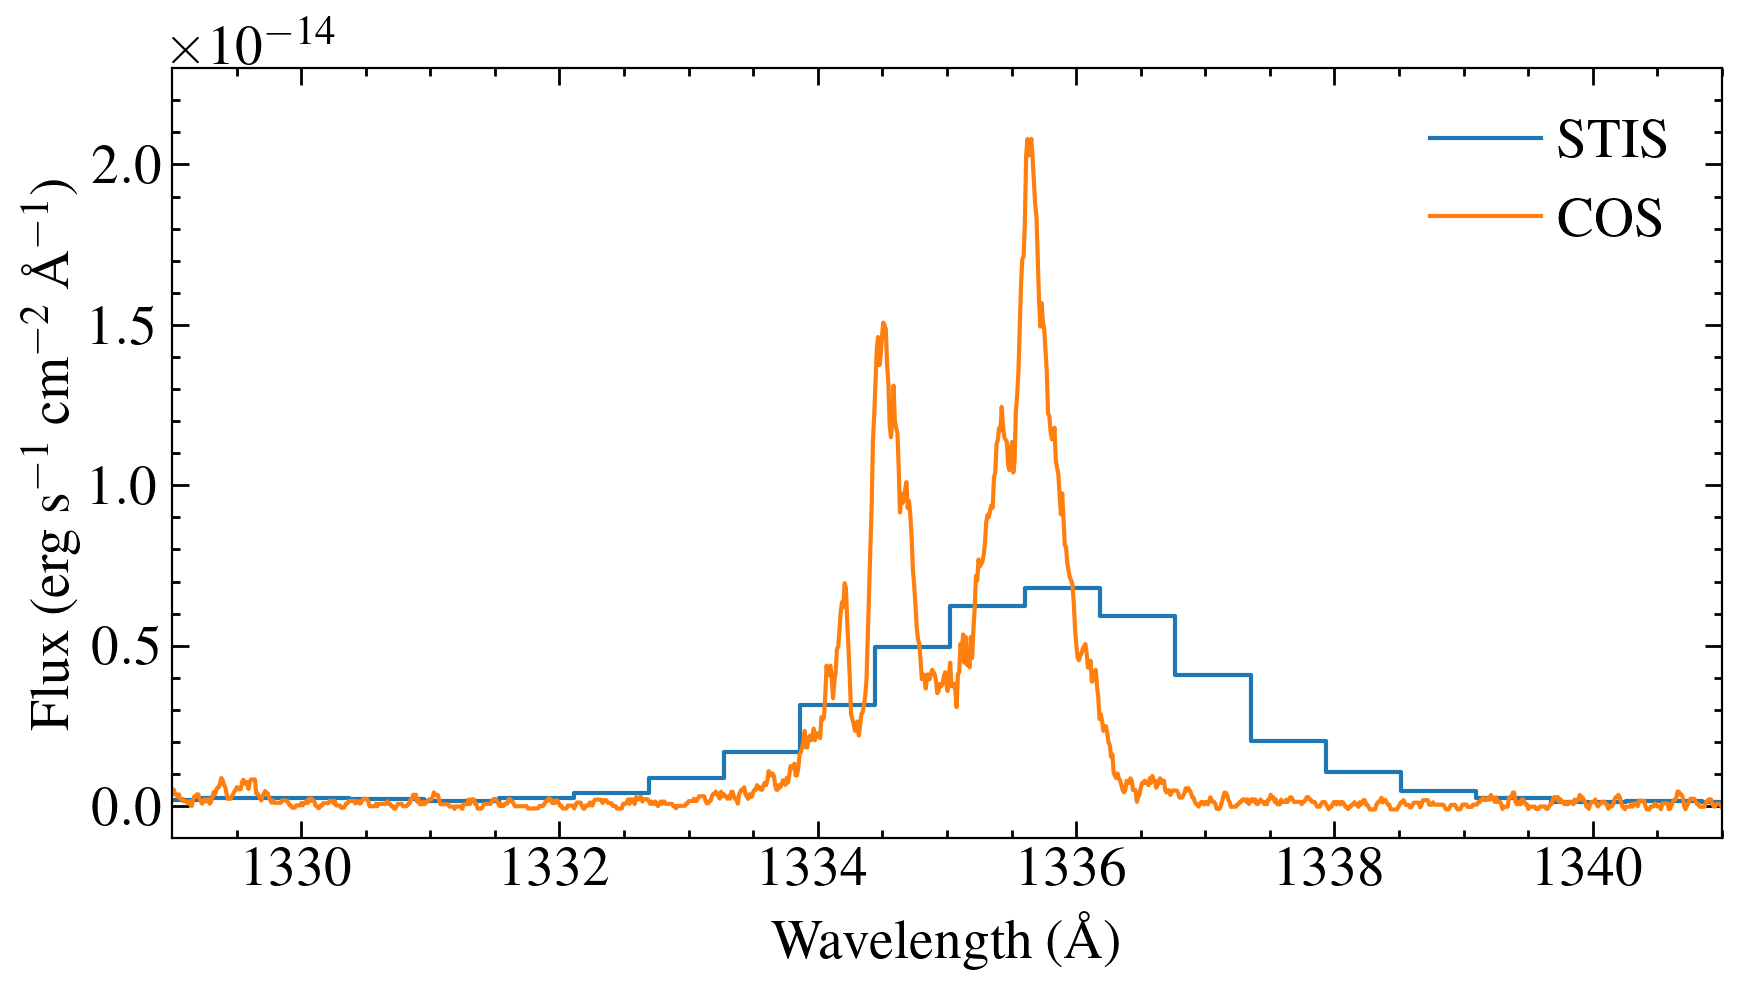

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.step(w1, f1, where='mid', label='STIS')
ax.plot(wc, fc, label='COS')

ax.legend()
# ax.set_xlim(1200, 1220)
ax.set_xlim(1329, 1341)
ax.set_ylim(-0.1e-14, 2.3e-14)

ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

Apparenlty we need to do reddening

In [43]:
from dust_extinction.parameter_averages import F99



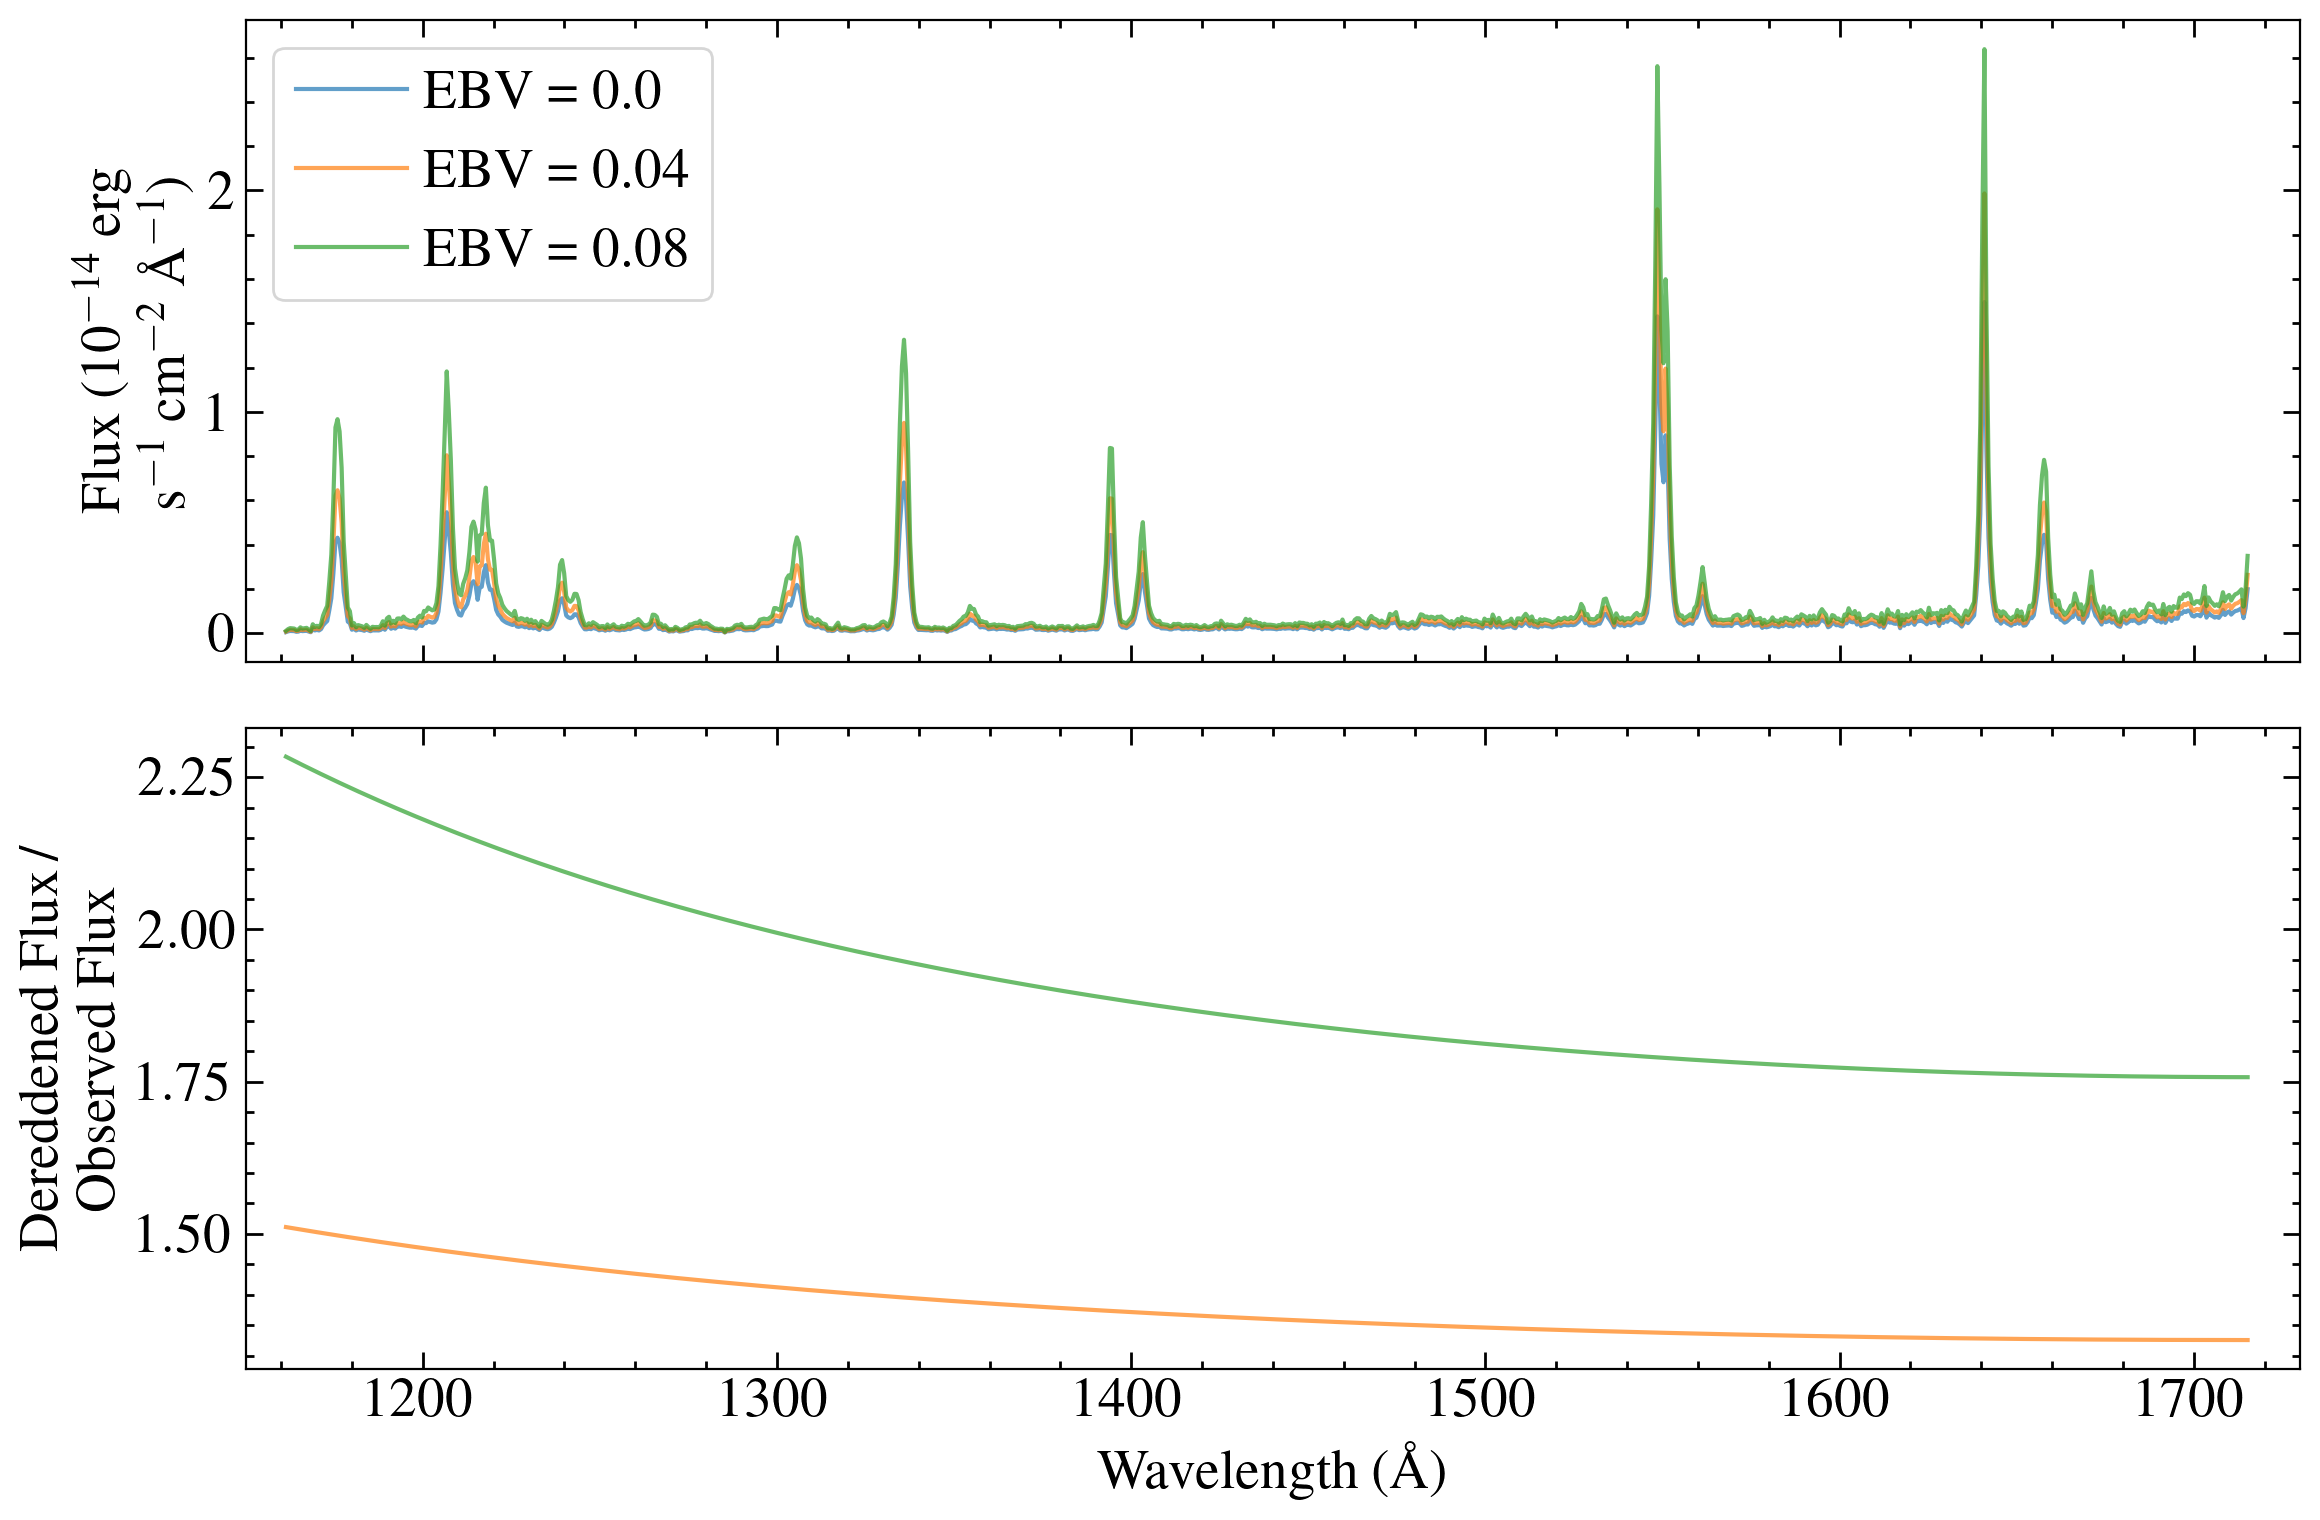

In [44]:
ebv4 = 0.04
ebv8 = 0.08

ext = F99(Rv=3.1)

fig, ax = plt.subplots(figsize=(12, 8), nrows=2, sharex=True)

w, f = w_fuv, f_fuv



# plt.plot(w, f)
red4 = ext.extinguish(w*u.AA, Ebv=ebv4)
red8 = ext.extinguish(w*u.AA, Ebv=ebv8)
# red_up = ext.extinguish(w*u.AA, Ebv=ebv+ebv_up)
# red_lo = ext.extinguish(w*u.AA, Ebv=ebv-ebv_lo)

# plt.plot(w, red)
scale = 1e14
ax[0].plot(w, f*scale, alpha =0.7, label='EBV = 0.0')
# ax.step(w, f,where='mid', alpha =0.7, label='Uncorrected flux')
# plt.plot(w, f*red_up, alpha =0.7)
# plt.plot(w, f*red_lo, alpha =0.7)
f4 = f/red4
f8= f/red8
ax[0].plot(w,f4*scale , alpha =0.7, label='EBV = 0.04')
ax[0].plot(w, f8*scale, alpha =0.7, label='EBV = 0.08')


# r4 = f4
# r8 = f/f8
ax[1].plot(w, 1/red4, c='C1', alpha=0.7)
ax[1].plot(w, 1/red8, c='C2', alpha=0.7)

# ax.fill_between(w, f/red_up,f/red_lo, color='C1', alpha=0.7, label = r'With E(B-V) = {}$^{{+{}}}_{{-{}}}$'.format(ebv, ebv_up, ebv_lo))

ax[0].set_ylabel('Flux (10$^{-14}$ erg  \n s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax[1].set_xlabel('Wavelength (\AA)')
ax[1].set_ylabel('Dereddened Flux\,/ \n Observed Flux')

ax[0].legend(frameon=True)
ax[0].set_xlim(1150, 1730)
fig.tight_layout()
# plt.yscale('log')

# plt.show()
# plt.plot(w, f/(f/red))
fig.savefig('plots/hd120411_reddening.pdf')

Is the airglow subtraction off?

In [45]:
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo27040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28040_sx1.fits'],
      dtype='<U74')

In [46]:
g140ls = []
for i in x1ds:
    hdr = fits.getheader(x)
    if hdr['OPT_ELEM'] == 'G140L':
        g140ls.append(x)
        
g140ls

['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits']

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


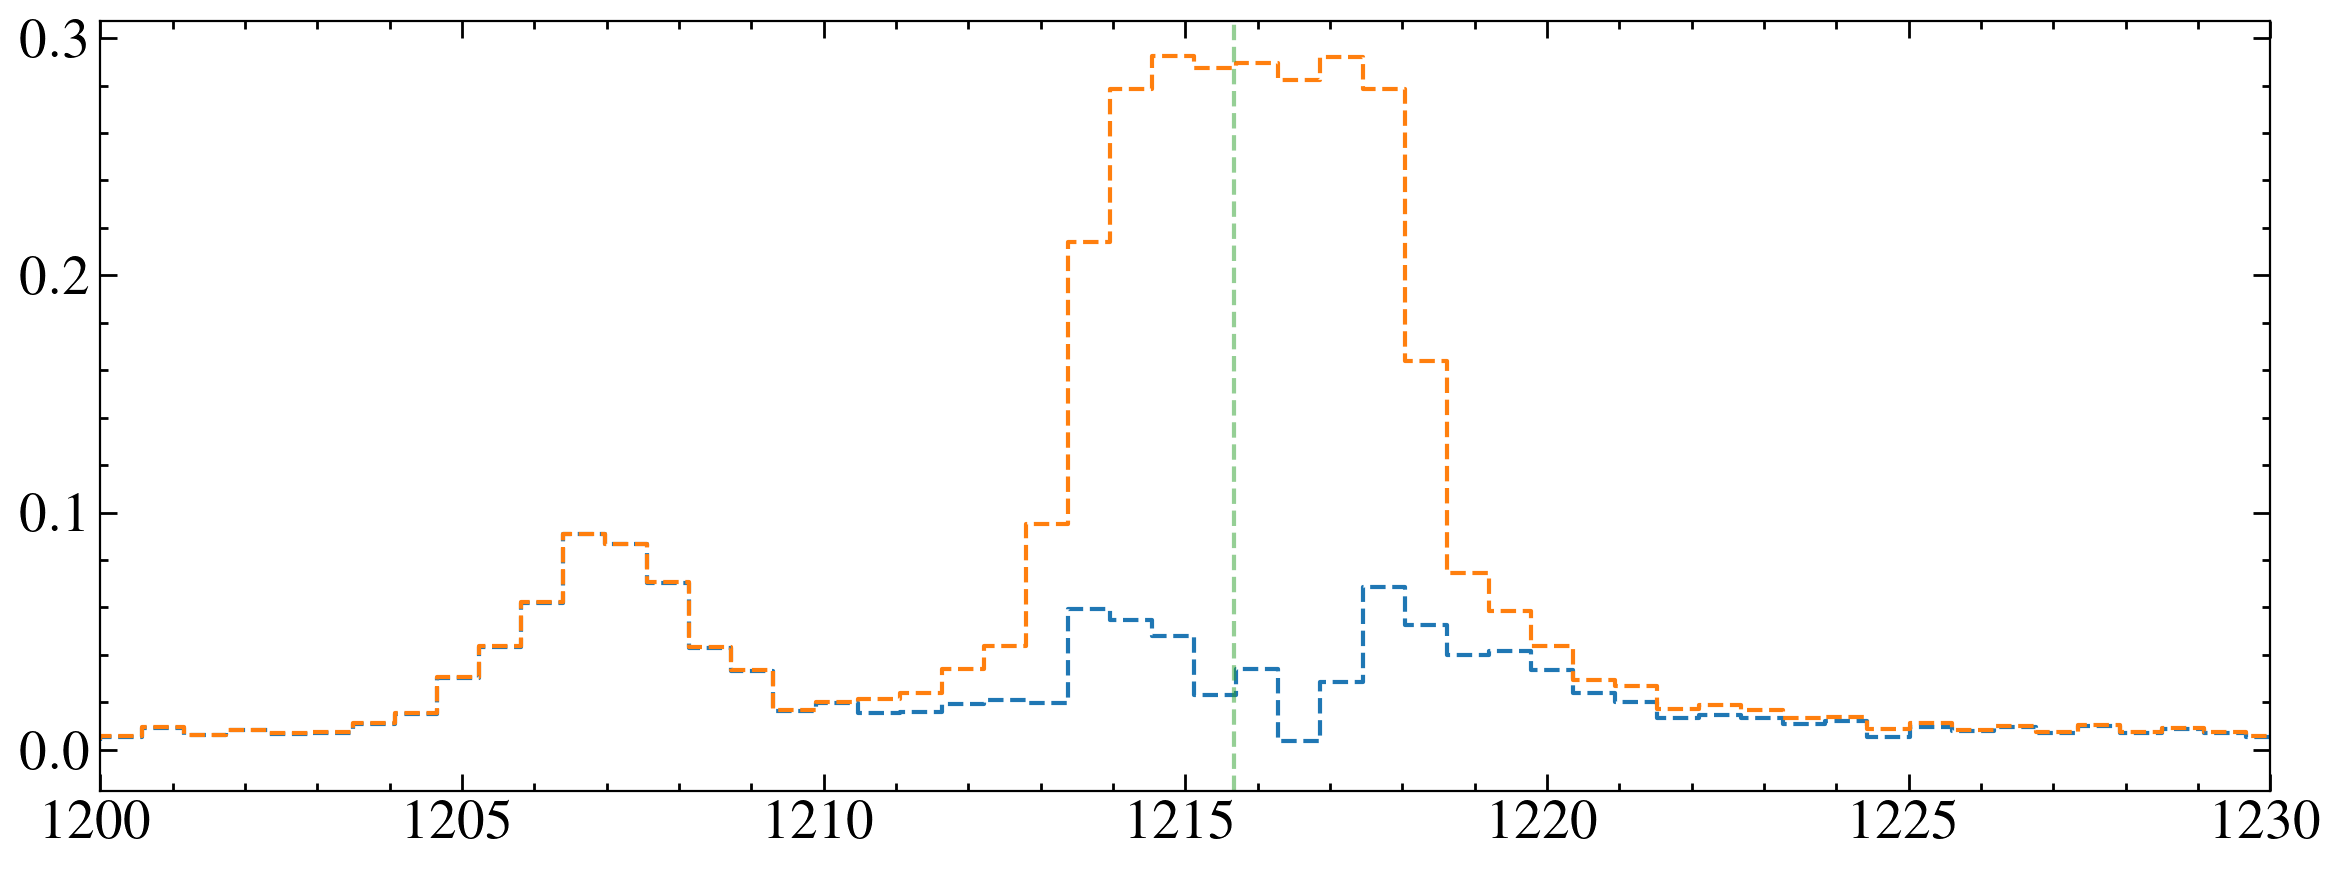

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


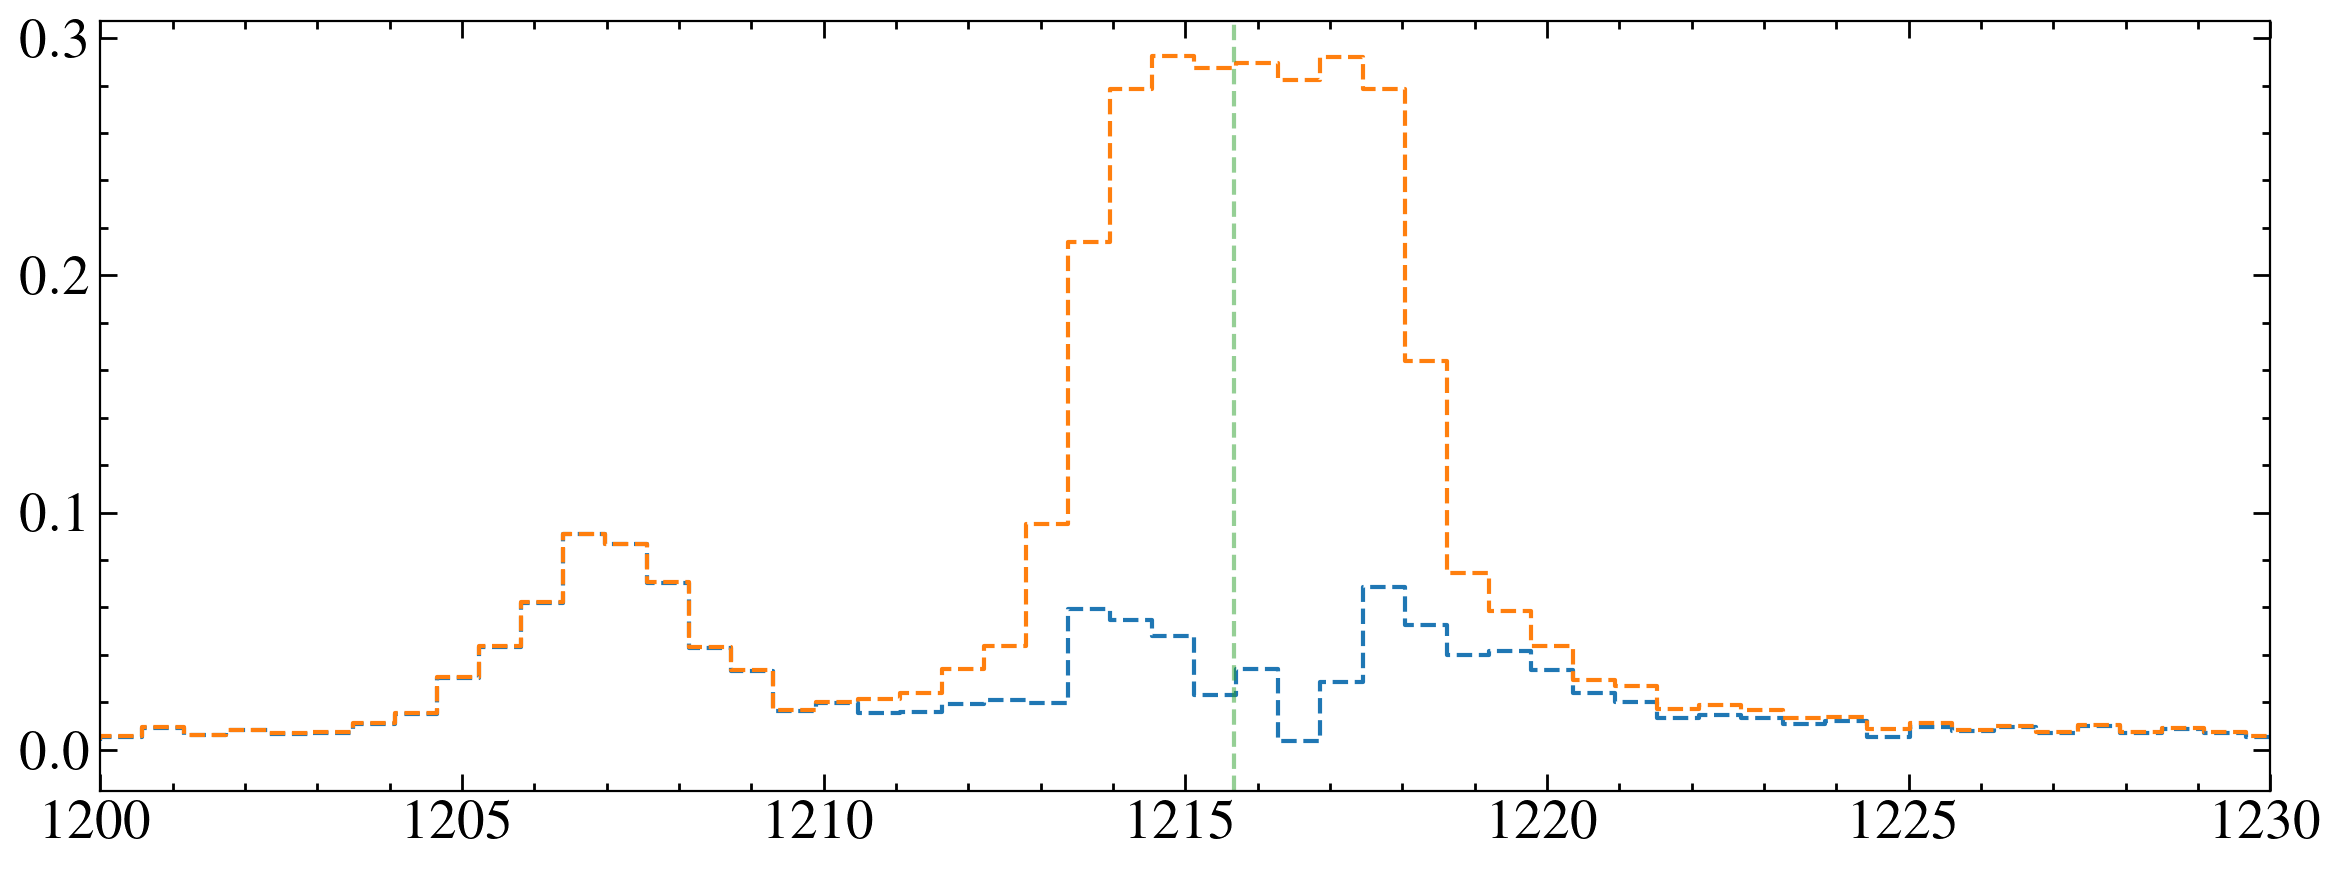

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


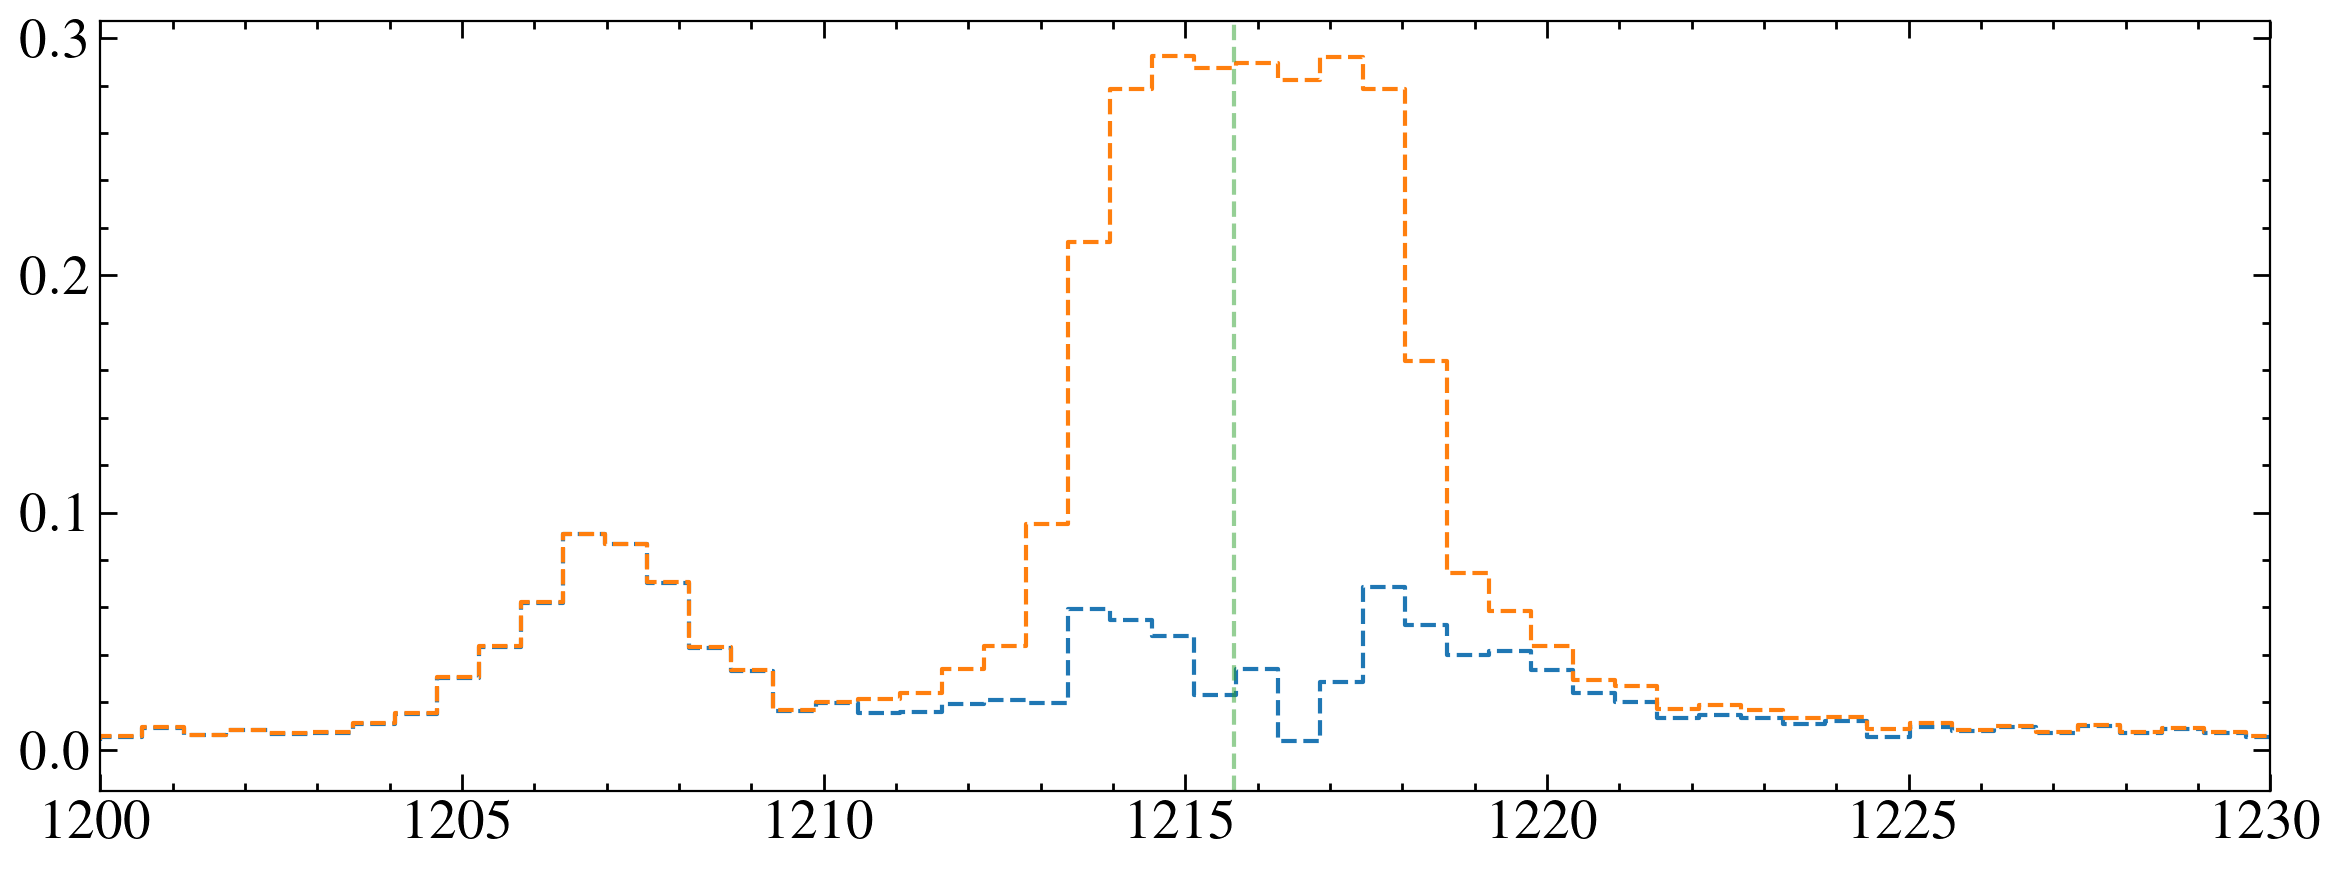

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


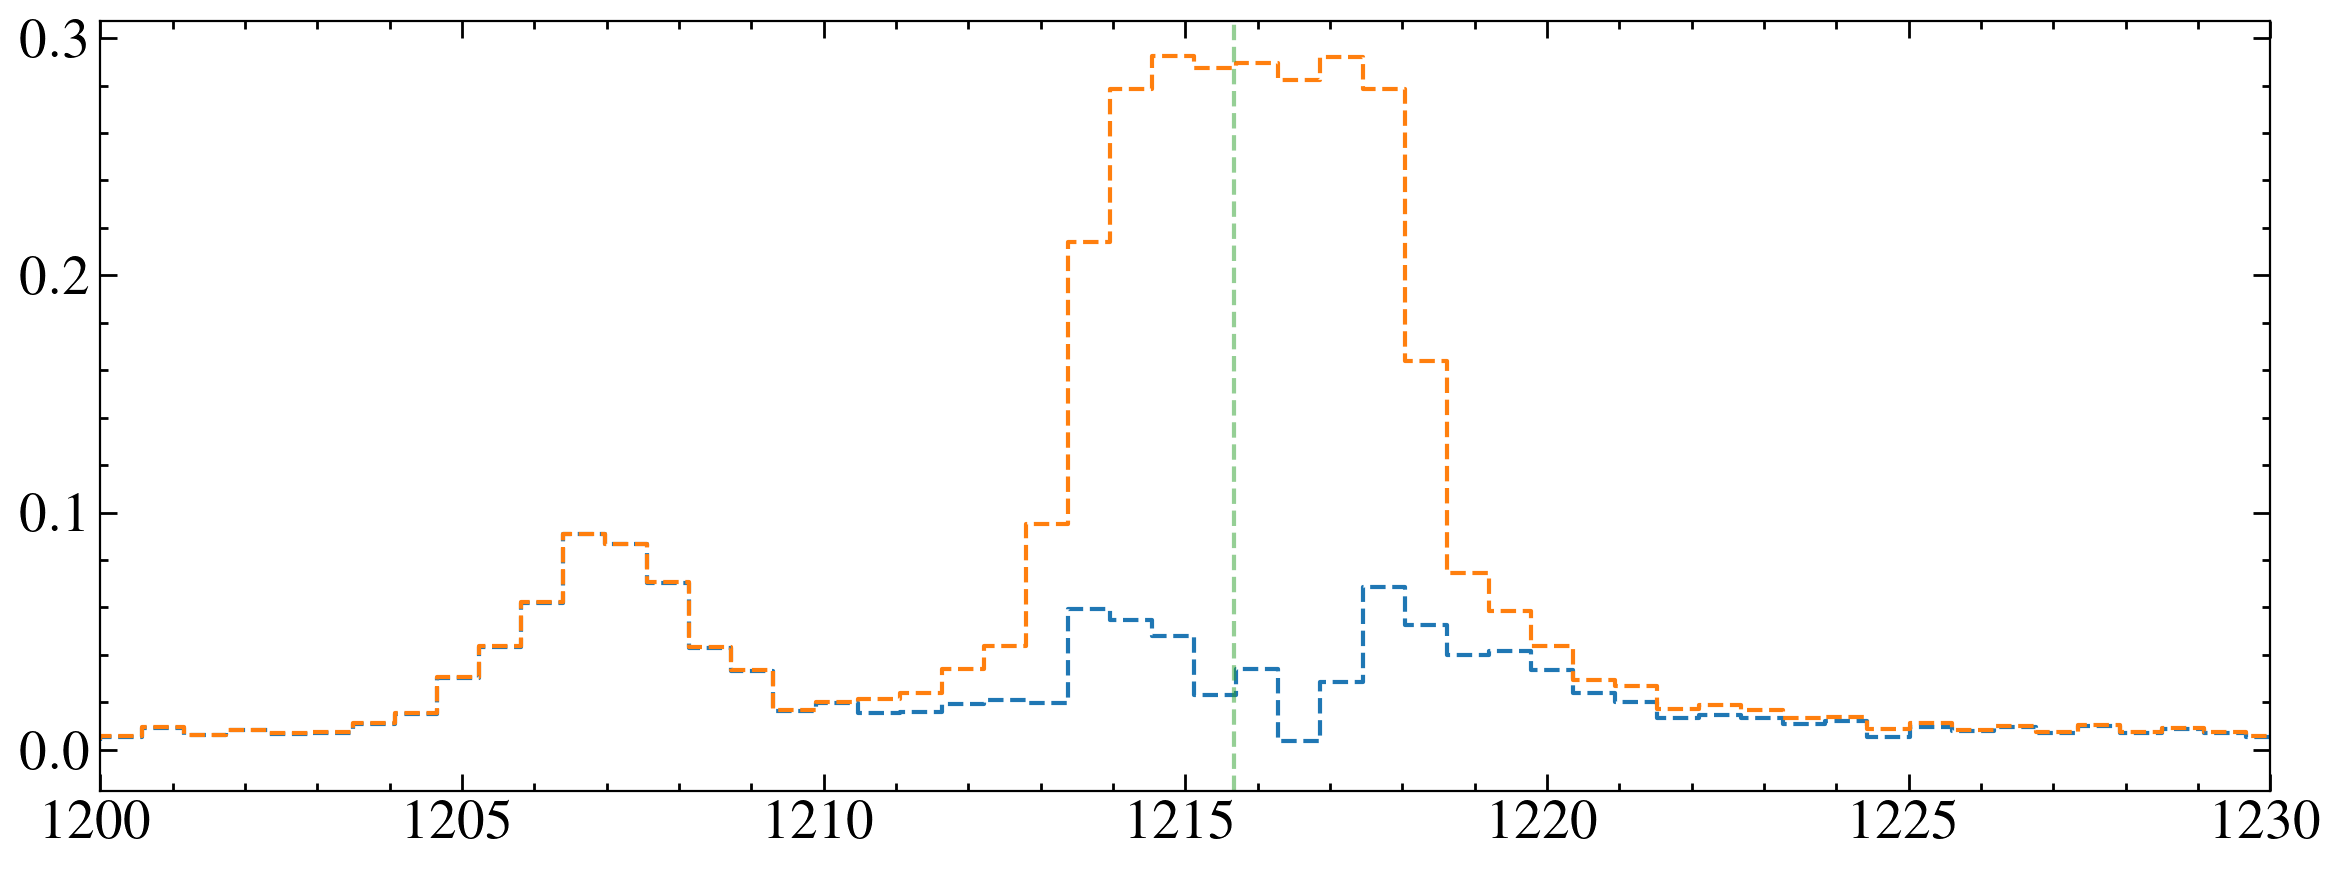

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


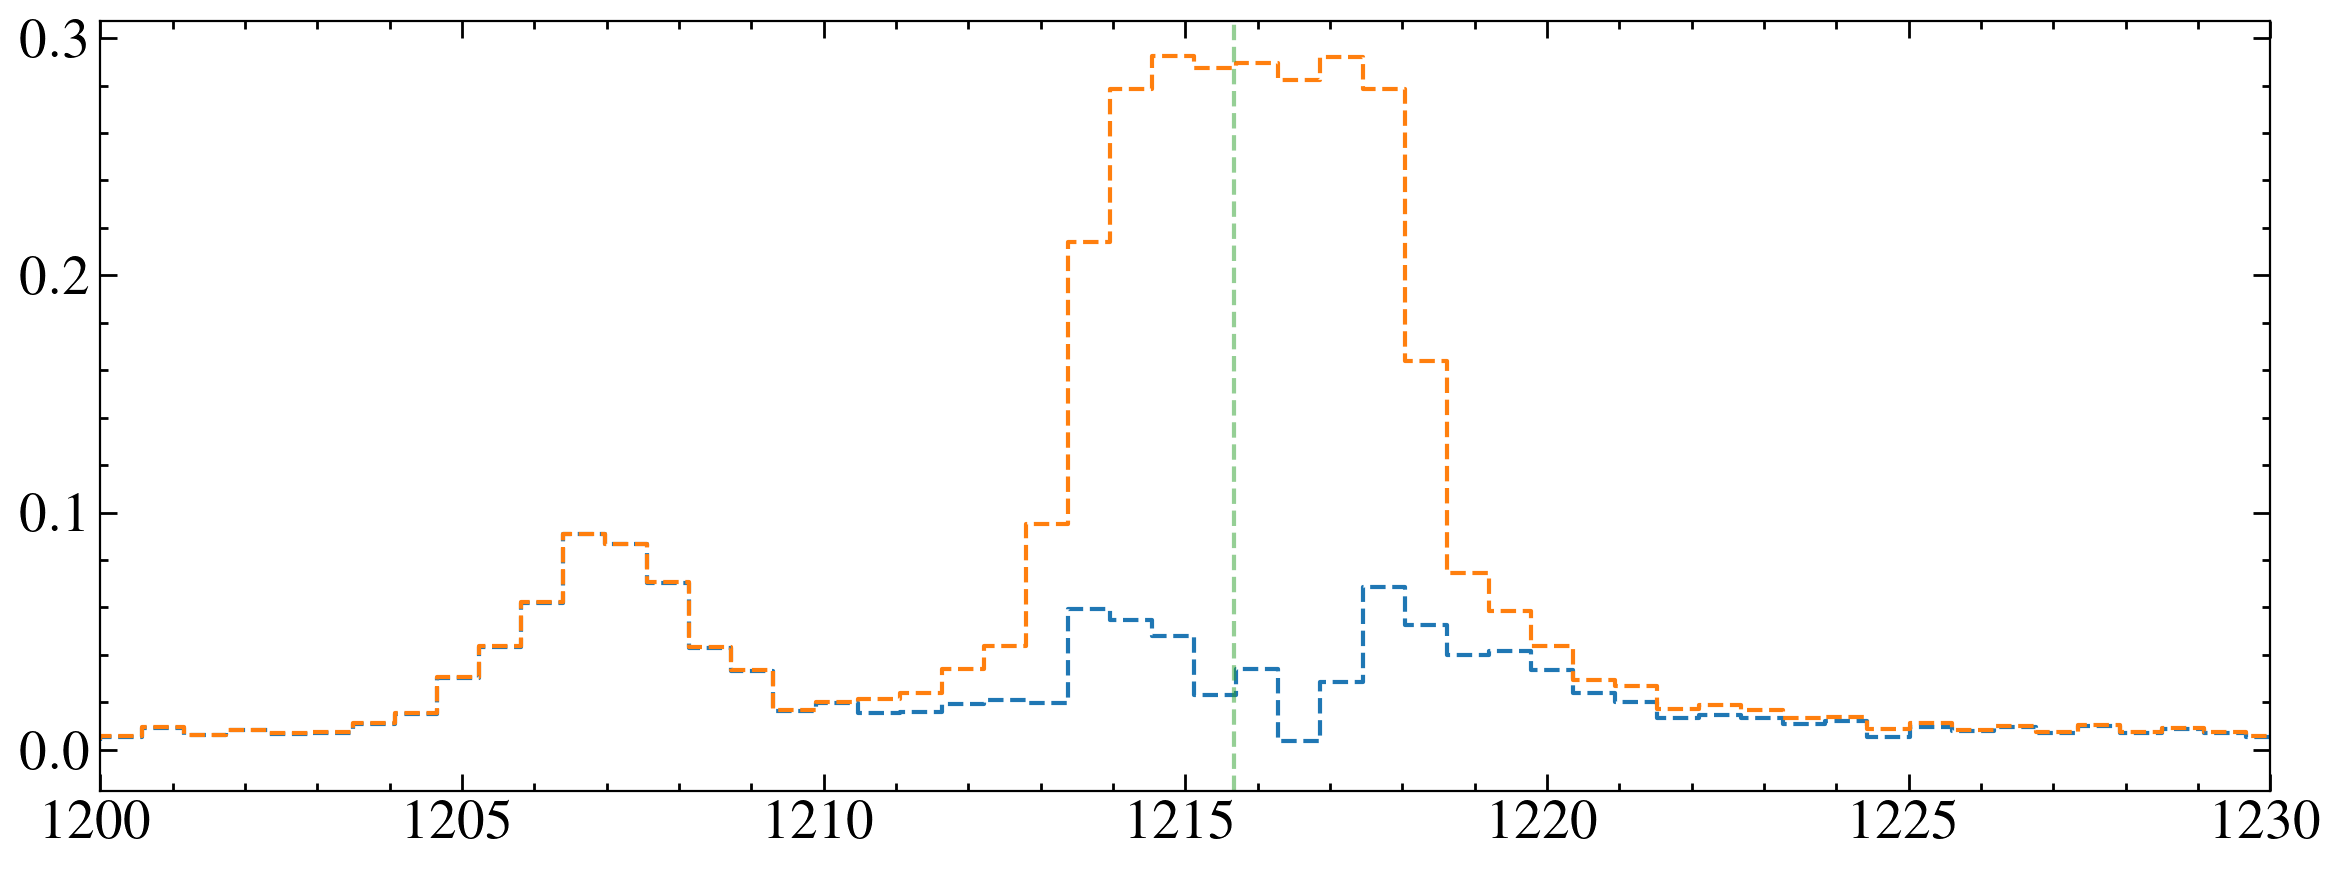

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


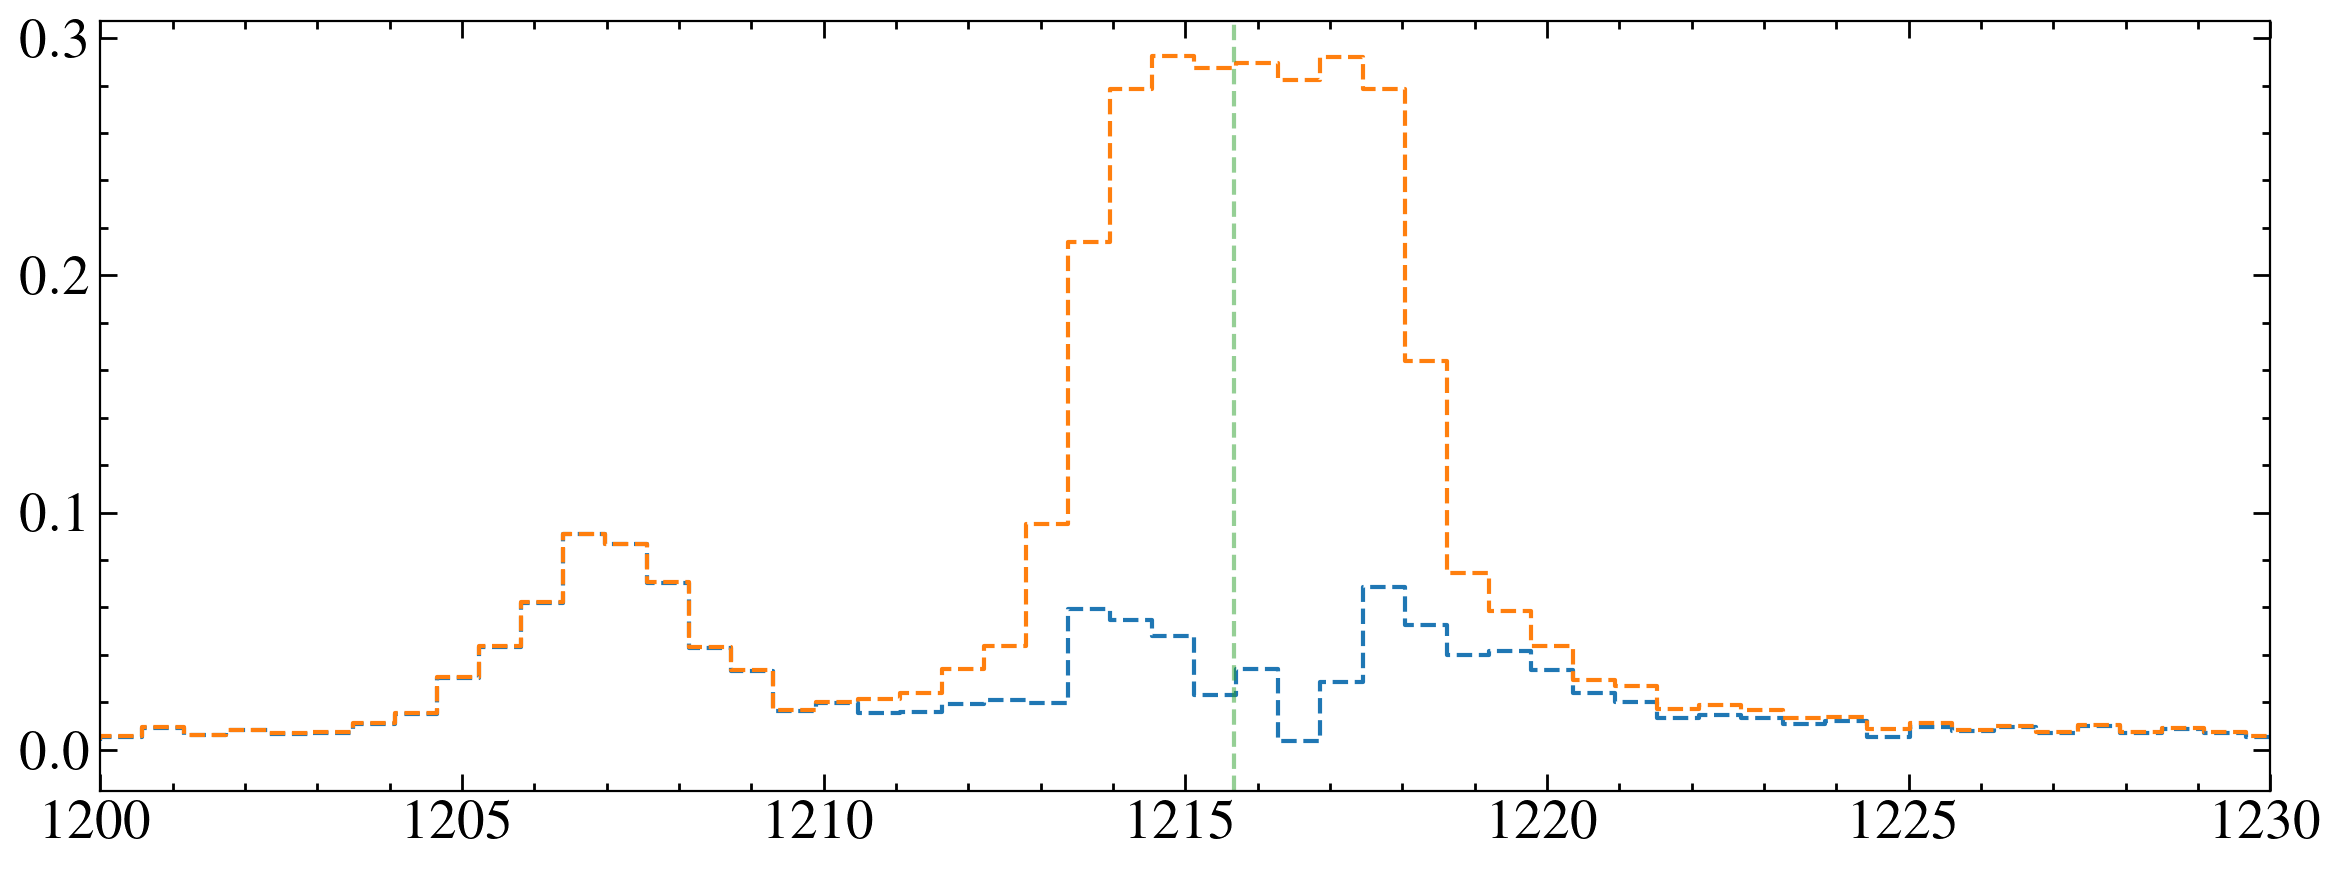

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


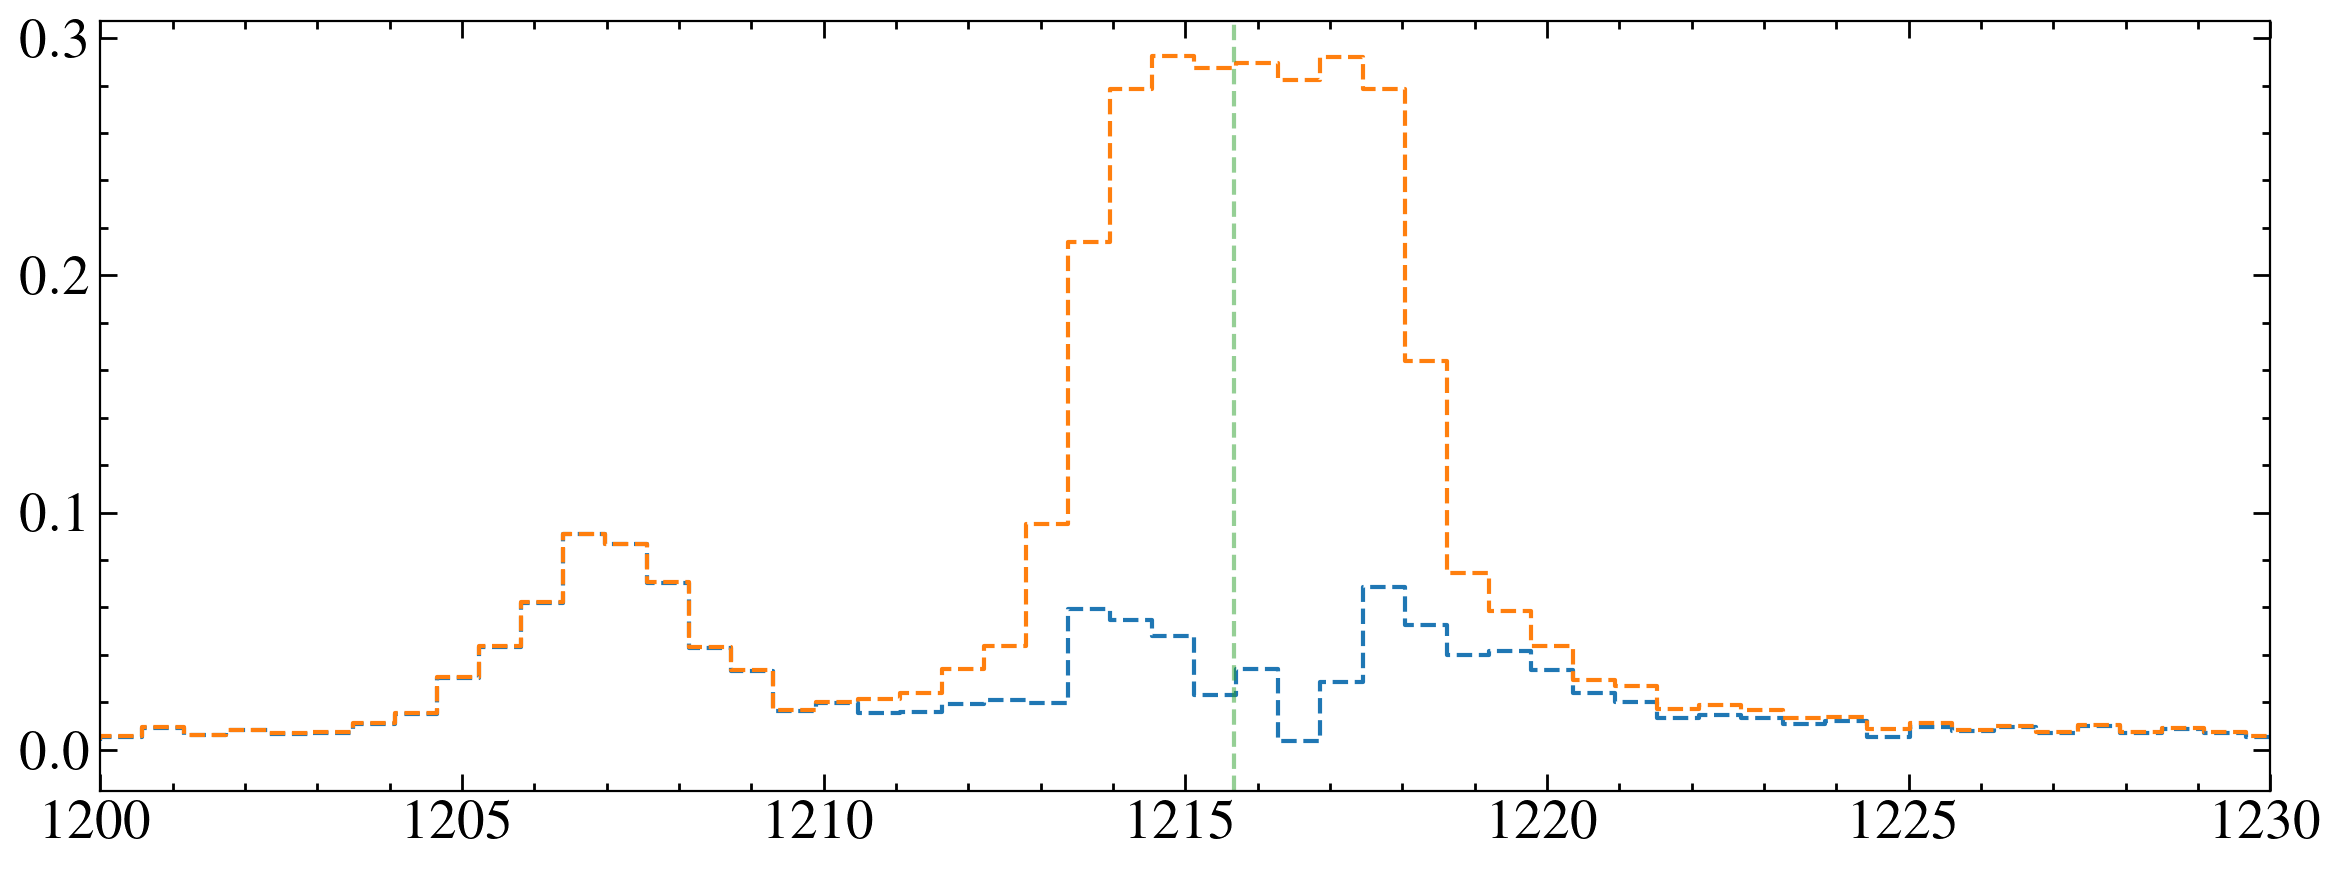

/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28020_x1d.fits


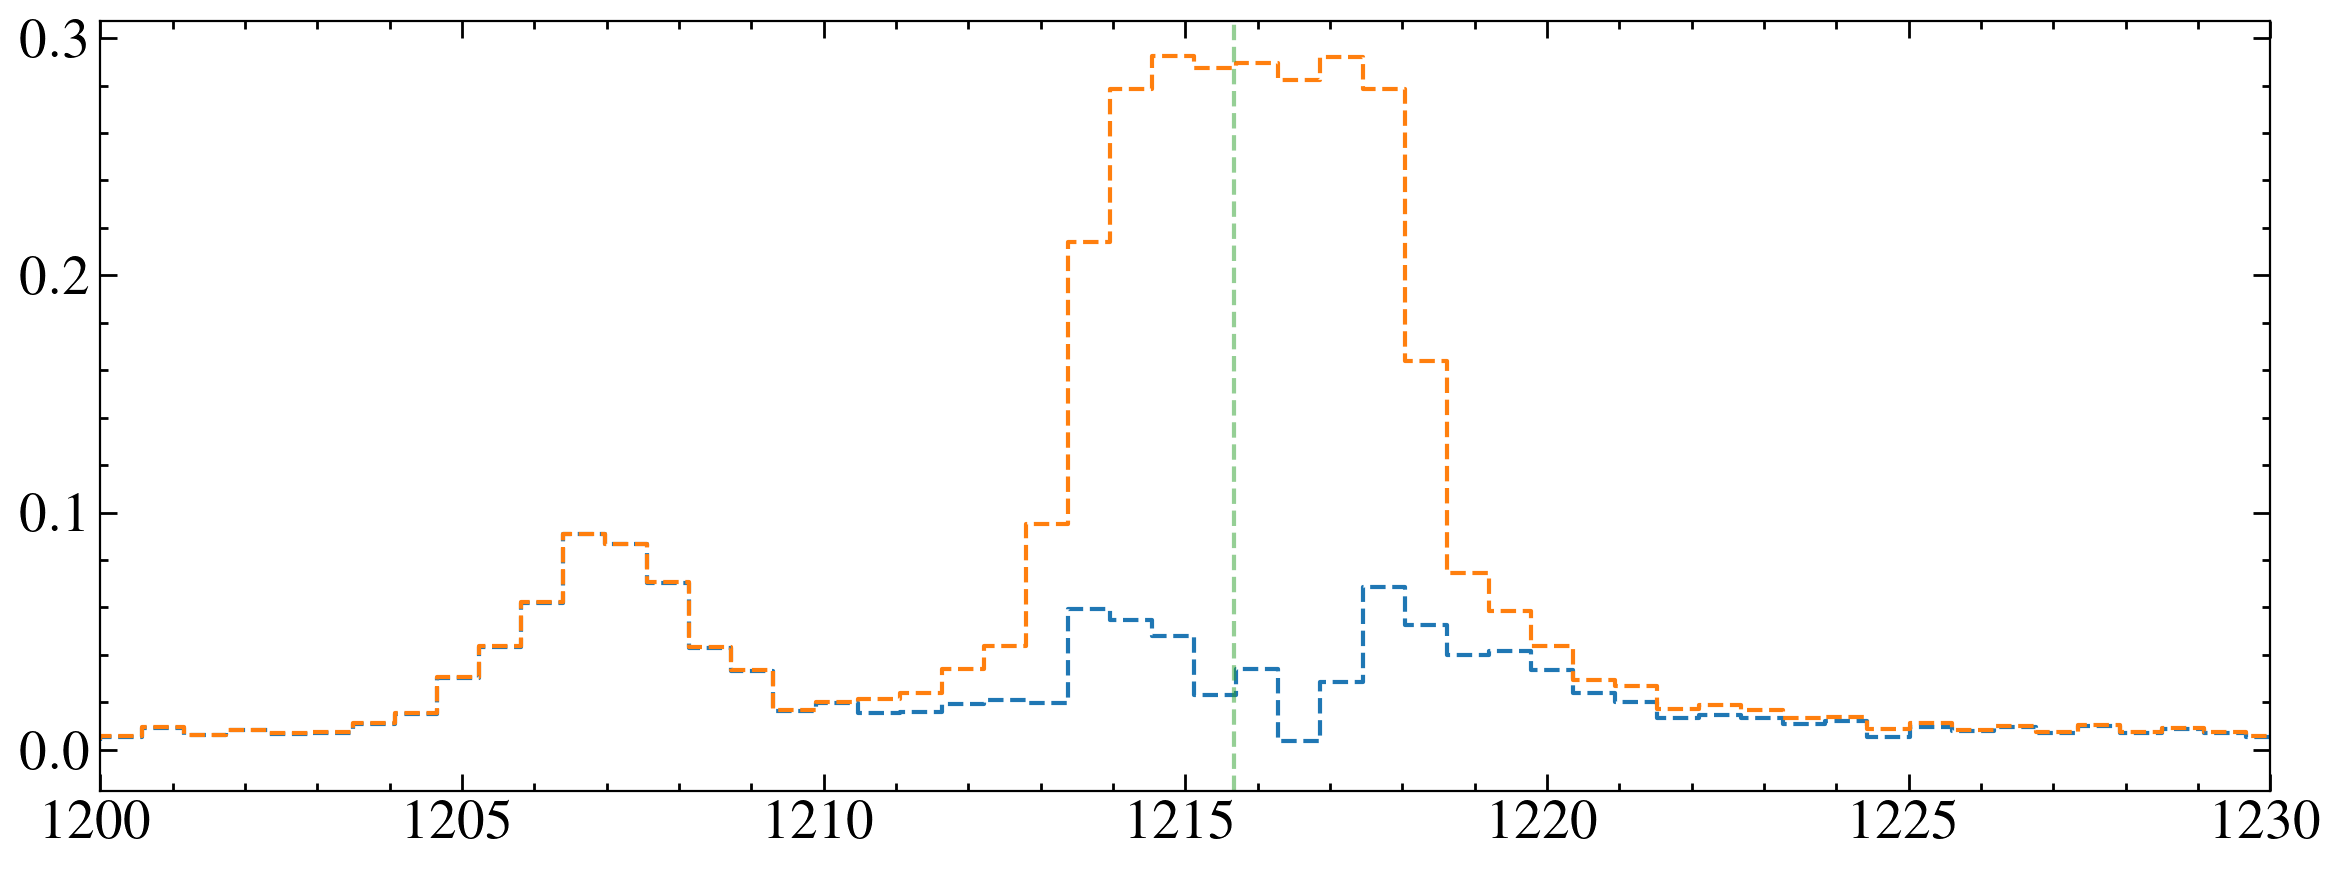

In [47]:
lya = 1215.67

for x in g140ls:
    print(x)
    data = fits.getdata(x,1)[0]
    plt.step(data['WAVELENGTH'], data['NET'], where='mid', ls='--')
    plt.step(data['WAVELENGTH'], data['GROSS'], where='mid', ls='--')
#     plt.step(data['WAVELENGTH'], data['BACKGROUND'], where='mid', ls='--')
    plt.xlim(1200, 1230)
    plt.axvline(lya, ls='--', c='C2', alpha=0.5)
    plt.show()
    
w1, f1,e1 = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    

In [48]:
import stistools
os.environ['oref'] = path

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


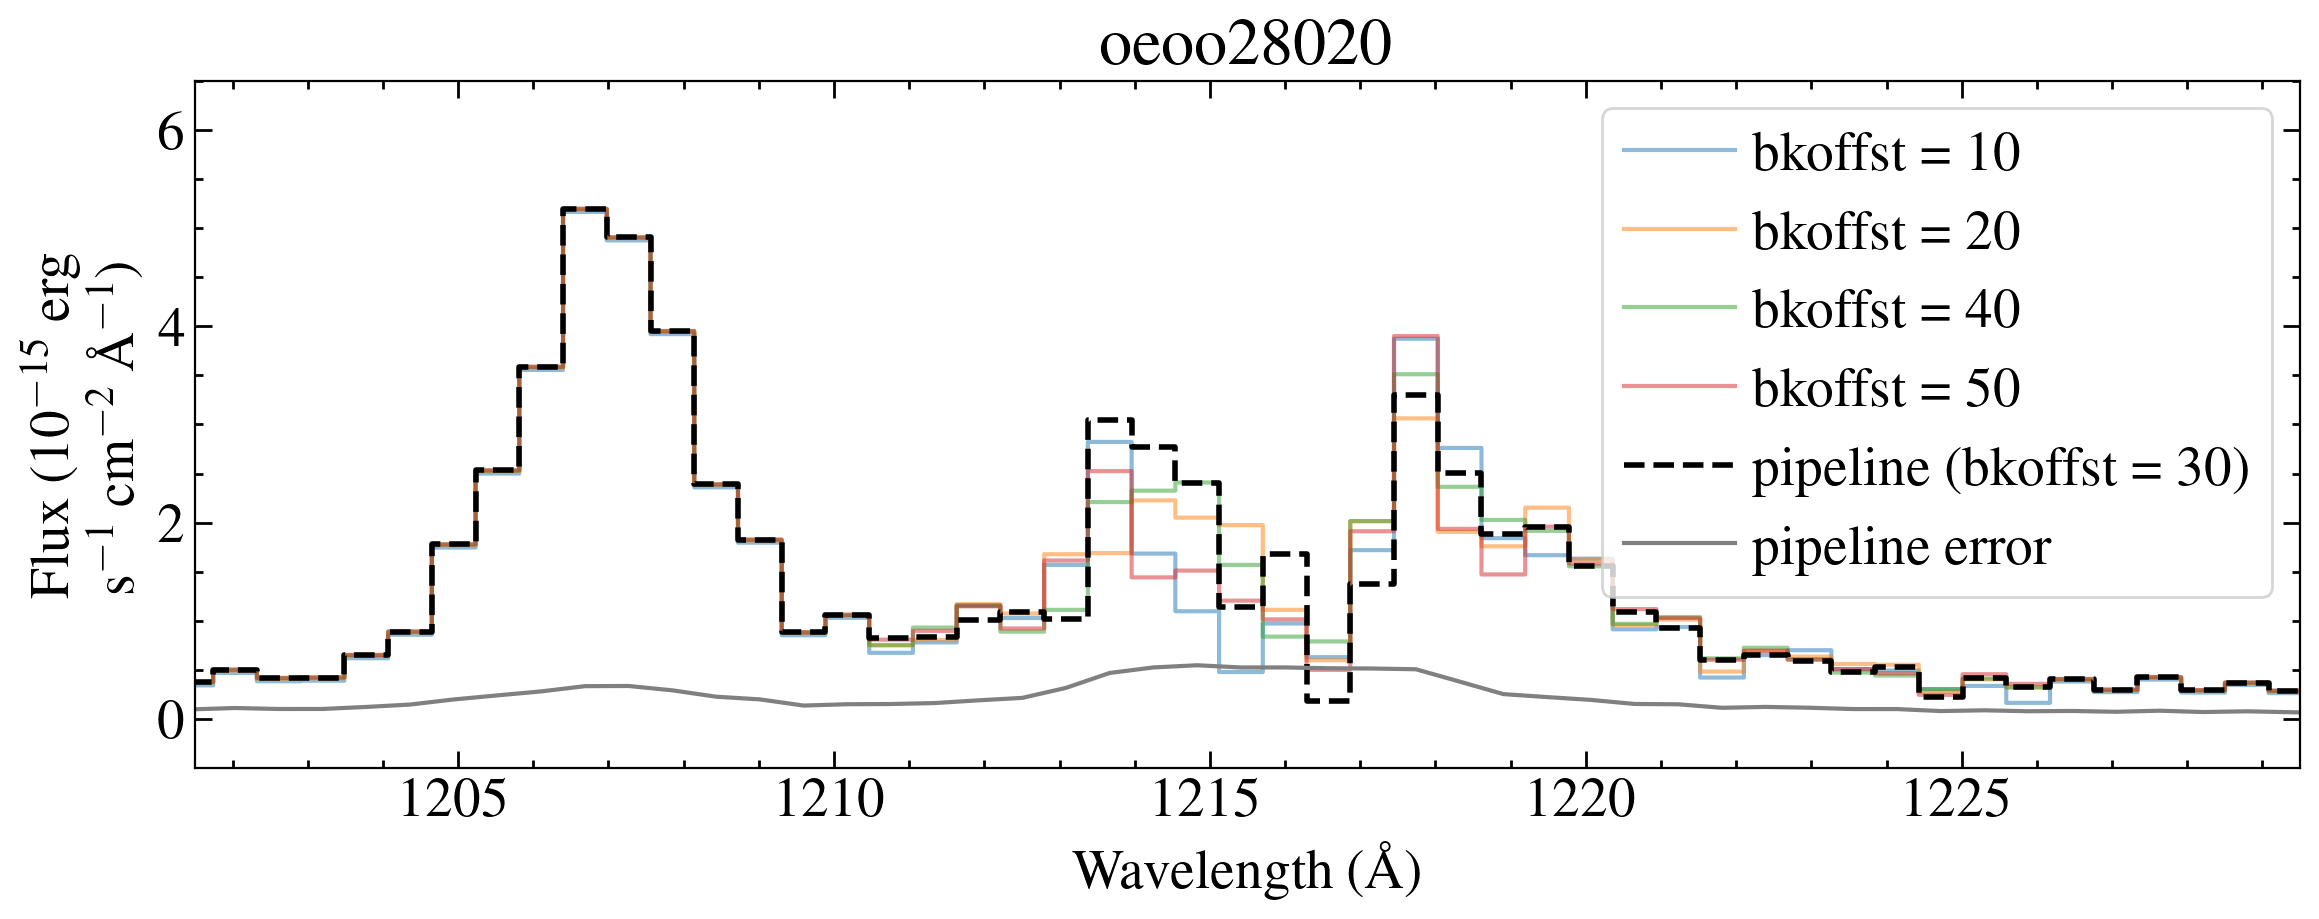

In [49]:
fig, ax = plt.subplots(figsize=(12, 5))

bkoffs = [10, 20, 40, 50]
root = 'oeoo28020'

scale=1e15

for i, bkoff in enumerate(bkoffs):
    flt = '{}{}_flt.fits'.format(path, root)
#     SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
#     grating = fits.getheader(flt,0)['OPT_ELEM']
#     cenwave = fits.getheader(flt,0)['CENWAVE']
#     tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/hd120411/{}_new_x1d.fits'.format(rootname)
    if os.path.exists(outname):
        os.remove(outname)
#     a2center = get_a2center(xs[i],ys[i], tracegrid)
#     print(a2center)
    bksize=5
#     bkoff = 
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/hd120411/{}_new.trl'.format(rootname), bksmode='median', 
                      bk1size=bksize, bk2size=bksize, bk1offst=-1*bkoff, bk2offst=bkoff)

    data = fits.getdata('reextractions/hd120411/{}_new_x1d.fits'.format(root), 1)[0]
#     print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f*scale, where='mid', label = 'bkoffst = {}'.format(bkoff), alpha=0.5)
#     plt.step(w, e, where='mid')
plt.step(w1, f1*scale, where='mid', ls='--', c='k', lw=2, label='pipeline (bkoffst = 30)')
ax.plot(w1, e1*scale, c='0.5', label='pipeline error')
plt.legend(frameon=True)

plt.ylim(-0.5, 6.5)
# plt.xlim(1206.5,1223.5)
plt.xlim(1201.5,1229.5)

ax.set_ylabel('Flux (10$^{-15}$ erg  \n s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')
ax.set_title(root)

fig.tight_layout()



plt.show()

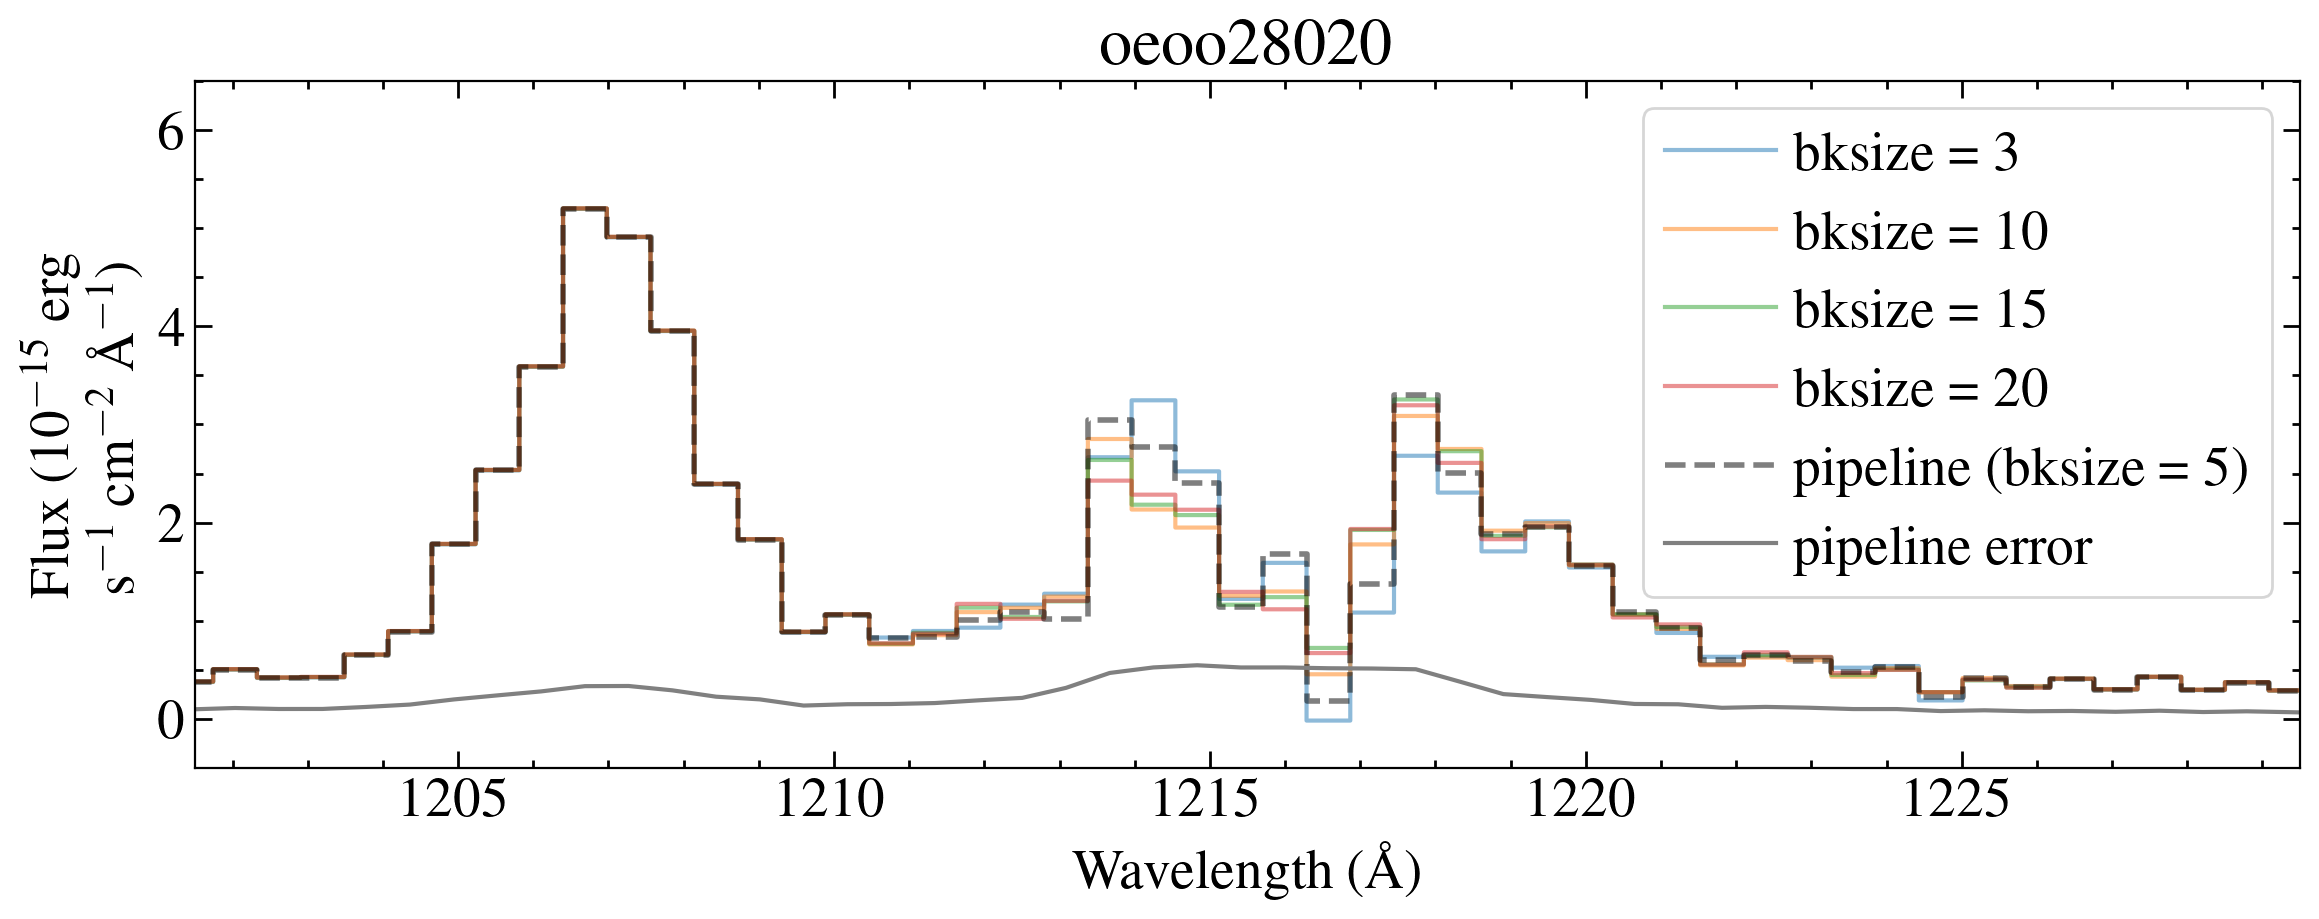

In [50]:
fig, ax = plt.subplots(figsize=(12, 5))

bksizes = [3, 10, 15, 20]
root = 'oeoo28020'

scale=1e15

for i, bksize in enumerate(bksizes):
    flt = '{}{}_flt.fits'.format(path, root)
#     SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
#     grating = fits.getheader(flt,0)['OPT_ELEM']
#     cenwave = fits.getheader(flt,0)['CENWAVE']
#     tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/hd120411/{}_new_x1d.fits'.format(rootname)
    if os.path.exists(outname):
        os.remove(outname)
#     a2center = get_a2center(xs[i],ys[i], tracegrid)
#     print(a2center)
#     bksize=5
    bkoff = 30
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/hd120411/{}_new.trl'.format(rootname), bksmode='median', 
                      bk1size=bksize, bk2size=bksize, bk1offst=-1*bkoff, bk2offst=bkoff)

    data = fits.getdata('reextractions/hd120411/{}_new_x1d.fits'.format(root), 1)[0]
#     print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f*scale, where='mid', label = 'bksize = {}'.format(bksize), alpha=0.5)
#     plt.step(w, e, where='mid')
plt.step(w1, f1*scale, where='mid', ls='--', c='k', lw=2, label='pipeline (bksize = 5)', alpha=0.5)
ax.plot(w1, e1*scale, c='0.5', label='pipeline error')
plt.legend(frameon=True)

plt.ylim(-0.5, 6.5)
# plt.xlim(1206.5,1223.5)
plt.xlim(1201.5,1229.5)

ax.set_ylabel('Flux (10$^{-15}$ erg  \n s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')
ax.set_title(root)
fig.tight_layout()

plt.show()

0.9879329163088747 0.9985016710968891
0.9601243517814636


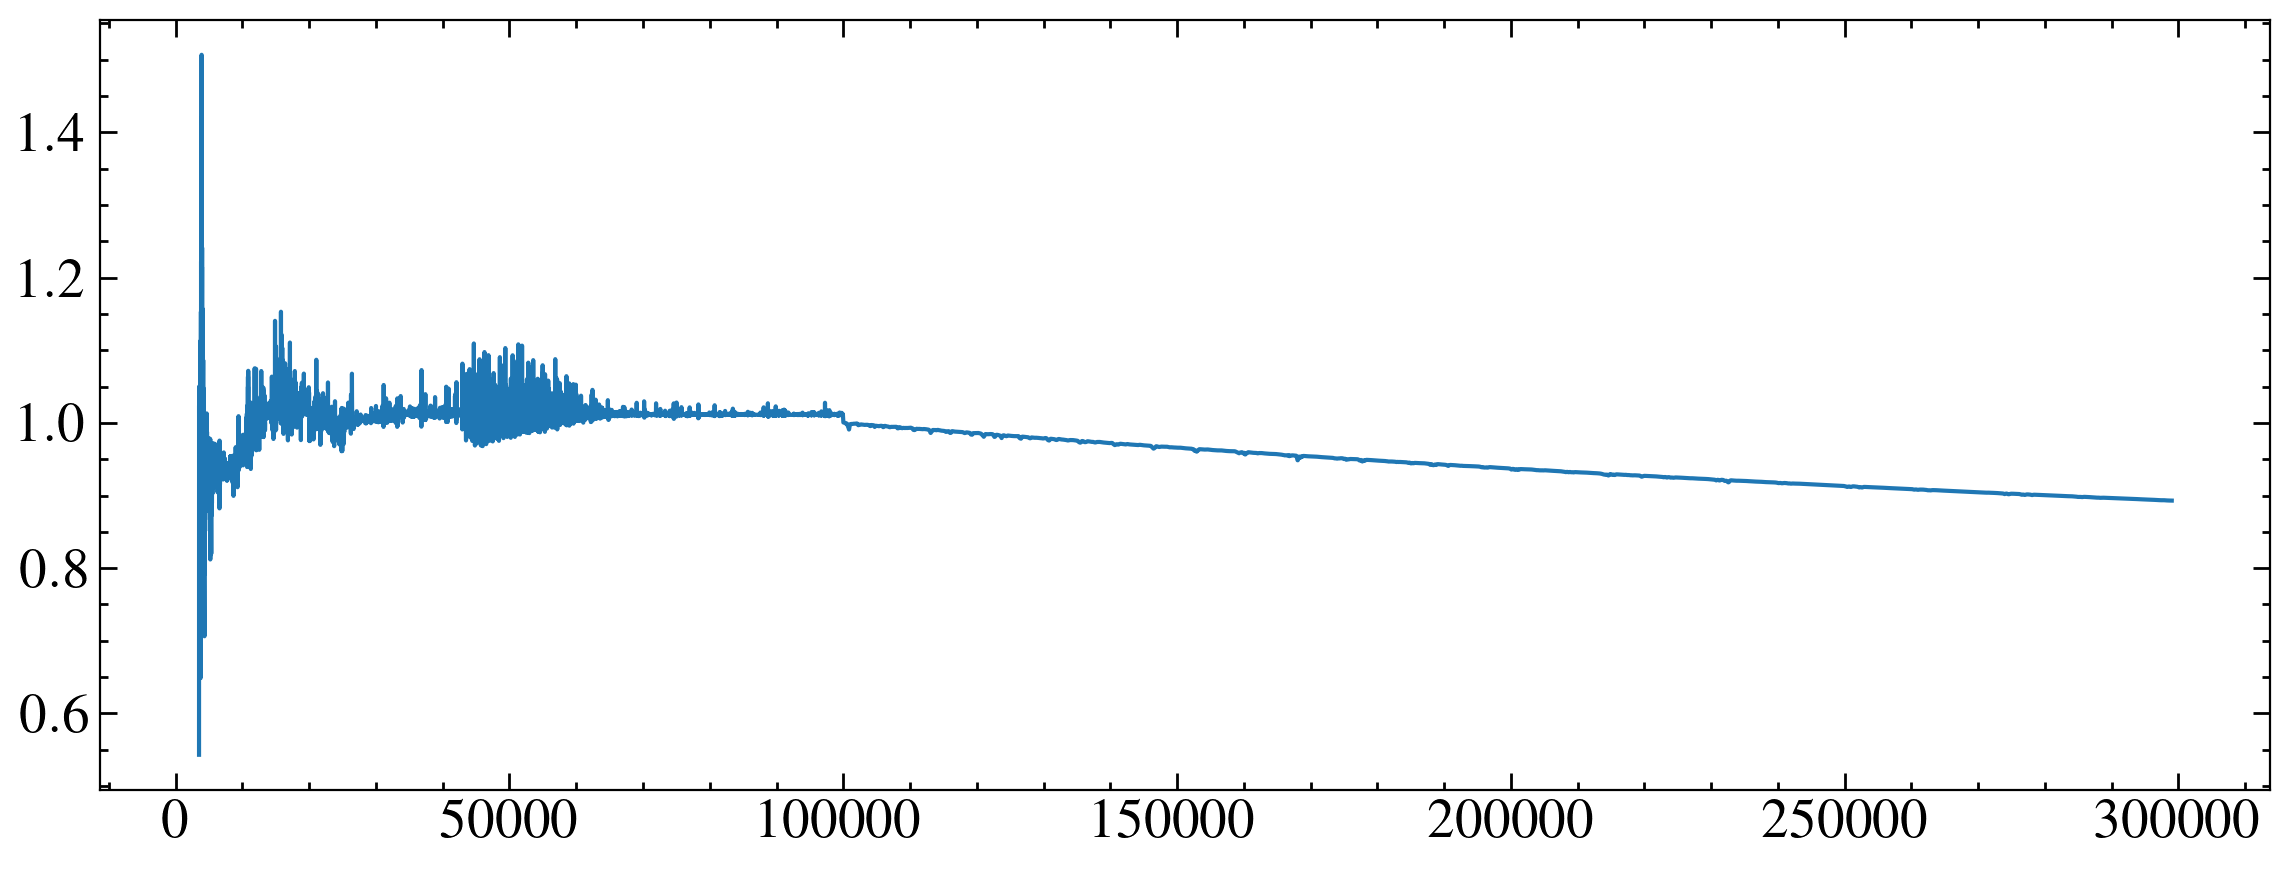

In [51]:
pmask = (pw > 3500) & (pw < 3e5)
pwi, pfi = pw[pmask], pf[pmask]*normfac.value
pwi, pfi = smear(pwi, pfi, 2000)
pwi, pfi = pwi[:-500], pfi[:-500] 

plt.plot(pwi, pfi)

amdat = Table.read('/media/david/2tb_ext_hd/hddata/meats/misc_data/hd120411/HD120411spec_G2V_0.04.ascii', format='ascii.basic')
aw, af, ae = amdat['Wavelength(nm)']*10, amdat['Flux(erg/cm^2/s/nm)']/10, amdat['Err']/10
plt.plot(aw[aw> 2000], af[aw> 2000])
plt.yscale('log')
plt.xscale('log')

# plt.xlim(4500, 8000)
# plt.ylim(0, 6e-13)
afi = interp1d(aw, af, fill_value='extrapolate')(pwi)

plt.show()

plt.plot(pwi, pfi/afi)

print(np.mean(pfi/afi), np.median(pfi/afi))

print(np.trapz(pfi, pwi)/np.trapz(afi, pwi))

Final check on the velocity offset with the Mg ii lines:

In [53]:
g230ls = []
for x in x1ds:
    hdr = fits.getheader(x)
    if hdr['OPT_ELEM'] == 'G230L':
        g230ls.append(x)
        
g230ls

['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28030_x1d.fits']

In [54]:
fig, ax = plt.subplots(figsize=(7, 5))

x = g230ls[0]
# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(2765, 2835)
ax.set_ylim(0.3e-13, 0.99e-13)

lines=[2796.35, 2803.53]
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]
ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



mg2 = [2796.352, 2803.53]
os = [6.08e-01, 3.03e-01]

lines = np.copy(mg2)

mask = (w > 2775) & (w < 2820)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (-15*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=6e-14, mean = line_guess, stddev=0.5)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
mod.amplitude_2.tied = tiedamp


mgfit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, mgfit(wmod))

print(mgfit)
mgfit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(mgfit_e)

obs_lam = mgfit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()



Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=0., c1=-0., c2=0.)>

    [1]: <Gaussian1D(amplitude=0., mean=2797.67493727, stddev=0.96725508)>

    [2]: <Gaussian1D(amplitude=0., mean=2804.85293727, stddev=0.96725508)>
Parameters:
             c0_0                  c1_0          ...      stddev_2     
    --------------------- ---------------------- ... ------------------
    7.374397042942038e-10 -5.270841470243046e-13 ... 0.9672550818877631
[4.36981048e-11 3.12340839e-14 5.58116455e-18 4.04308381e-15
 1.81523440e-01 1.66377507e-01]
141.83000453552623 km / s 19.460839790890866


Weird - Mg ii lines are in agreement with the G140L data...what about Ca H&K in the G430L spectrum?

In [55]:
g430ls = []
for x in x1ds:
    hdr = fits.getheader(x)
    if hdr['OPT_ELEM'] == 'G430L':
        g430ls.append(x)
        
g430ls

['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/check/oeoo28040_sx1.fits']

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=-0., c1=0., c2=-0.)>

    [1]: <Gaussian1D(amplitude=-0., mean=3938.42133285, stddev=7.41383086)>

    [2]: <Gaussian1D(amplitude=-0., mean=3973.24133285, stddev=7.41383086)>
Parameters:
             c0_0                   c1_0         ...      stddev_2    
    ---------------------- --------------------- ... -----------------
    -6.943338002302458e-11 3.446084883107263e-14 ... 7.413830857309629
[1.28953509e-11 6.45294410e-15 8.07119069e-19 1.06314969e-14
 3.11841568e-01 3.34931843e-01 1.04587044e-14]
278.1972136586018 km / s 25.518655625603415


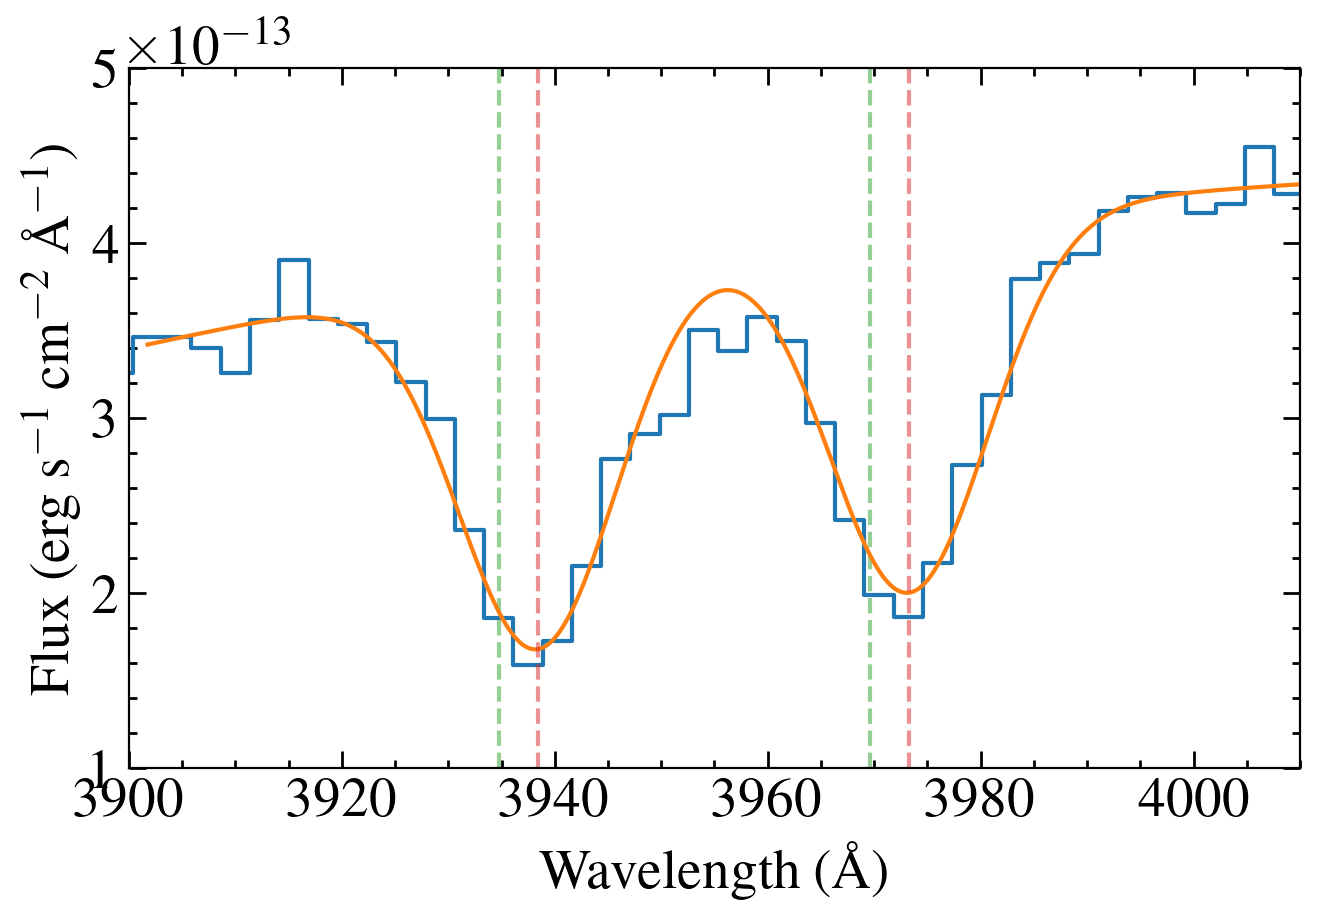

In [56]:
fig, ax = plt.subplots(figsize=(7, 5))

x = g430ls[0]
# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(3900, 4010)
ax.set_ylim(1e-13, 5e-13)

ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



# mg2 = [2796.352, 2803.53]
cahk = [3934.77, 3969.59]
# os = [6.08e-01, 3.03e-01]

lines = np.copy(cahk)
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]

mask = (w > 3900) & (w < 4100)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (-15*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=-1e-13, mean = line_guess, stddev=1.0)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
# mod.amplitude_2.tied = tiedamp


cafit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, cafit(wmod))

print(cafit)
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

obs_lam = cafit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()



Building the SED. Uh oh it's using Chandra. Need a new apec model

In [61]:
from xspec import *

In [88]:
xpath = '/media/david/2tb_ext_hd/hddata/meats/chandra/hd120411/HD120411_1Tsubsolar_spectrum.dat'
w, bins, counts, counts_e, mcounts  = np.loadtxt(xpath, unpack=True, skiprows=4)
w0, w1 = w - bins, w+bins
f = [fi*1.99e-8/wi for fi, wi in zip(counts,w)]
m = [fi*1.99e-8/wi for fi, wi in zip(mcounts,w)] 
e = (counts_e/counts)*f

plt.errorbar(w, f, yerr =e, xerr=bins, ls='none')
plt.step(w, m, where='mid')
# plt.errorbar(w, counts, yerr =counts_e, xerr=bins, ls='none')



Model apec<1>*phabs<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   apec       kT         keV      1.00000      +/-  0.0          
   2    1   apec       Abundanc            1.00000      frozen
   3    1   apec       Redshift            0.0          frozen
   4    1   apec       norm                1.00000      +/-  0.0          
   5    2   phabs      nH         10^22    1.00000      +/-  0.0          
________________________________________________________________________


Model apec<1>*phabs<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   apec       kT         keV      1.13000      +/-  0.0          
   2    1   apec       Abundanc            0.400000     frozen
   3    1   apec       Redshift            0.0          frozen
   4    1   apec       norm                1.00000      +/-  0.0          
   5    2   phabs      nH         10^22    1.00000E-03  +/-  0.0          
__

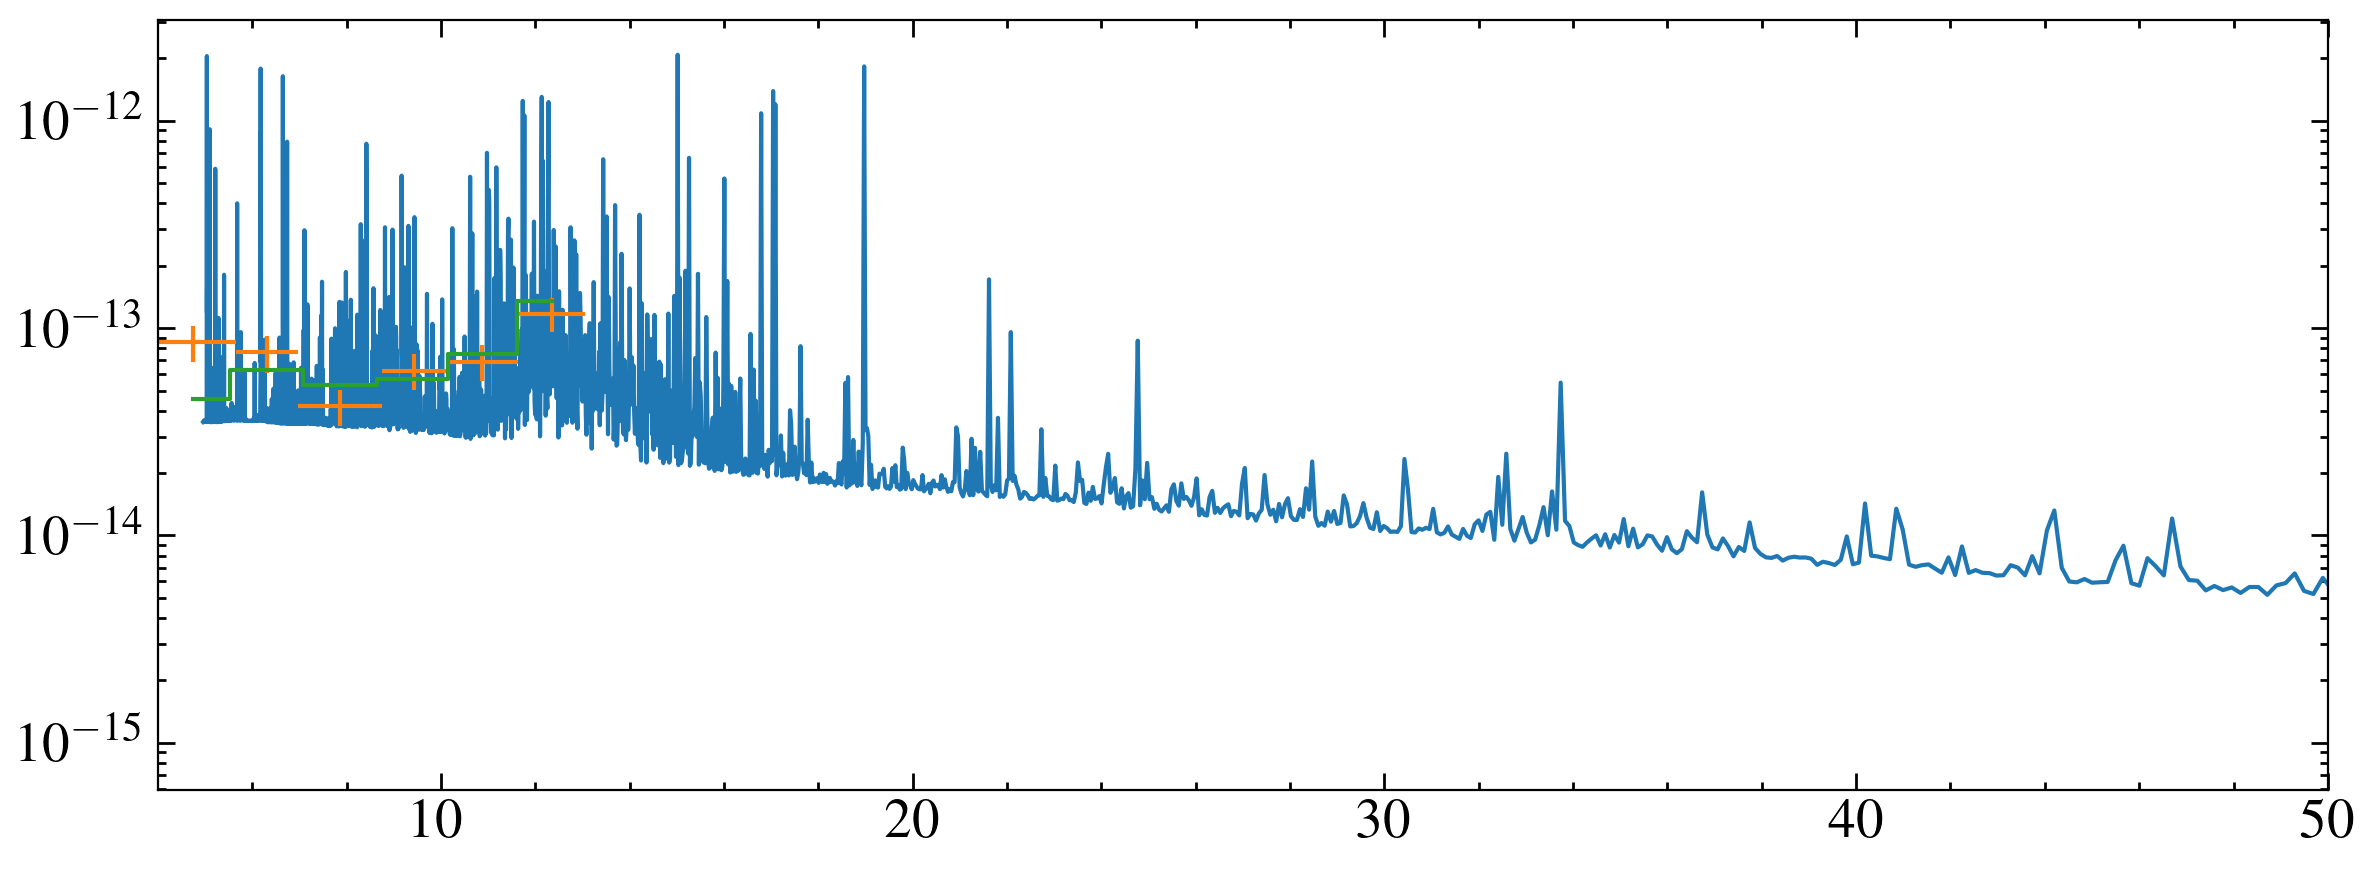

In [104]:
mod = Model('(apec)*phabs', setPars={1:1.13, 2:0.4,5:0.001})
Plot.xAxis = "angstrom"
Plot.perHz = False
Plot.area=True
AllModels.setEnergies(".3 10. 1000")
flux = AllModels.calcFlux(".3 10")
fluxnum = mod.flux[0]
norm = (122e-14)/fluxnum
mod.setPars({4:norm})
xVals = Plot.x()
yVals = Plot.model()
wx = xVals*u.AA
fx  = (yVals * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))

plt.plot(wx, fx)
plt.xlim(4, 50)

plt.errorbar(w, f, yerr =e, xerr=bins, ls='none')
plt.step(w, m, where='mid')
plt.yscale('log')
plt.show()


savdat = Table([wx, fx], names=['WAVELENGTH','FLUX'])
# savdat.write('/media/david/2tb_ext_hd/hddata/meats/chandra/hd120411/HD120411_1Tsubsolar_model.dat', format='ascii.basic', overwrite=True)
savdat.write('models/hd120411_apec.txt', format='ascii.basic', overwrite=True)

In [102]:
import prepare_chandra
importlib.reload(prepare_xmm)

savepath = 'draft_hlsp/hd120411/'
hlsp = Table.read('meats_hlsp_info.csv')
version = 1

chandra_path = '/media/david/2tb_ext_hd/hddata/meats/chandra/hd120411/'
evt_path = '/media/david/2tb_ext_hd/hddata/meats/chandra/hd120411/24675/primary/acisf24675N001_evt2.fits'

prepare_chandra.make_chandra_spectra(chandra_path, evt_path, savepath, version, hlsp, apec_repo='models/', make_apec=False, save_ecsv=False, save_fits=True)



Spectrum saved as hlsp_muscles_cxo_acis_hip67522_none_v1_component-spec.fits


In [114]:
import prepare_model
hlsp_x1ds = glob.glob('{}*stis*.fits'.format(savepath))
hdr = fits.getheader(hlsp_x1ds[0])
sed_data = Table(meta=hdr)
print(hlsp_x1ds)

['draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g430l_v2_component-spec.fits', 'draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g140l_v2_component-spec.fits', 'draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g230l_v1_component-spec.fits', 'draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g140l_v1_component-spec.fits', 'draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g430l_v1_component-spec.fits', 'draft_hlsp/hd120411/hlsp_muscles_hst_stis_hd-120411_g230l_v2_component-spec.fits']


In [115]:
# xray = Table.read('models/HD120411_apec_errs.ecsv')
# plt.plot(xray['WAVELENGTH'], xray['FLUX'])
# plt.plot(xray['WAVELENGTH'], xray['ERROR'])
# plt.yscale('log')


prepare_model.make_model_spectrum('models/HD120411_apec_errs.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False,
                                  save_fits=True, normfac=1.0, model_name='apec')


Spectrum saved as hlsp_muscles_model_apec_hd-120411_na_v1_component-spec.fits


In [117]:
#dem
dempath = '/media/david/2tb_ext_hd/hddata/meats/dems/hd_120411/spectrum_hd_120411_p17.fits'
dem = fits.getdata(dempath, 1)

dw, df= dem['Wavelength'], dem['Flux_density']
eu, el = dem['Upper_Error_84'], dem['Lower_Error_16']


mean_e = np.mean([eu, el], axis=0)
# plt.plot(dw, mean_e)
# plt.yscale('log')

log_mean_e = (eu - el) / (np.log(eu)- np.log(el))

plt.plot(dw, df)
plt.plot(dw, log_mean_e)
# plt.plot(dw, mean_e)

plt.yscale('log')

demtab = Table([dw, df, log_mean_e], names=['WAVELENGTH', 'FLUX', 'ERROR'])
demtab.write('models/hd_120411_dem.ecsv', overwrite=True)
# prepare_model.make_model_spectrum('models/hd_120411_dem.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, 
#                                   save_fits=True, normfac=1, model_name='dem')


Spectrum saved as hlsp_muscles_model_dem_hd-120411_na_v1_component-spec.fits


Spectrum saved as hlsp_muscles_model_lya_hd-120411_na_v1_component-spec.fits


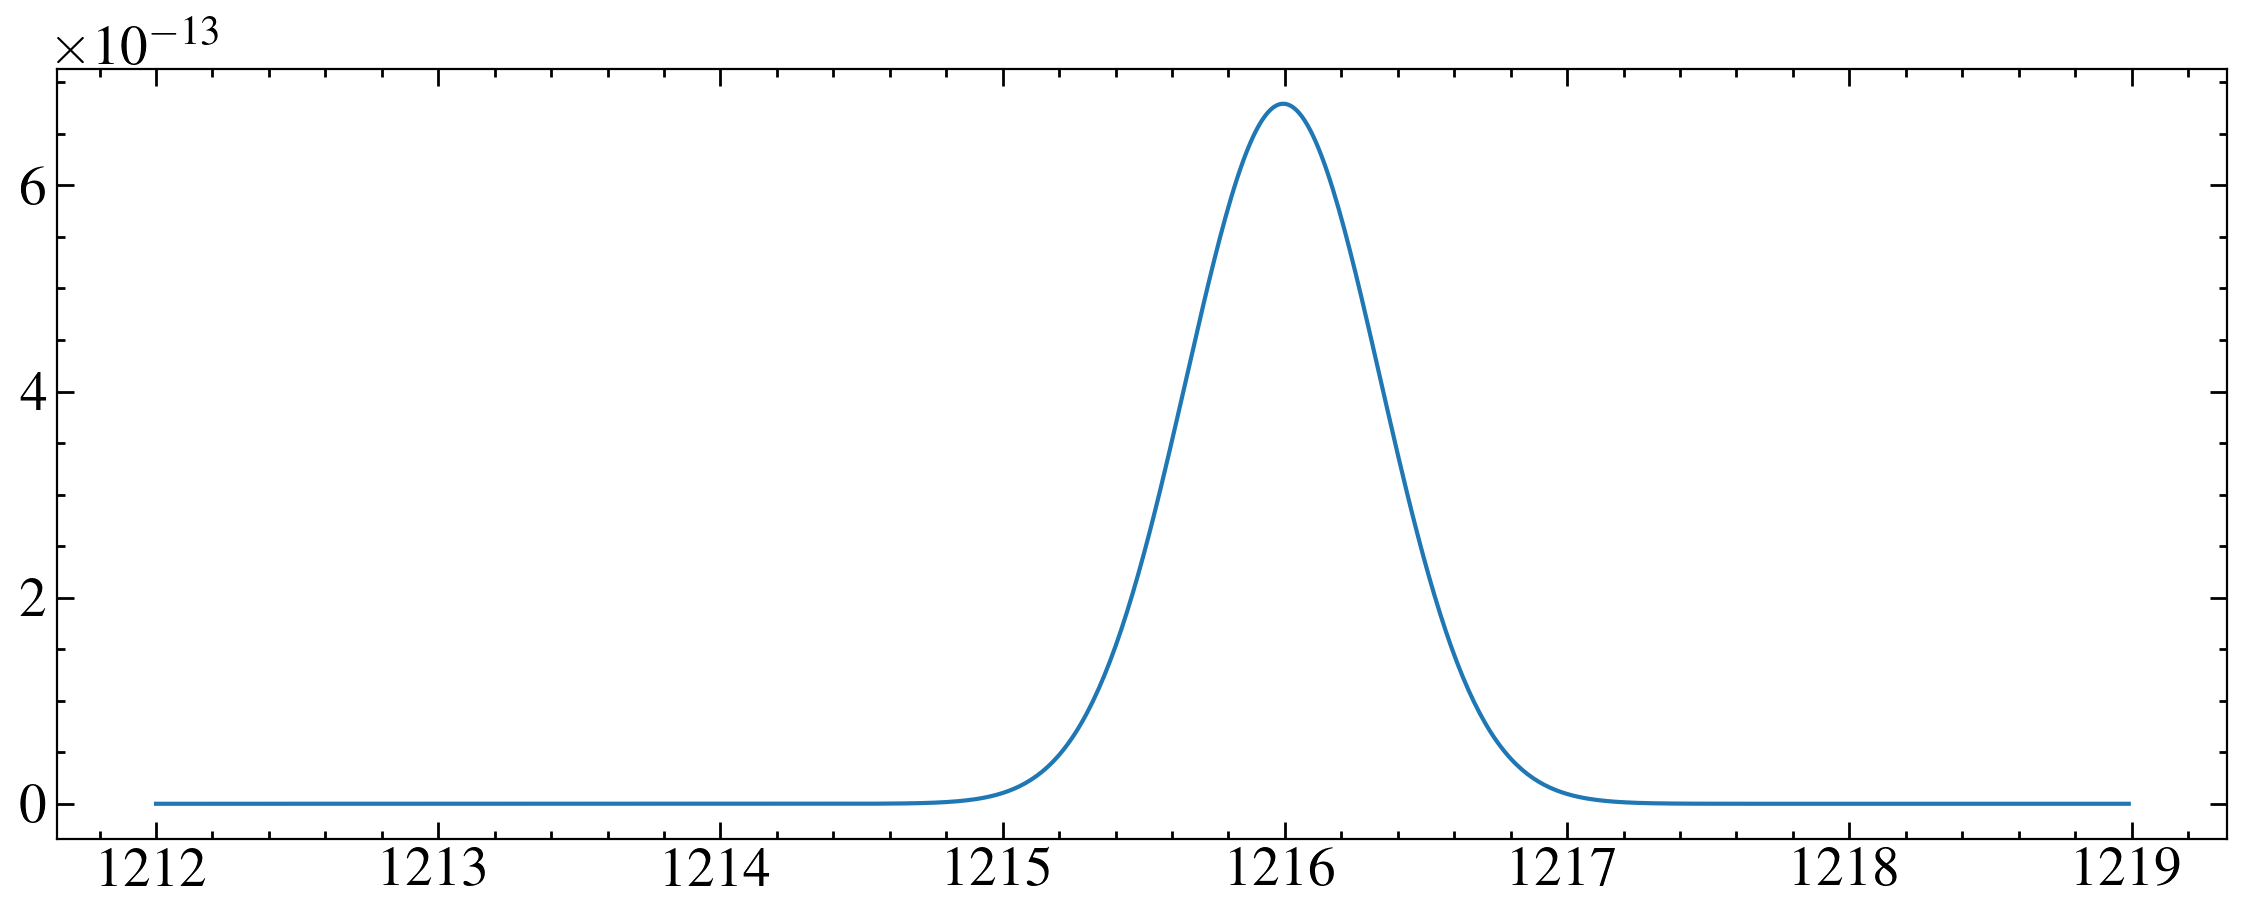

In [120]:
#lya
lyapath = '/media/david/2tb_ext_hd/hddata/meats/lya/HD120411/HIP67522_LyA_estimate.txt'
lw, lf = np.loadtxt(lyapath, unpack=True, skiprows=1)
plt.plot(lw, lf)
prepare_model.make_model_spectrum(lyapath, 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='LYA')


In [121]:
#phx
prepare_model.make_model_spectrum('models/hd120411_phoenix_interpolated.ecsv', 1, sed_data ,
                                  savepath = savepath, save_ecsv=False, save_fits=True, normfac=normfac.value, model_name='PHX')

Spectrum saved as hlsp_muscles_model_phx_hd-120411_na_v1_component-spec.fits
